In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
folder = '/home/ysheng/Dataset/soft_shadow/real_human_testing_set/'
files =  [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

for f in files:
    img = np.array(Image.open(os.path.join(folder, f)))
    plt.figure()
    plt.imshow(img[:,:,3])
    print(np.max(img[:,:,3]))
    plt.show()
    break

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import argparse
import time
from tqdm import tqdm
import numpy as np
import os
import math

In [4]:
from ssn.ssn_dataset import SSN_Dataset
# from ssn.ssn_submodule import Contract
from ssn.ssn import Relight_SSN
from utils.net_utils import save_model

# device = torch.device('cpu')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda:0


In [9]:
# data set
ds_csv = "~/Dataset/soft_shadow/train/metadata.csv"
train_set = SSN_Dataset(ds_csv, True)
train_dataloder = DataLoader(train_set, batch_size=1, shuffle=True, num_workers=4)
valid_set = SSN_Dataset(ds_csv, False)
valid_dataloader = DataLoader(valid_set, batch_size=1, shuffle=False, num_workers=4)

Dataset initialize spent: 3.2559797763824463 ms
Dataset initialize spent: 3.0792148113250732 ms


In [10]:
from torchvision.utils import make_grid
    
model = Relight_SSN(1,1)
weight_file = os.path.join('weights', 'l1 loss_21-February-09-23-AM.pt')
checkpoint = torch.load(weight_file, map_location=device)    
model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.9986307621002197
batch size: 1, total loss: 54.53474426269531, batch loss: 54.53474426269531
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.998361587524414
batch size: 1, total loss: 64.75371551513672, batch loss: 64.75371551513672
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.1073963642120361
batch size: 1, total loss: 14.057044982910156, batch loss: 14.057044982910156
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.103461503982544
batch size: 1, total loss: 18.35916519165039, batch loss: 18.35916519165039
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.0802536010742188
batch size: 1, total loss: 27.13490867614746, batch loss: 27.13490867614746
Image target: range: 1.0, 2.0
range of prediction, min: 0.0, max 2.9688193798065186
batch size: 1, total loss: 55.70789337158203, batch loss: 55.70789337158203
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.14397132396698
batch size: 1, total loss: 13.753016471862793, batch loss: 13.753016471862793
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.0008862018585205
batch size: 1, total loss: 46.716468811035156, batch loss: 46.716468811035156
Image target: range: 0.0, 3.0


/home/ysheng/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.9948835372924805
batch size: 1, total loss: 55.8707160949707, batch loss: 55.8707160949707
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.111642599105835
batch size: 1, total loss: 22.102197647094727, batch loss: 22.102197647094727
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.036423683166504
batch size: 1, total loss: 35.56941604614258, batch loss: 35.56941604614258
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.1452970504760742
batch size: 1, total loss: 17.38007926940918, batch loss: 17.38007926940918
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.0675206184387207
batch size: 1, total loss: 14.774972915649414, batch loss: 14.774972915649414
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.0430541038513184
batch size: 1, total loss: 23.585718154907227, batch loss: 23.585718154907227
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 2.039170026779175
batch size: 1, total loss: 33.16741943359375, batch loss: 33.16741943359375
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 3.0589687824249268
batch size: 1, total loss: 44.01487731933594, batch loss: 44.01487731933594
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.031362533569336
batch size: 1, total loss: 20.89653968811035, batch loss: 20.89653968811035
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 2.9846277236938477
batch size: 1, total loss: 75.08653259277344, batch loss: 75.08653259277344
Image target: range: 1.0, 3.0
range of prediction, min: 0.0, max 3.001746892929077
batch size: 1, total loss: 53.259239196777344, batch loss: 53.259239196777344


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.045360803604126
batch size: 1, total loss: 30.24837303161621, batch loss: 30.24837303161621
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 2.034930944442749
batch size: 1, total loss: 34.64906692504883, batch loss: 34.64906692504883
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.0887125730514526
batch size: 1, total loss: 16.914405822753906, batch loss: 16.914405822753906
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.0254342555999756
batch size: 1, total loss: 27.644229888916016, batch loss: 27.644229888916016
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.0953072309494019
batch size: 1, total loss: 22.45058822631836, batch loss: 22.45058822631836
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.084094524383545
batch size: 1, total loss: 22.81995964050293, batch loss: 22.81995964050293
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.1503511667251587
batch size: 1, total loss: 15.7424955368042, batch loss: 15.7424955368042
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.9746499061584473
batch size: 1, total loss: 58.37119674682617, batch loss: 58.37119674682617
Image target: range: 0.0, 3.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.058684229850769
batch size: 1, total loss: 15.54195785522461, batch loss: 15.54195785522461
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.236000895500183
batch size: 1, total loss: 22.652084350585938, batch loss: 22.652084350585938
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.005113124847412
batch size: 1, total loss: 50.97514343261719, batch loss: 50.97514343261719
Image target: range: 0.0, 3.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.1304501295089722
batch size: 1, total loss: 19.84365463256836, batch loss: 19.84365463256836
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.992551803588867
batch size: 1, total loss: 59.725555419921875, batch loss: 59.725555419921875
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.016801118850708
batch size: 1, total loss: 26.16543960571289, batch loss: 26.16543960571289
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 2.0132076740264893
batch size: 1, total loss: 25.865570068359375, batch loss: 25.865570068359375
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.0091030597686768
batch size: 1, total loss: 23.24462127685547, batch loss: 23.24462127685547
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 3.012467861175537
batch size: 1, total loss: 76.26428985595703, batch loss: 76.26428985595703
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.1020002365112305
batch size: 1, total loss: 14.796838760375977, batch loss: 14.796838760375977
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.0222434997558594
batch size: 1, total loss: 33.596099853515625, batch loss: 33.596099853515625
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.0187129974365234
batch size: 1, total loss: 33.82966613769531, batch loss: 33.82966613769531
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 2.0070648193359375
batch size: 1, total loss: 25.126583099365234, batch loss: 25.126583099365234
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.1106235980987549
batch size: 1, total loss: 22.98069953918457, batch loss: 22.98069953918457
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.0035557746887207
batch size: 1, total loss: 57.73255157470703, batch loss: 57.73255157470703
Image target: range: 0.0, 3.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.1903830766677856
batch size: 1, total loss: 16.877607345581055, batch loss: 16.877607345581055
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.051839828491211
batch size: 1, total loss: 13.605778694152832, batch loss: 13.605778694152832
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.072690725326538
batch size: 1, total loss: 71.91046142578125, batch loss: 71.91046142578125
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.058502197265625
batch size: 1, total loss: 51.317535400390625, batch loss: 51.317535400390625
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 2.9763264656066895
batch size: 1, total loss: 54.80757522583008, batch loss: 54.80757522583008
Image target: range: 0.0, 3.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.026536464691162
batch size: 1, total loss: 26.96968650817871, batch loss: 26.96968650817871
Image target: range: 1.0, 2.0
range of prediction, min: 0.0, max 3.004525899887085
batch size: 1, total loss: 55.69321823120117, batch loss: 55.69321823120117
Image target: range: 1.0, 3.0
range of prediction, min: 0.0, max 2.010857343673706
batch size: 1, total loss: 25.927457809448242, batch loss: 25.927457809448242
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.0900310277938843
batch size: 1, total loss: 36.0510368347168, batch loss: 36.0510368347168
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.0071840286254883
batch size: 1, total loss: 30.563161849975586, batch loss: 30.563161849975586
Image target: range: 1.0, 2.0
range of prediction, min: 0.0, max 2.032304286956787
batch size: 1, total loss: 35.232452392578125, batch loss: 35.232452392578125
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.1586735248565674
batch size: 1, total loss: 20.01407241821289, batch loss: 20.01407241821289
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.9878313541412354
batch size: 1, total loss: 77.99263000488281, batch loss: 77.99263000488281
Image target: range: 0.0, 3.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 3.0271236896514893
batch size: 1, total loss: 55.48575973510742, batch loss: 55.48575973510742
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.9812484979629517
batch size: 1, total loss: 30.17314910888672, batch loss: 30.17314910888672
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.1741647720336914
batch size: 1, total loss: 13.375711441040039, batch loss: 13.375711441040039
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.003255605697632
batch size: 1, total loss: 36.63226318359375, batch loss: 36.63226318359375
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.113341212272644
batch size: 1, total loss: 18.63886833190918, batch loss: 18.63886833190918
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.2226815223693848
batch size: 1, total loss: 41.54526138305664, batch loss: 41.54526138305664
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.037304639816284
batch size: 1, total loss: 41.80360794067383, batch loss: 41.80360794067383
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.1282553672790527
batch size: 1, total loss: 17.635229110717773, batch loss: 17.635229110717773
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.9942445755004883
batch size: 1, total loss: 63.861148834228516, batch loss: 63.861148834228516
Image target: range: 1.0, 3.0
range of prediction, min: 0.0, max 1.1225216388702393
batch size: 1, total loss: 18.315359115600586, batch loss: 18.315359115600586
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.113477945327759
batch size: 1, total loss: 27.42078399658203, batch loss: 27.42078399658203
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 2.024630546569824
batch size: 1, total loss: 28.09147834777832, batch loss: 28.09147834777832
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.1347849369049072
batch size: 1, total loss: 15.976810455322266, batch loss: 15.976810455322266
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.0196640491485596
batch size: 1, total loss: 50.599674224853516, batch loss: 50.599674224853516
Image target: range: 0.0, 3.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.9741320610046387
batch size: 1, total loss: 62.081787109375, batch loss: 62.081787109375
Image target: range: 1.0, 3.0
range of prediction, min: 0.0, max 2.991255521774292
batch size: 1, total loss: 66.88011169433594, batch loss: 66.88011169433594
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.1785773038864136
batch size: 1, total loss: 16.507333755493164, batch loss: 16.507333755493164
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.0030555725097656
batch size: 1, total loss: 31.420942306518555, batch loss: 31.420942306518555
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 2.975665330886841
batch size: 1, total loss: 65.01121520996094, batch loss: 65.01121520996094
Image target: range: 1.0, 3.0
range of prediction, min: 0.0, max 2.0402934551239014
batch size: 1, total loss: 37.50615692138672, batch loss: 37.50615692138672
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.2040624618530273
batch size: 1, total loss: 14.009933471679688, batch loss: 14.009933471679688
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.1078691482543945
batch size: 1, total loss: 13.600855827331543, batch loss: 13.600855827331543
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.072359561920166
batch size: 1, total loss: 56.58119201660156, batch loss: 56.58119201660156
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.0299530029296875
batch size: 1, total loss: 23.21048355102539, batch loss: 23.21048355102539
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.062179446220398
batch size: 1, total loss: 22.21950912475586, batch loss: 22.21950912475586
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.154606580734253
batch size: 1, total loss: 22.432056427001953, batch loss: 22.432056427001953
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.1070443391799927
batch size: 1, total loss: 13.909046173095703, batch loss: 13.909046173095703
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.1423794031143188
batch size: 1, total loss: 20.689817428588867, batch loss: 20.689817428588867
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.0085837841033936
batch size: 1, total loss: 64.97769927978516, batch loss: 64.97769927978516
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.1163151264190674
batch size: 1, total loss: 35.371978759765625, batch loss: 35.371978759765625
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.1512140035629272
batch size: 1, total loss: 19.80075454711914, batch loss: 19.80075454711914
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.1155312061309814
batch size: 1, total loss: 24.72610092163086, batch loss: 24.72610092163086
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 3.0080864429473877
batch size: 1, total loss: 44.49052047729492, batch loss: 44.49052047729492
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.1415212154388428
batch size: 1, total loss: 21.915733337402344, batch loss: 21.915733337402344
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.0737031698226929
batch size: 1, total loss: 22.945032119750977, batch loss: 22.945032119750977
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 1.1402301788330078
batch size: 1, total loss: 16.334331512451172, batch loss: 16.334331512451172
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.027883291244507
batch size: 1, total loss: 27.084232330322266, batch loss: 27.084232330322266
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.0750733613967896
batch size: 1, total loss: 16.051403045654297, batch loss: 16.051403045654297
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.0849031209945679
batch size: 1, total loss: 12.937047004699707, batch loss: 12.937047004699707
Image target: range: 0.0, 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 3.019059181213379
batch size: 1, total loss: 63.9669075012207, batch loss: 63.9669075012207
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 1.1137545108795166
batch size: 1, total loss: 19.099498748779297, batch loss: 19.099498748779297
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 1.1437262296676636
batch size: 1, total loss: 14.843067169189453, batch loss: 14.843067169189453
Image target: range: 0.0, 1.0
range of prediction, min: 0.0, max 2.0288853645324707
batch size: 1, total loss: 27.25218391418457, batch loss: 27.25218391418457
Image target: range: 0.0, 2.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


range of prediction, min: 0.0, max 3.002758502960205
batch size: 1, total loss: 57.13602066040039, batch loss: 57.13602066040039
Image target: range: 0.0, 3.0
range of prediction, min: 0.0, max 2.0290720462799072
batch size: 1, total loss: 44.64012145996094, batch loss: 44.64012145996094
Image target: range: 0.0, 2.0
range of prediction, min: 0.0, max 1.187192678451538
batch size: 1, total loss: 28.709030151367188, batch loss: 28.709030151367188
Image target: range: 0.0, 1.0


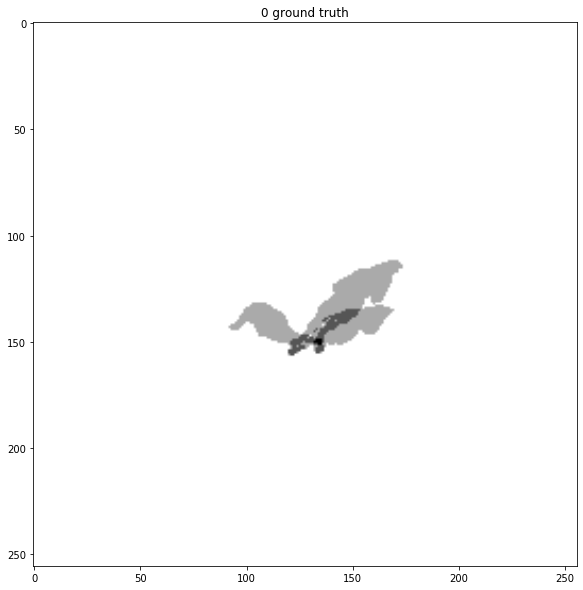

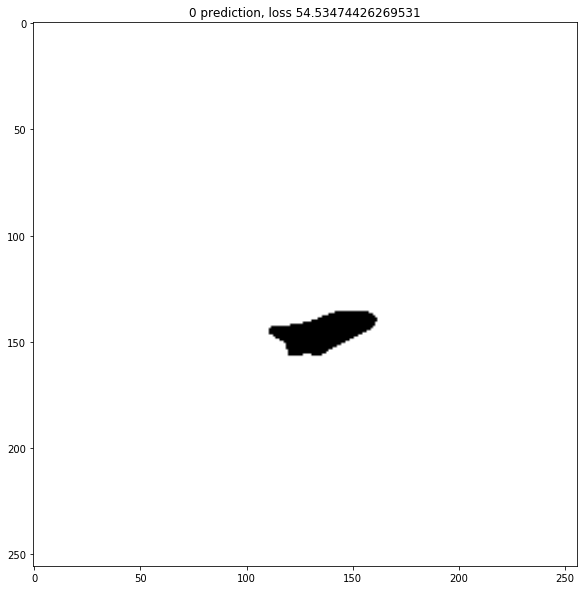

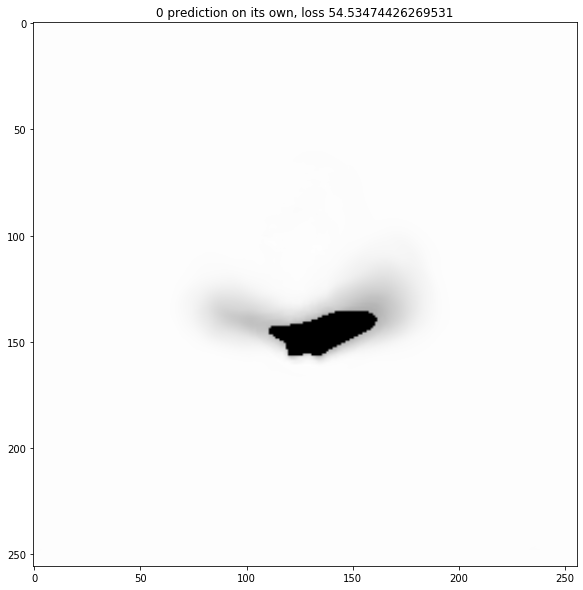

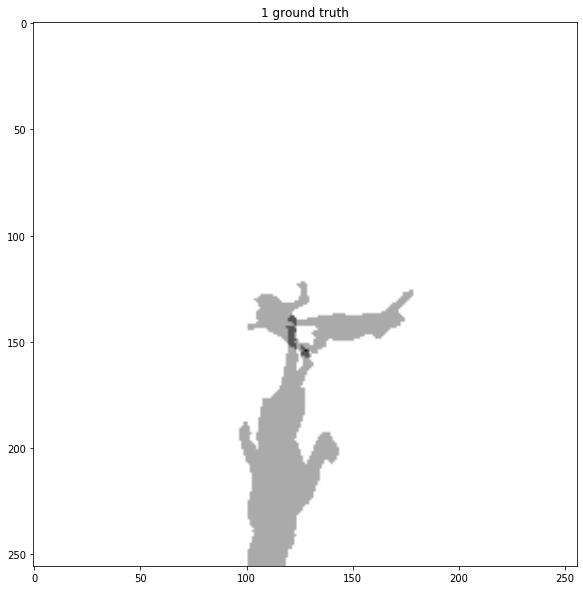

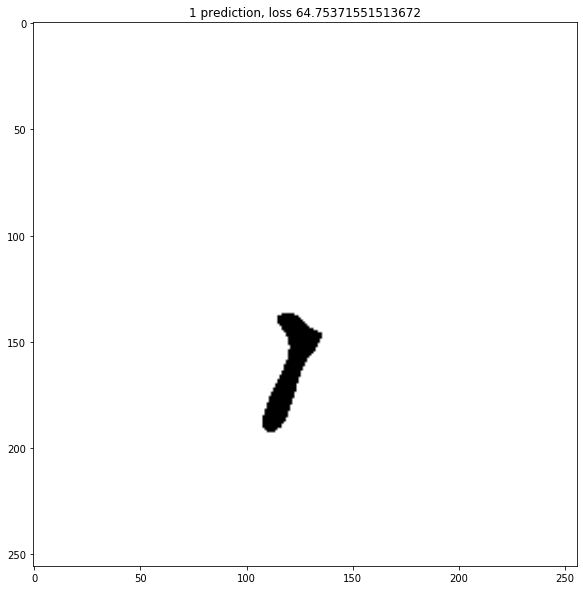

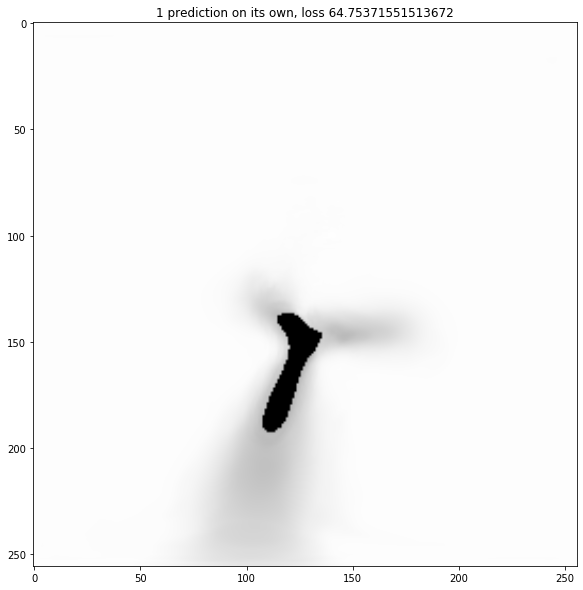

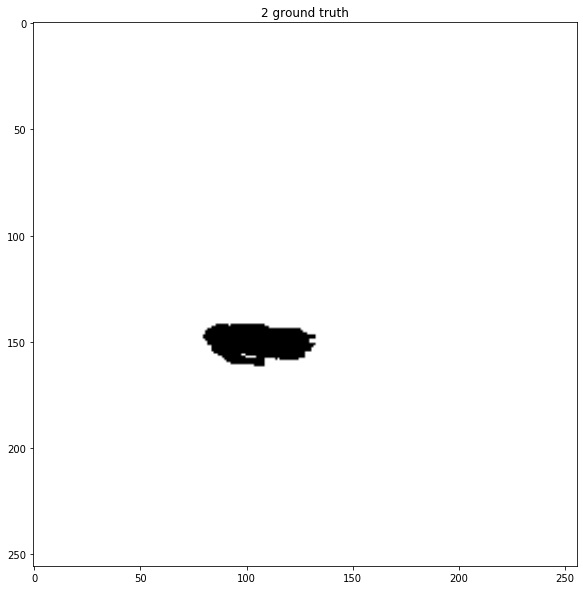

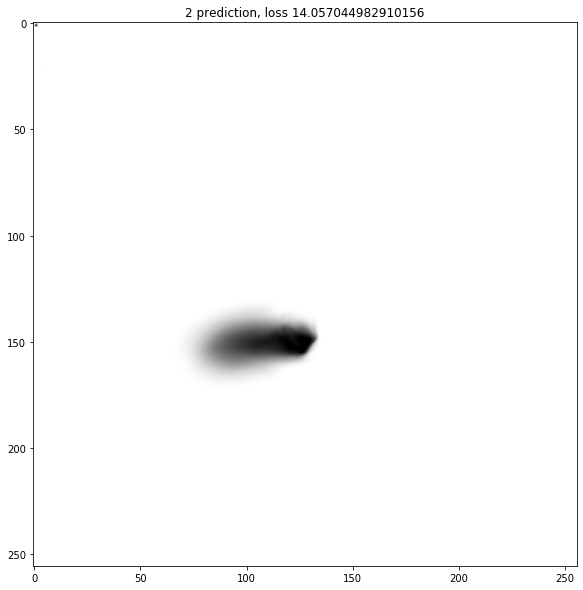

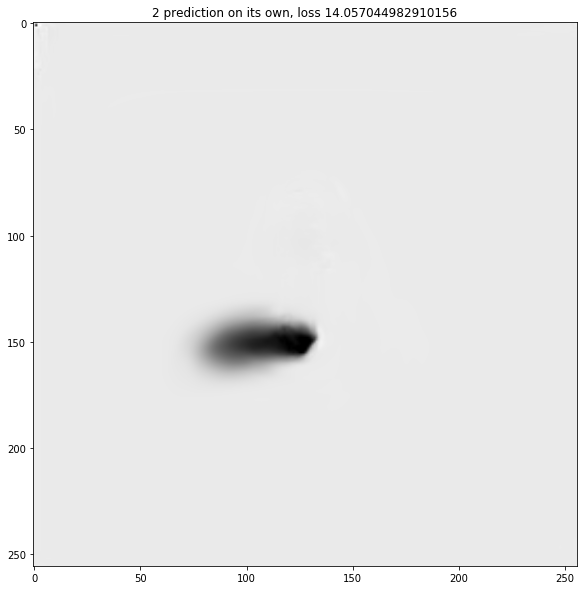

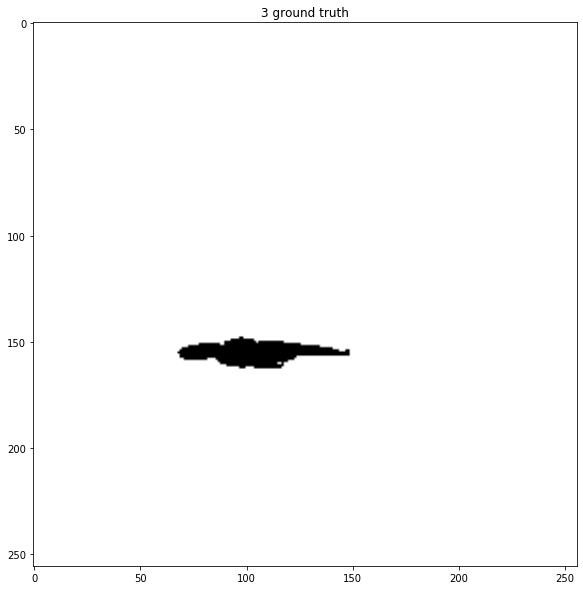

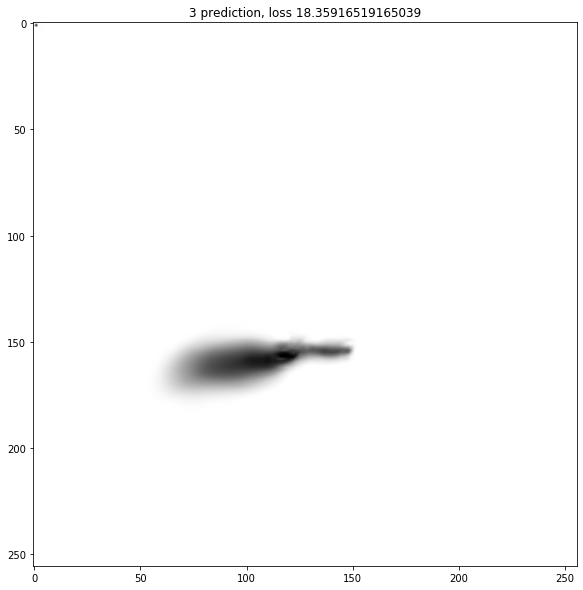

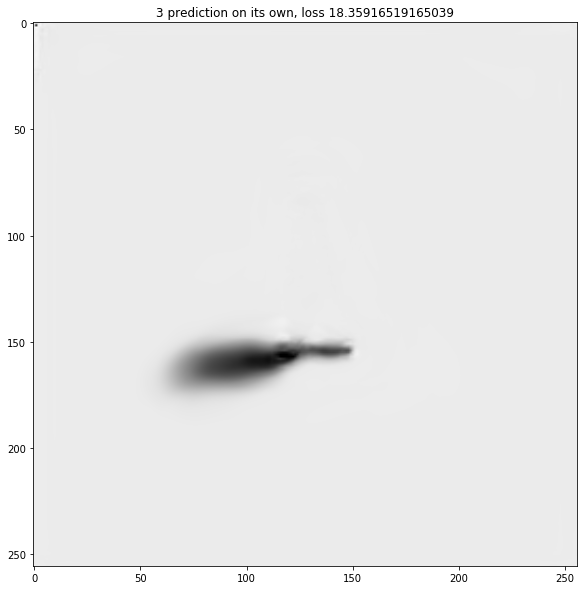

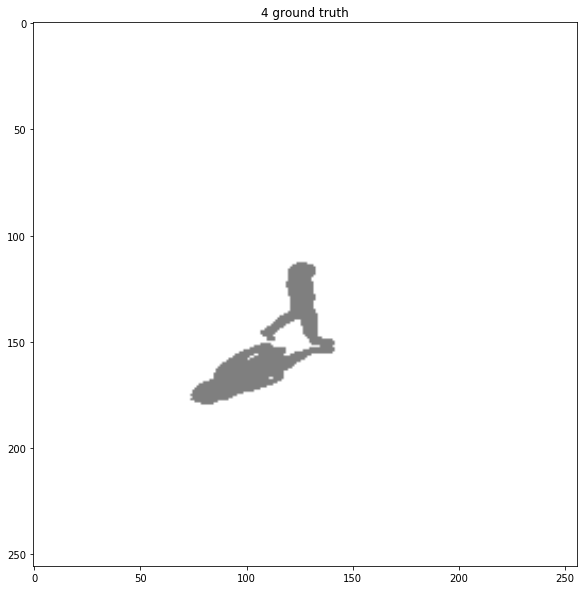

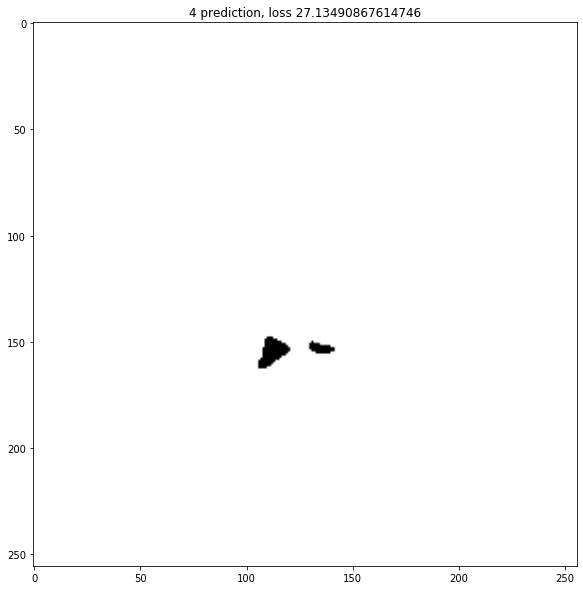

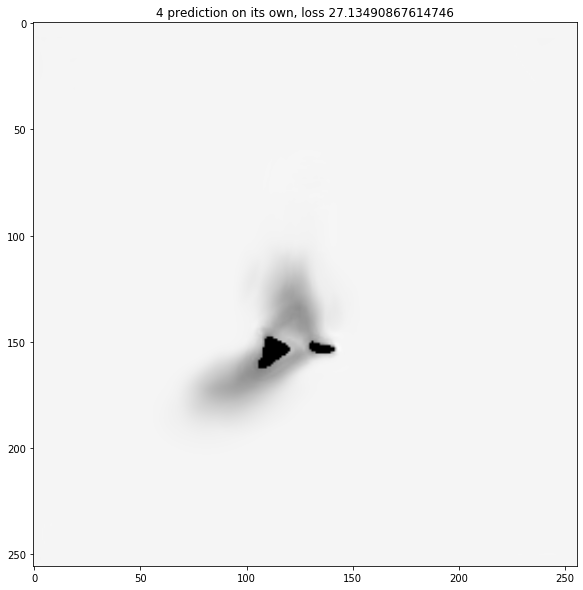

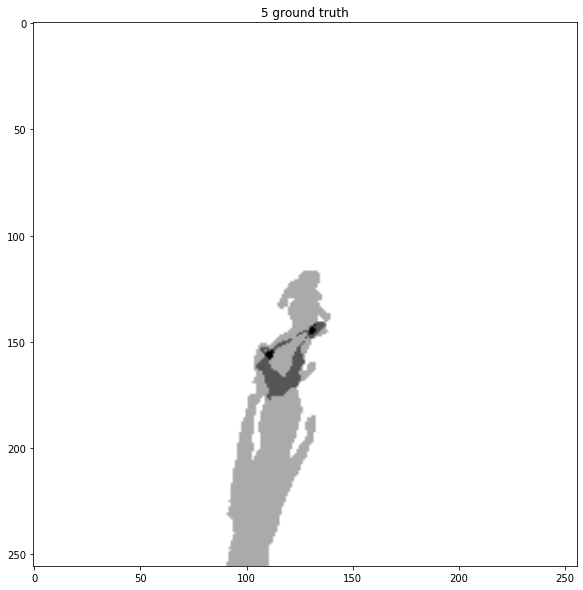

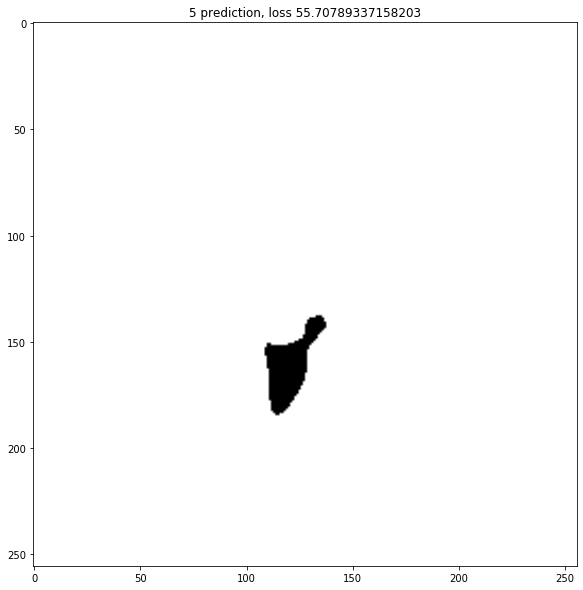

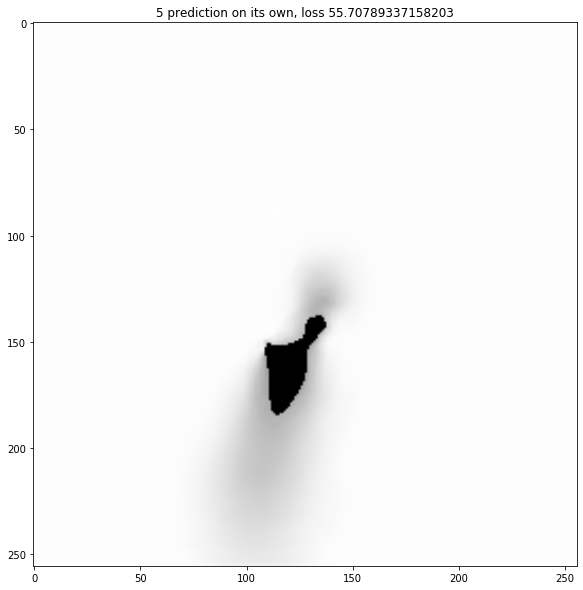

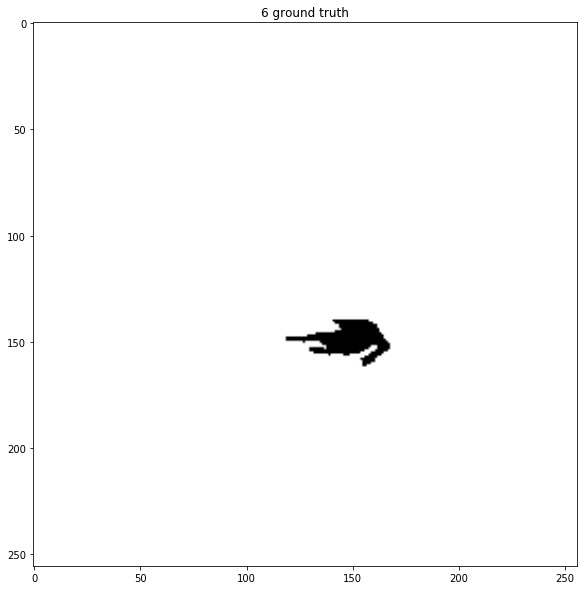

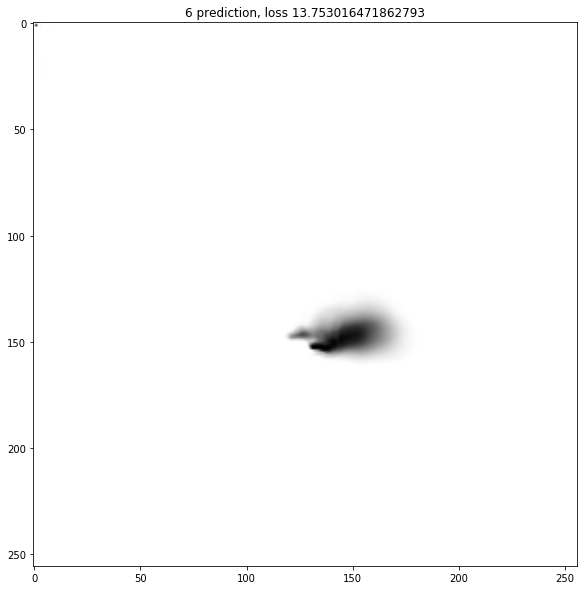

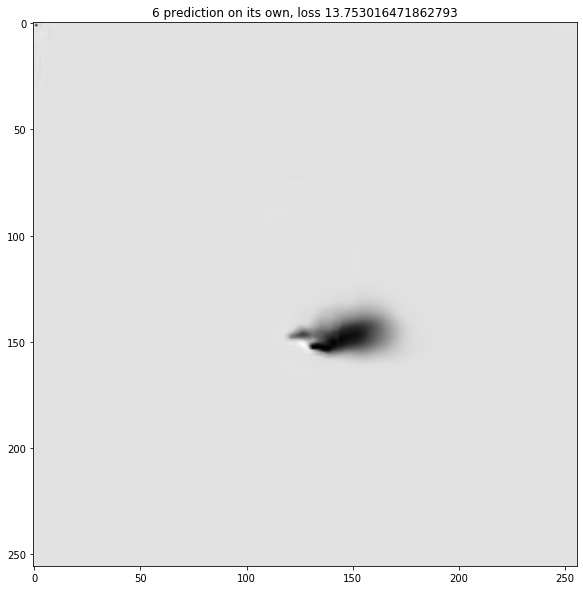

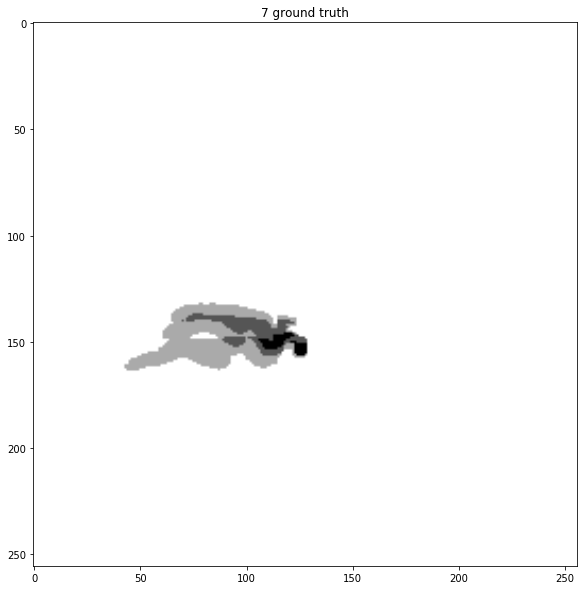

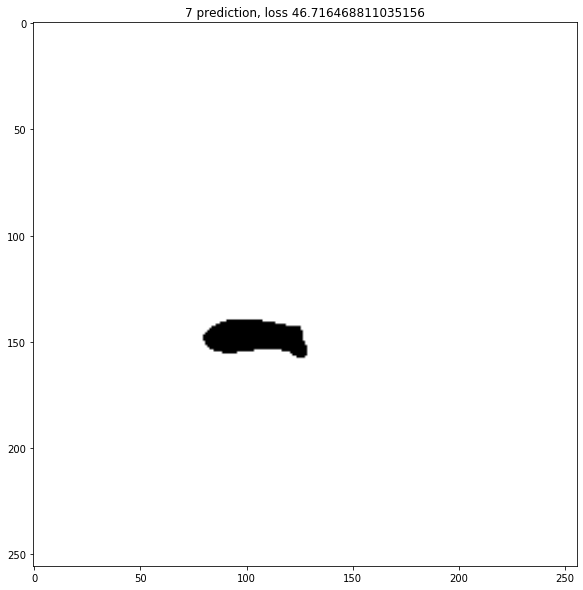

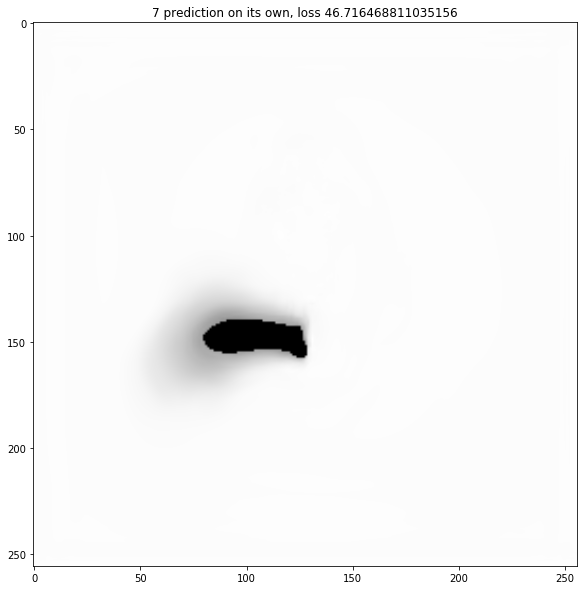

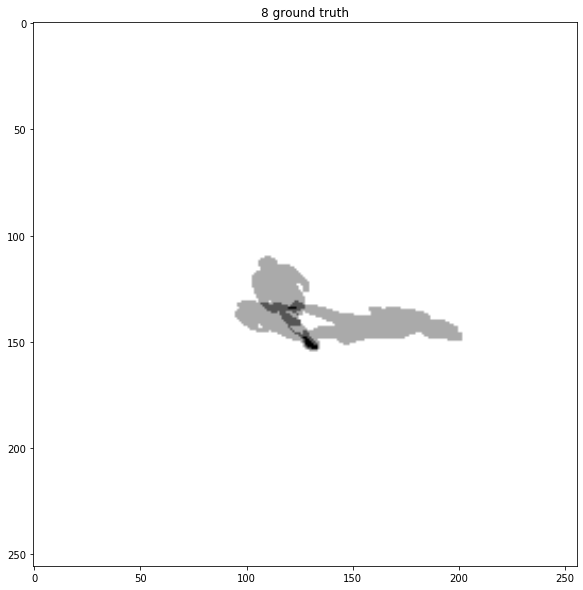

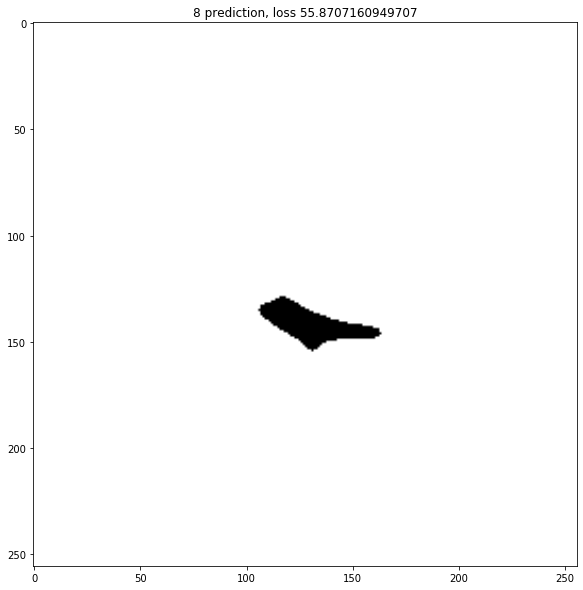

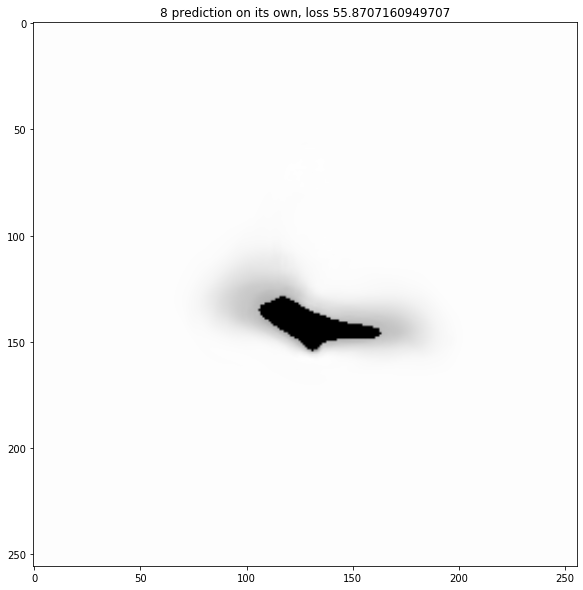

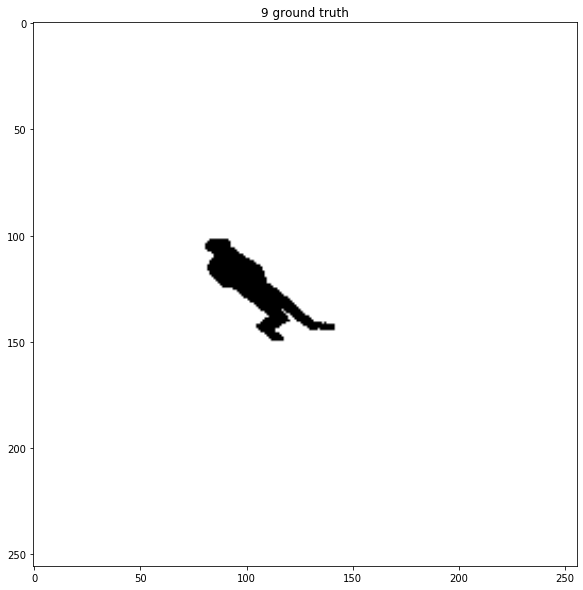

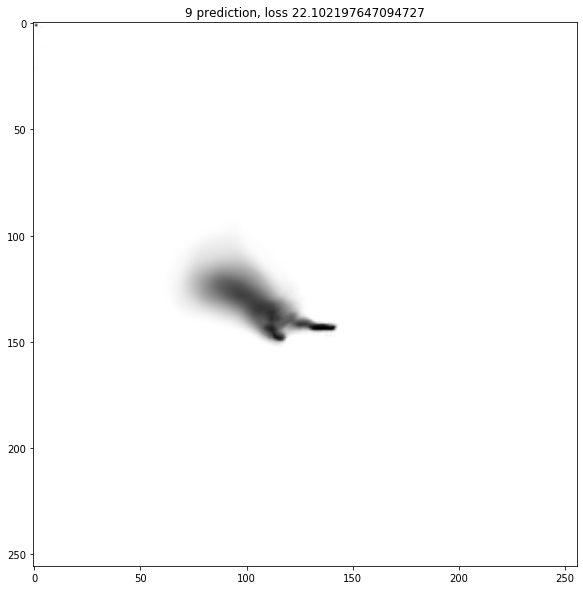

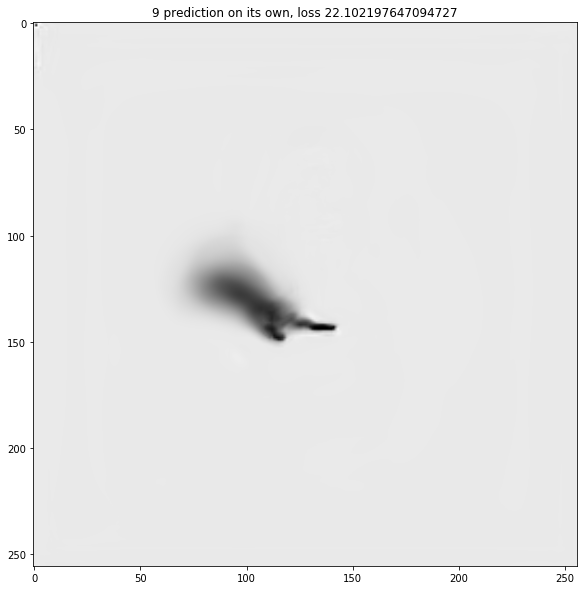

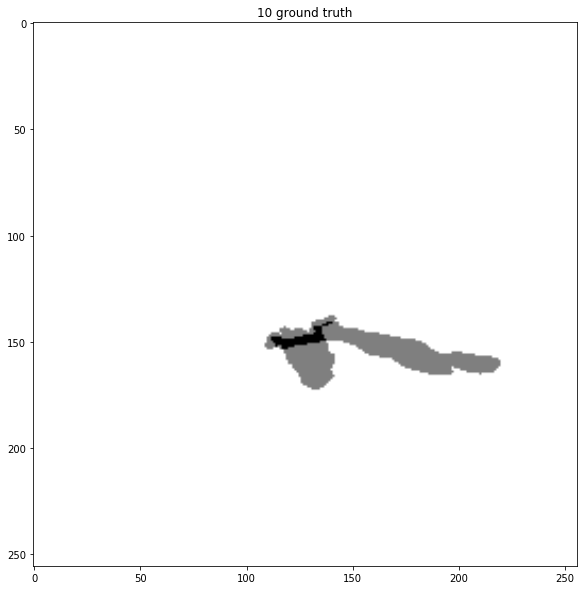

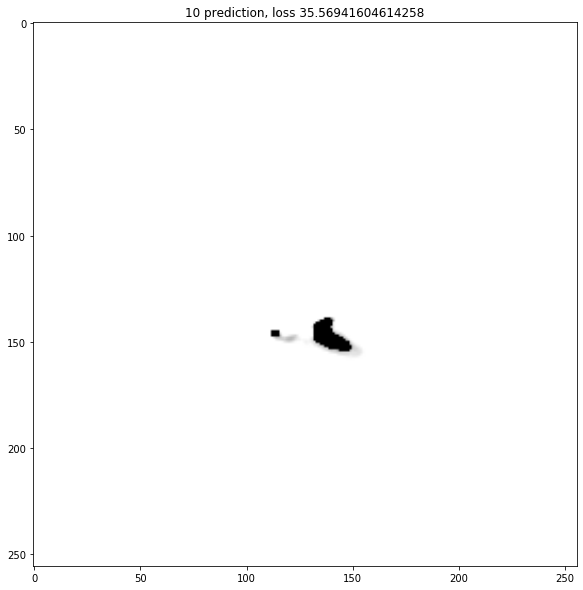

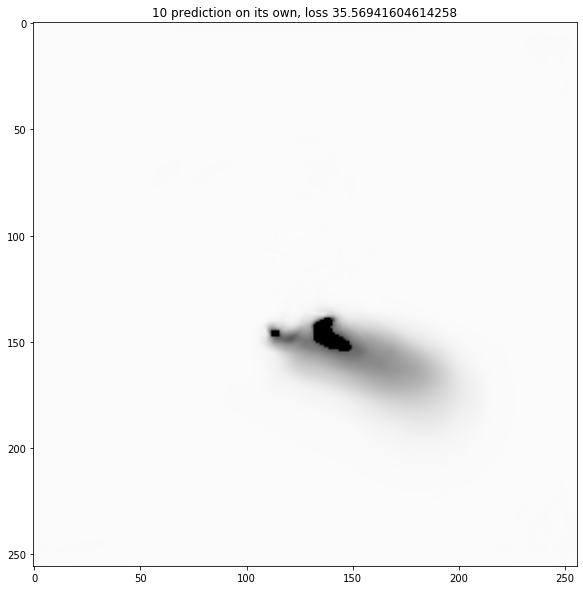

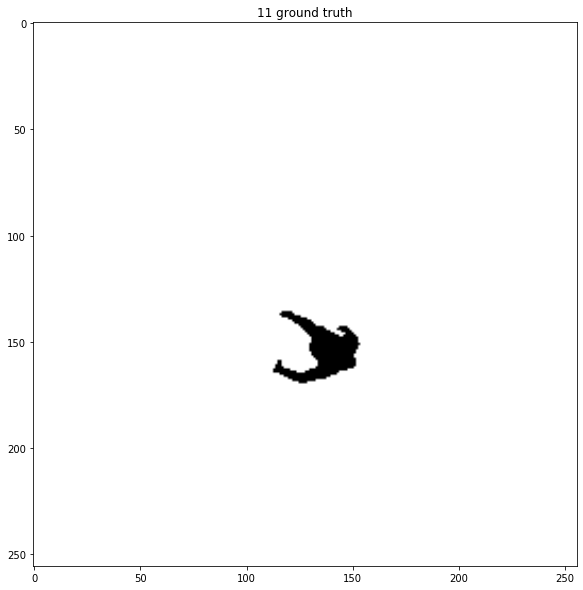

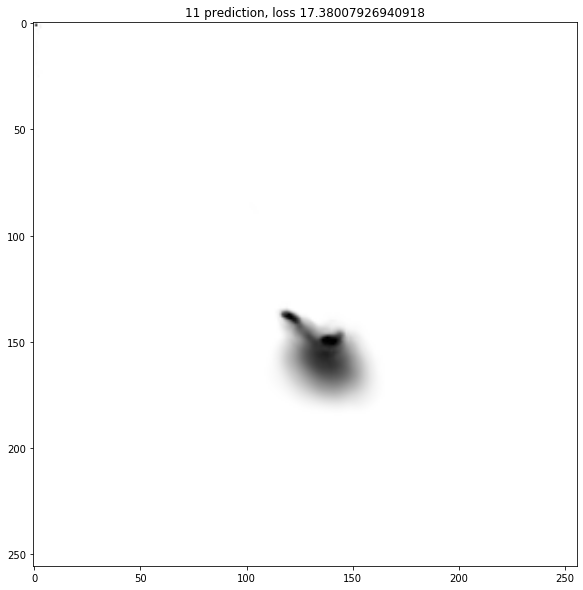

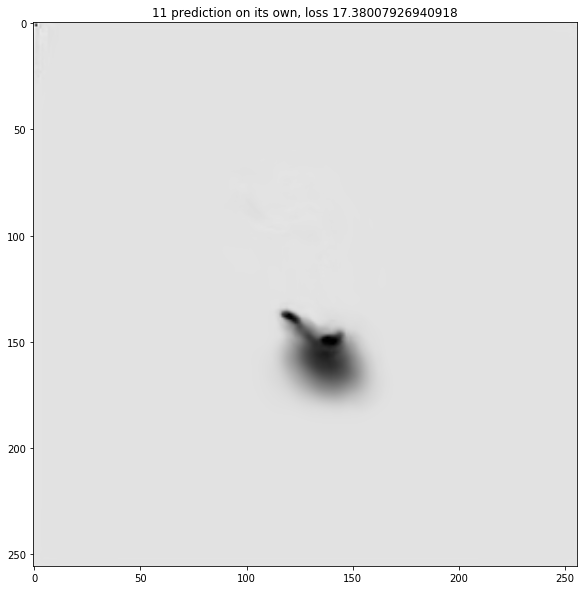

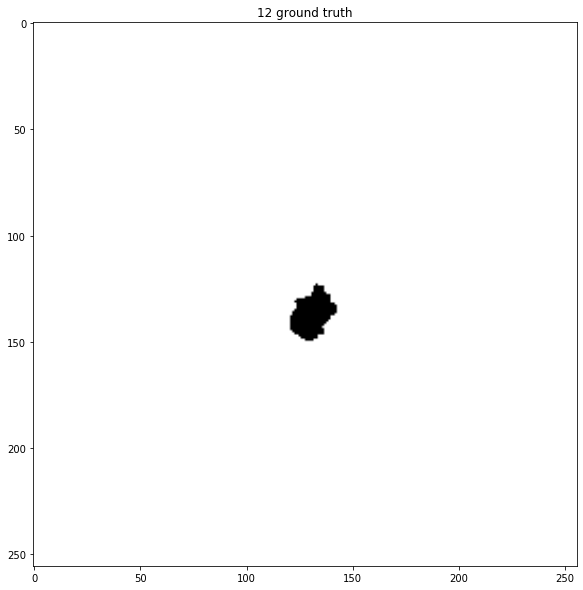

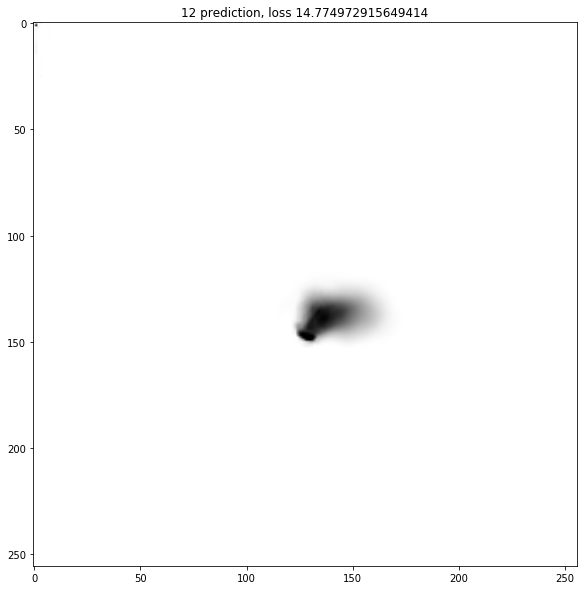

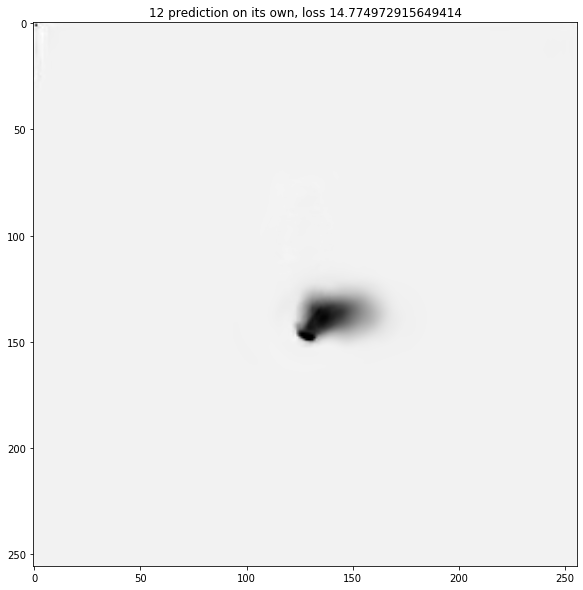

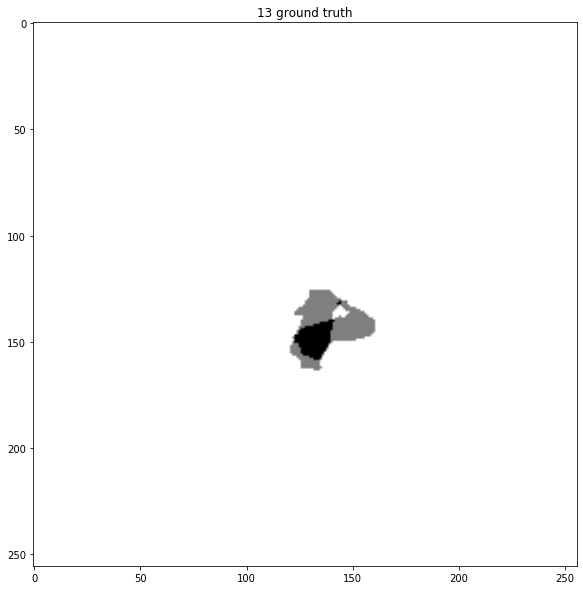

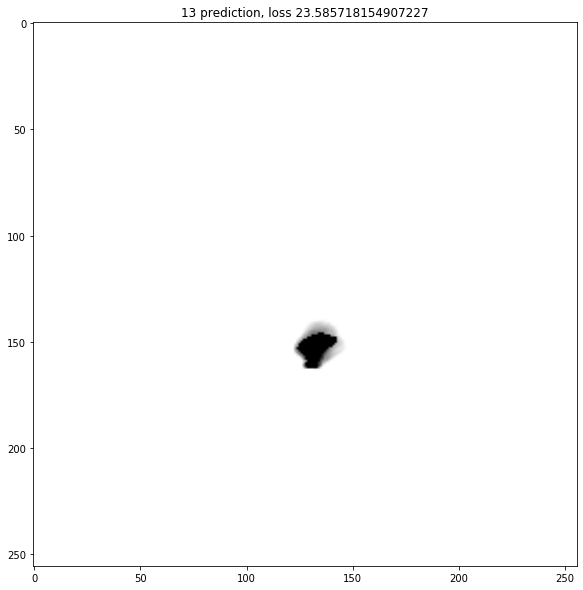

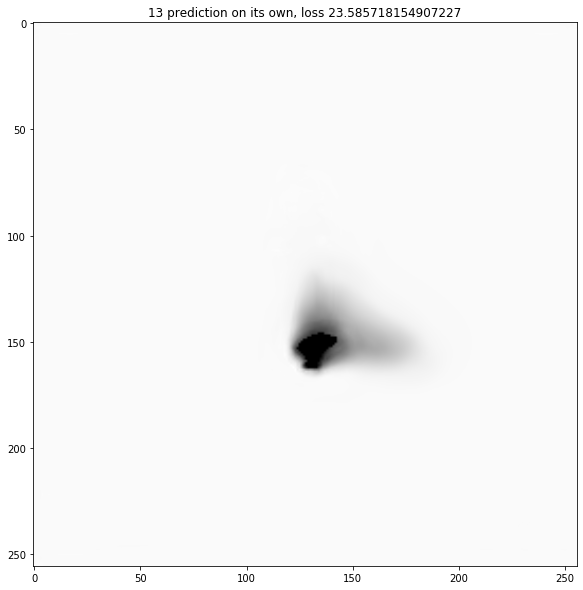

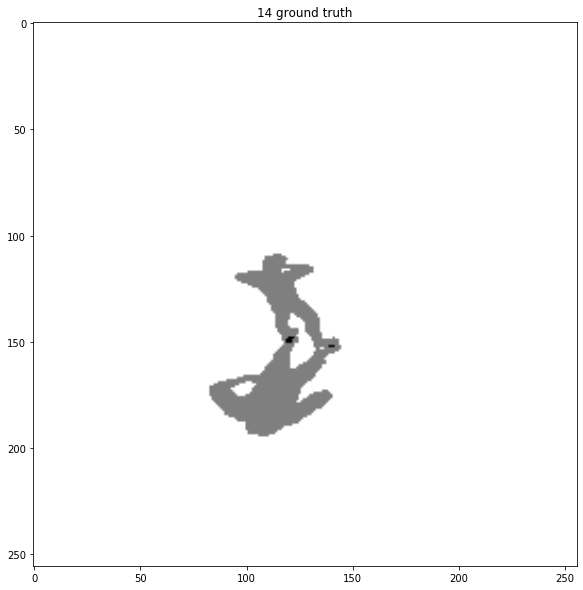

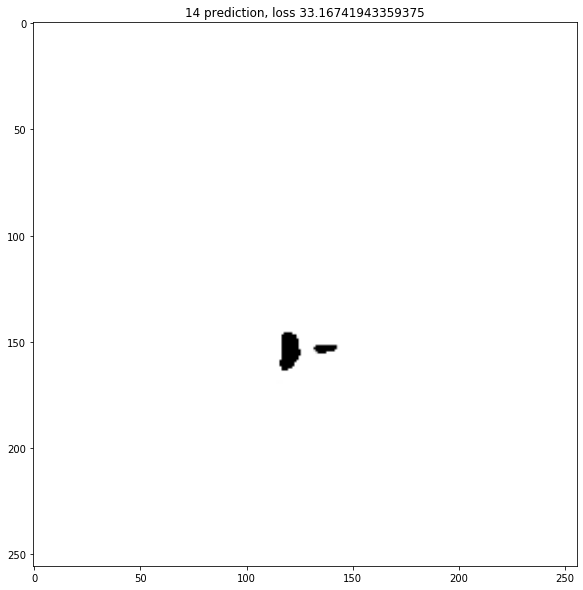

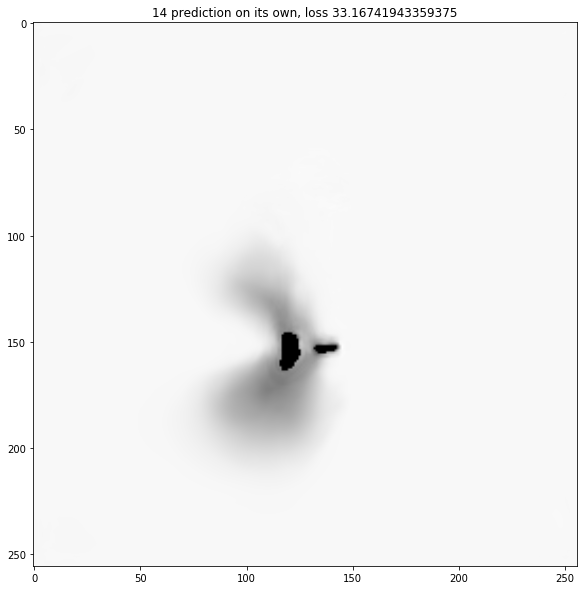

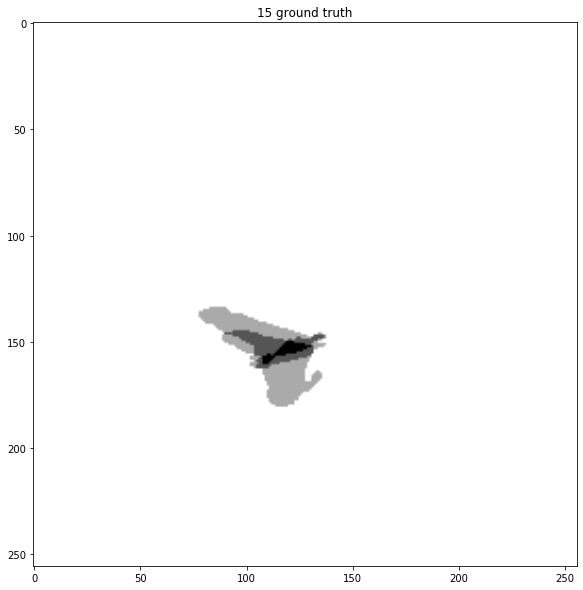

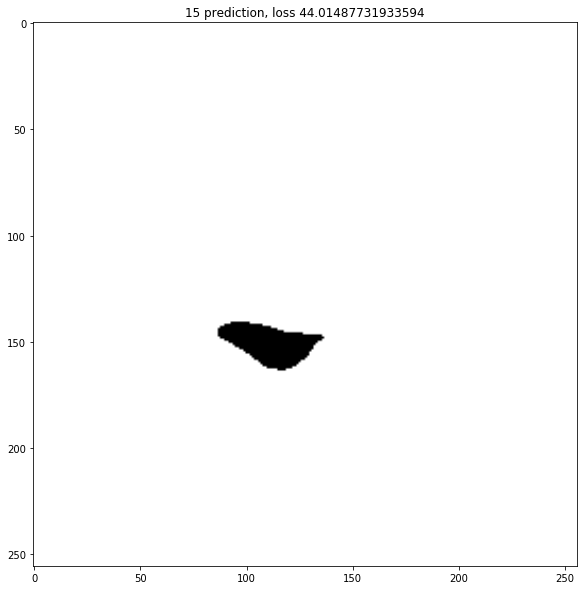

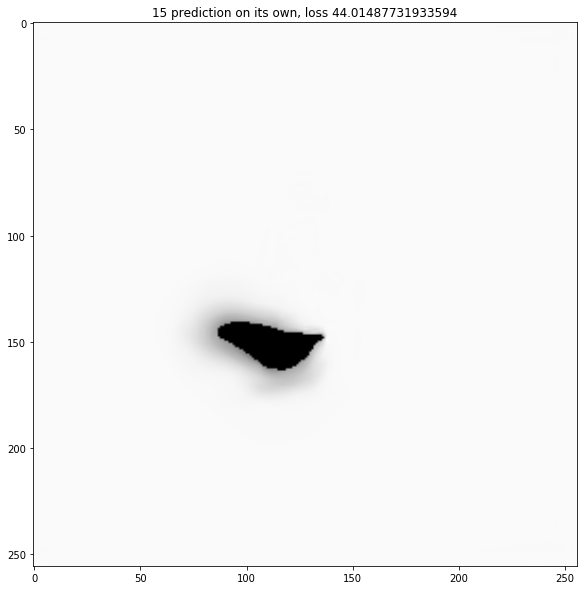

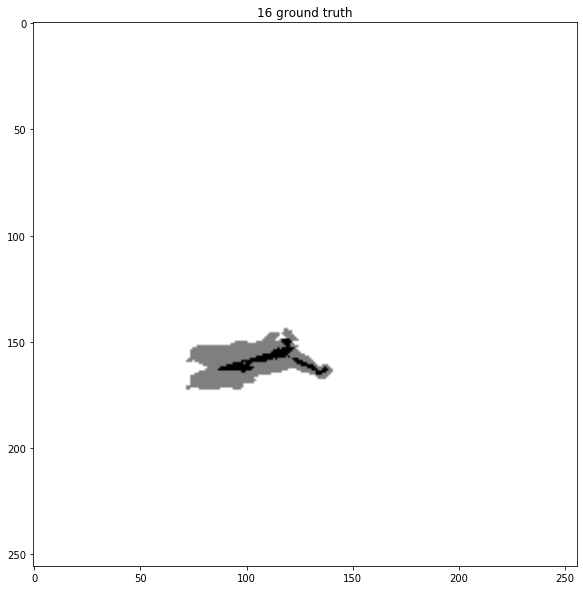

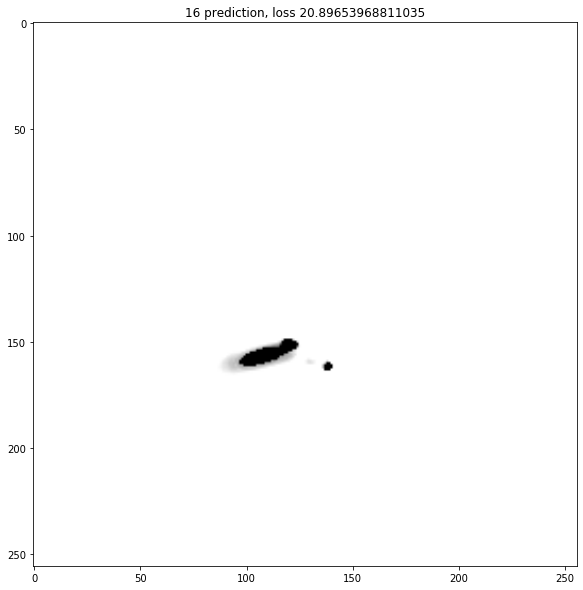

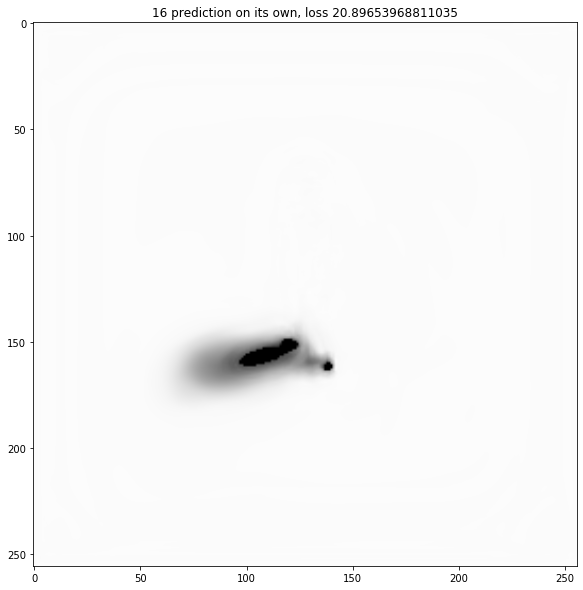

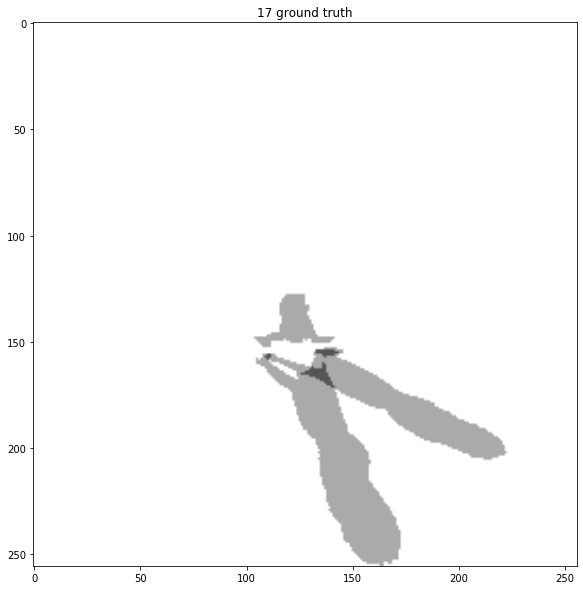

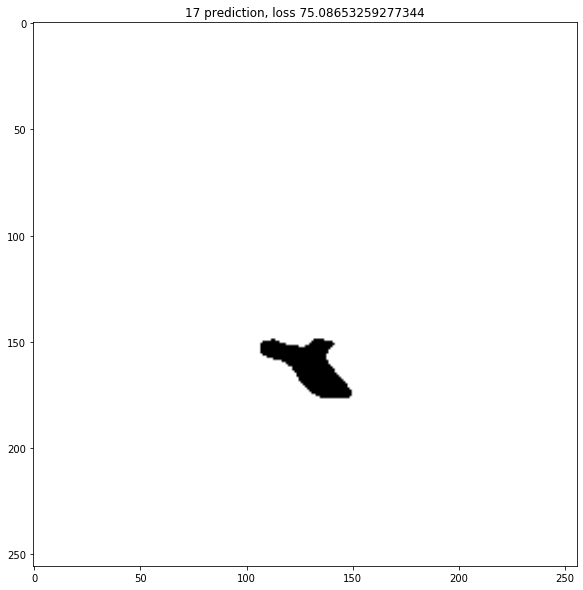

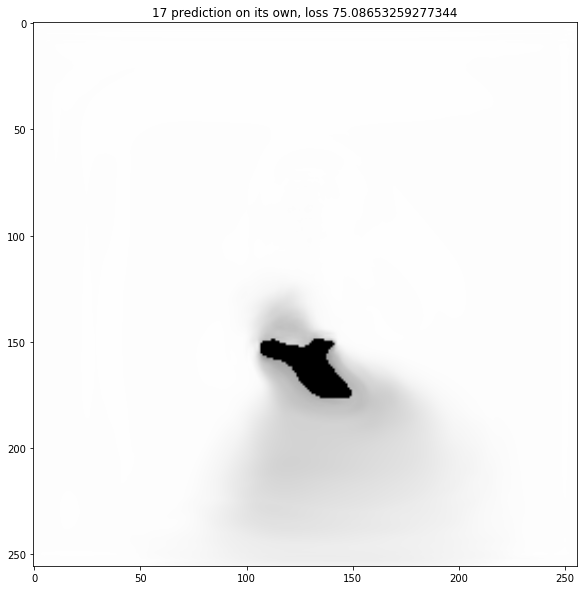

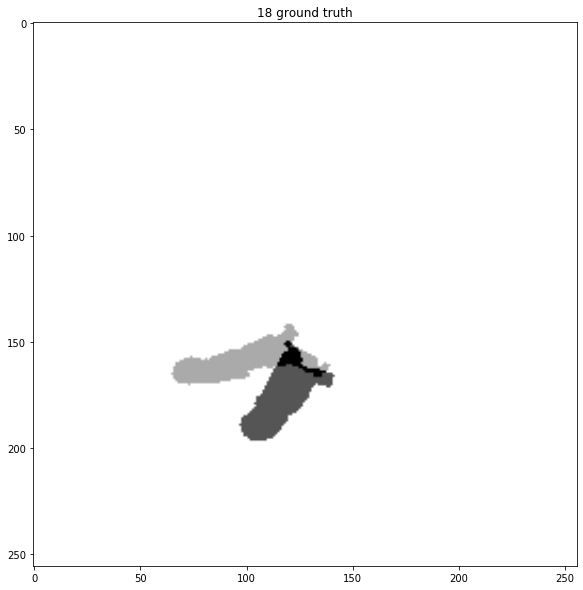

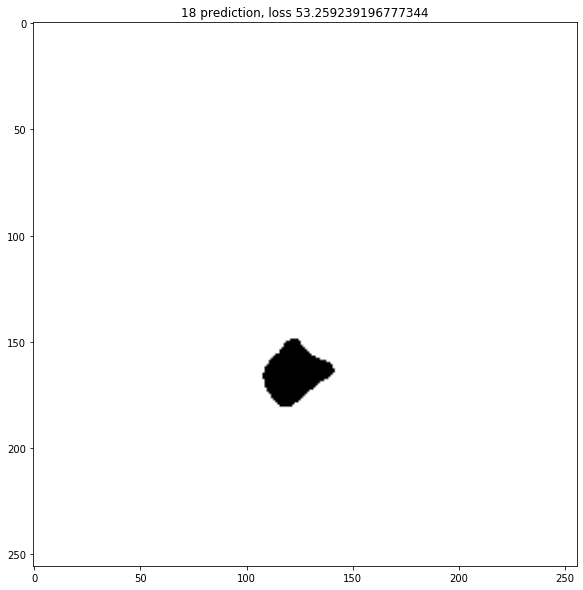

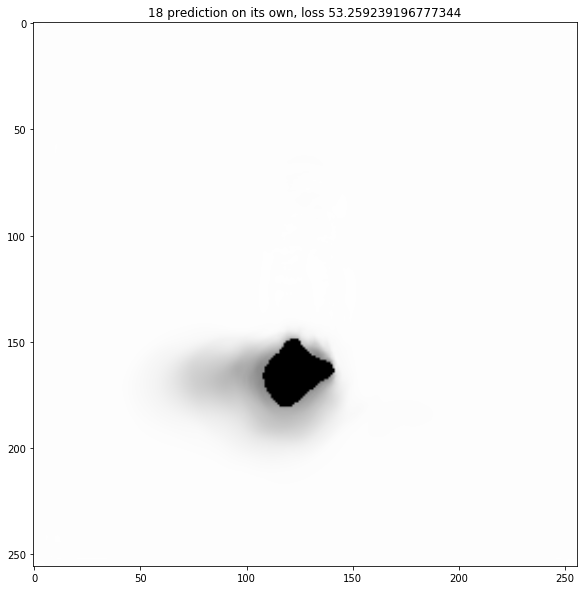

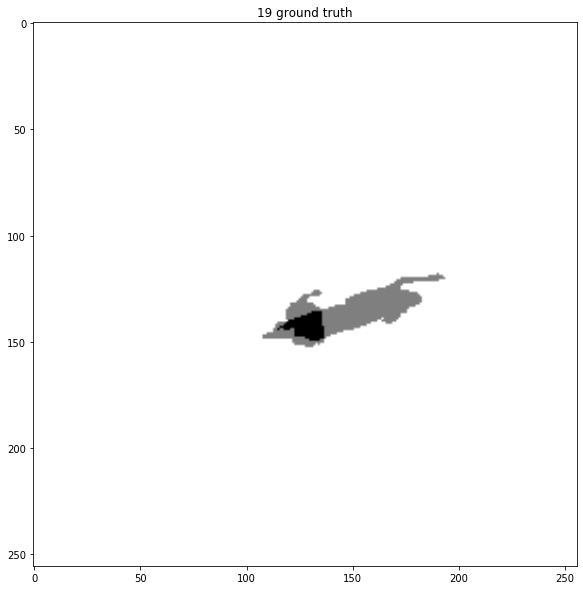

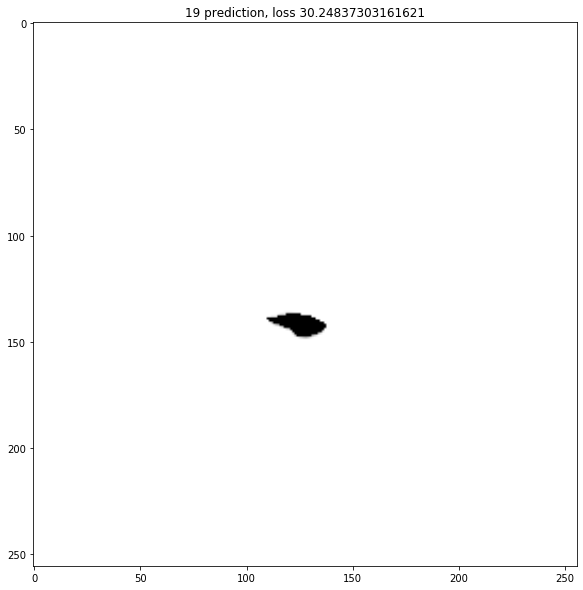

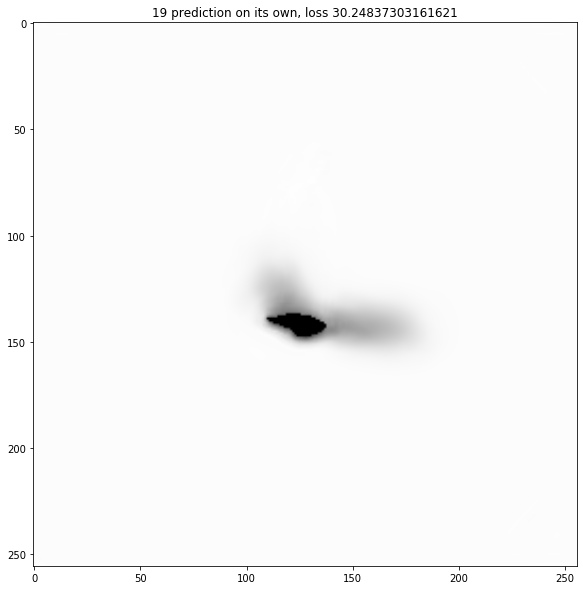

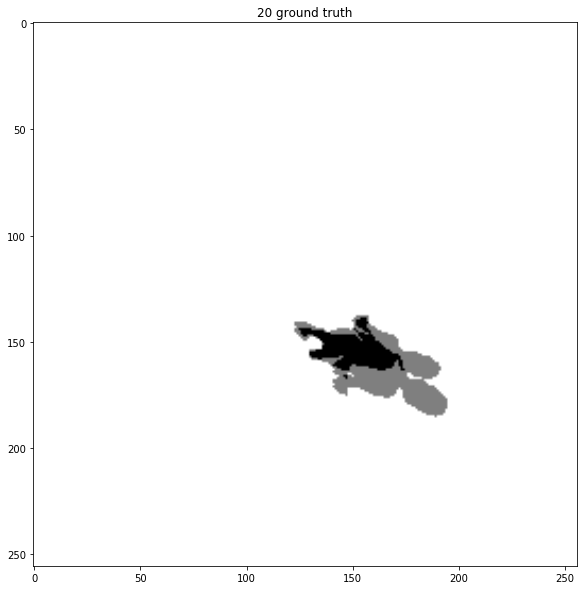

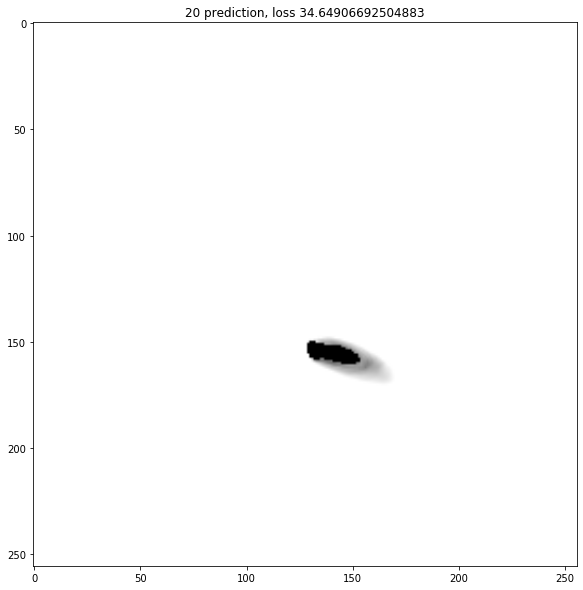

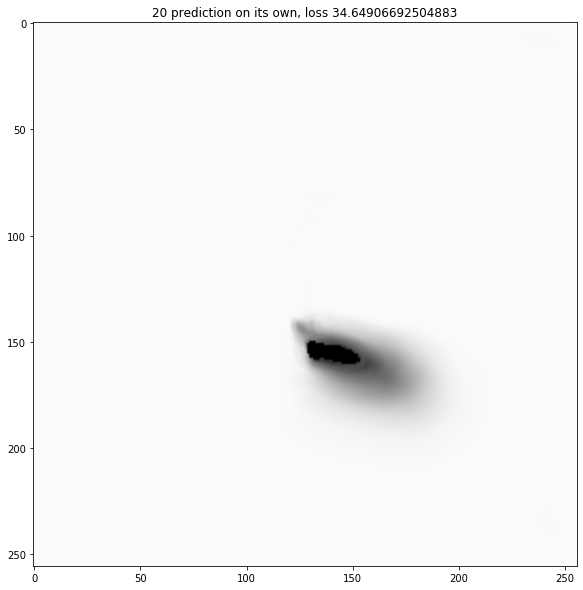

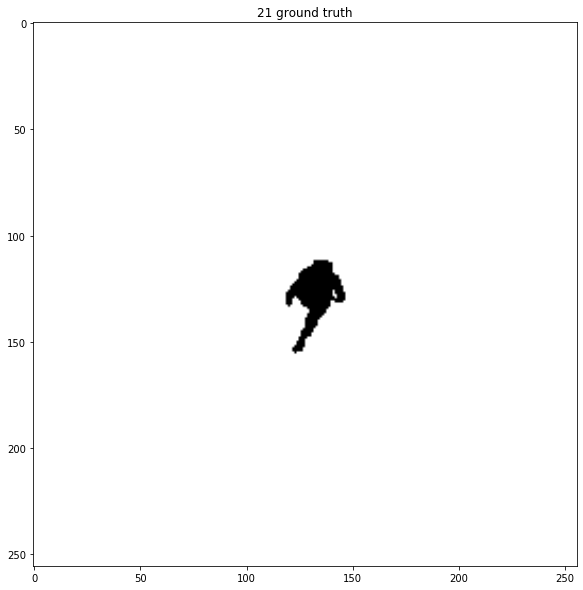

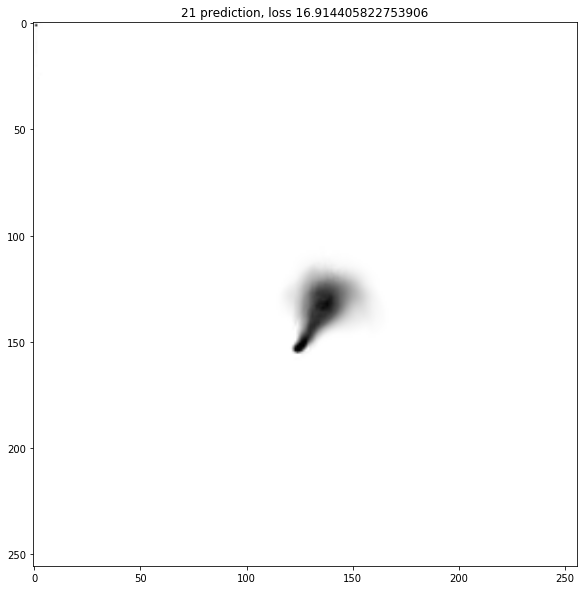

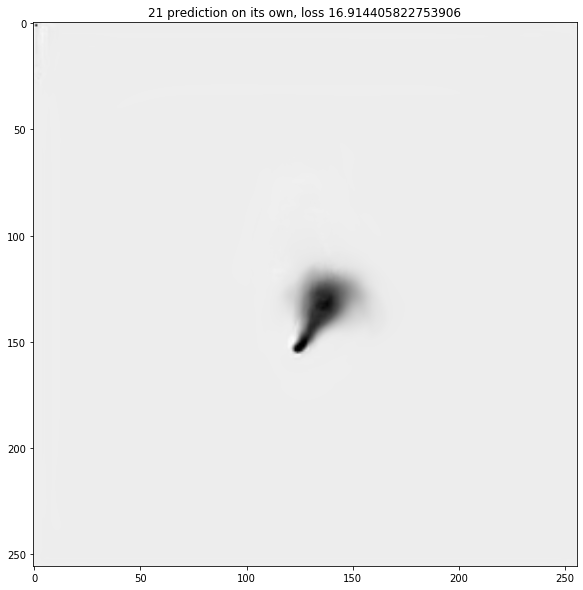

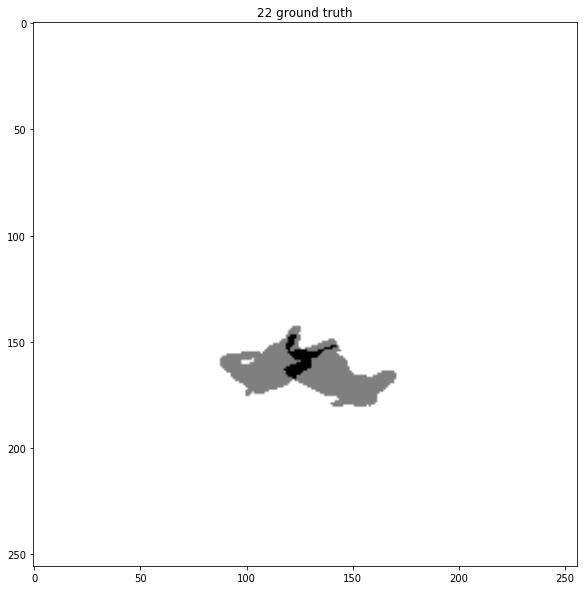

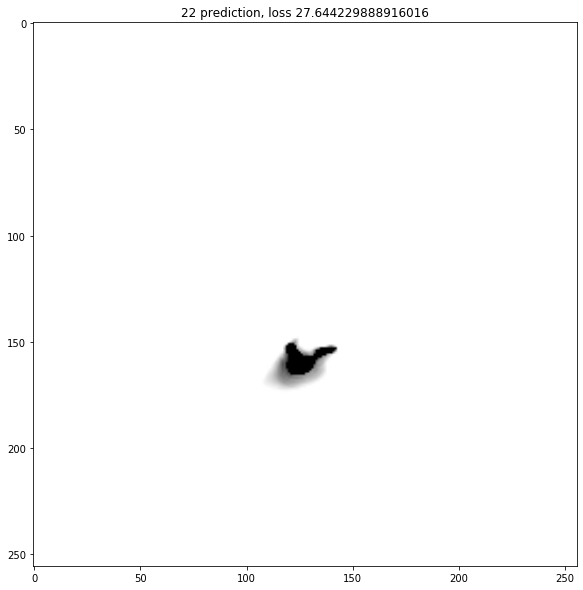

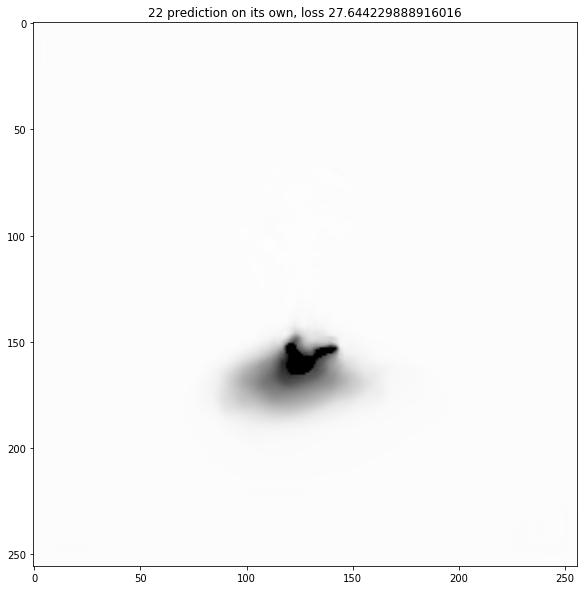

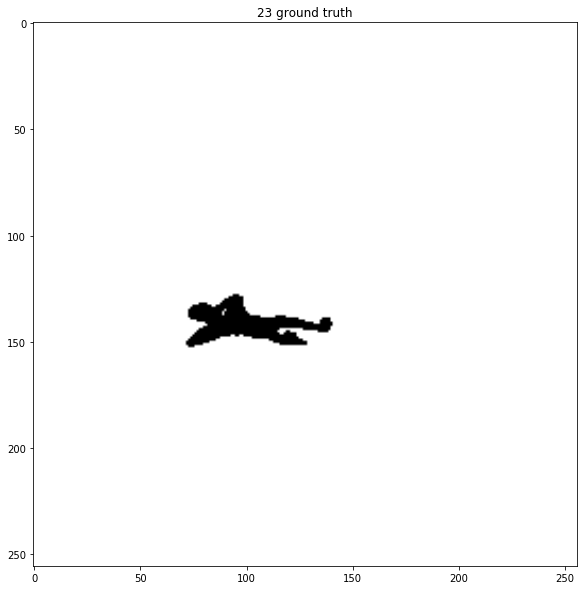

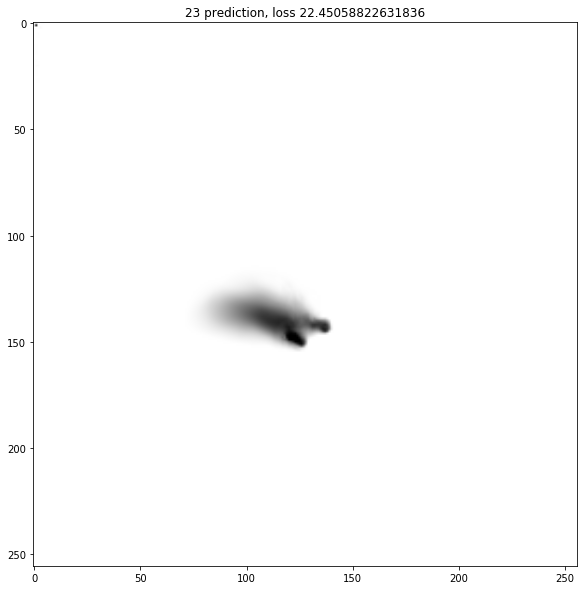

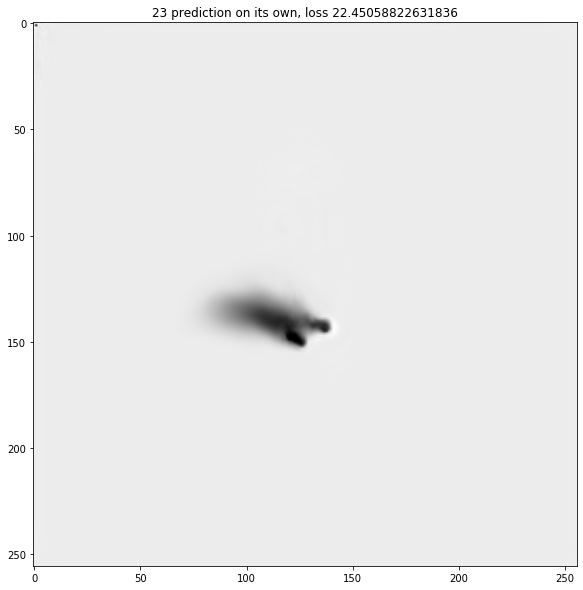

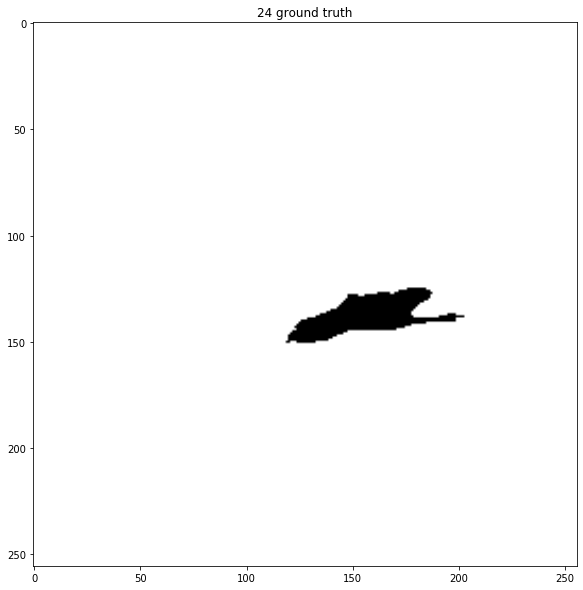

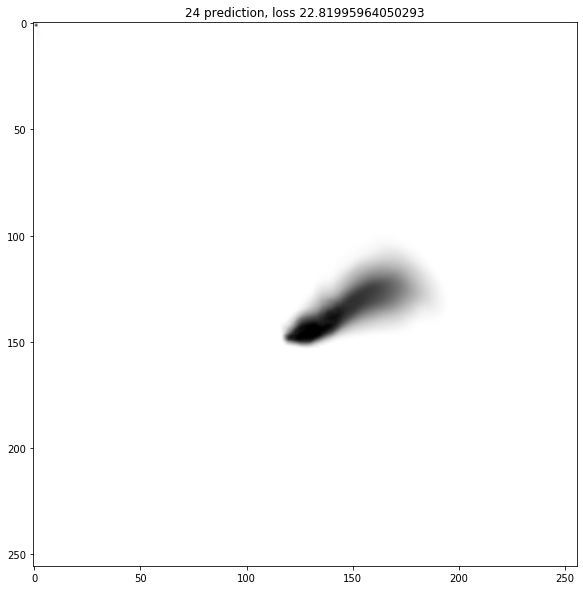

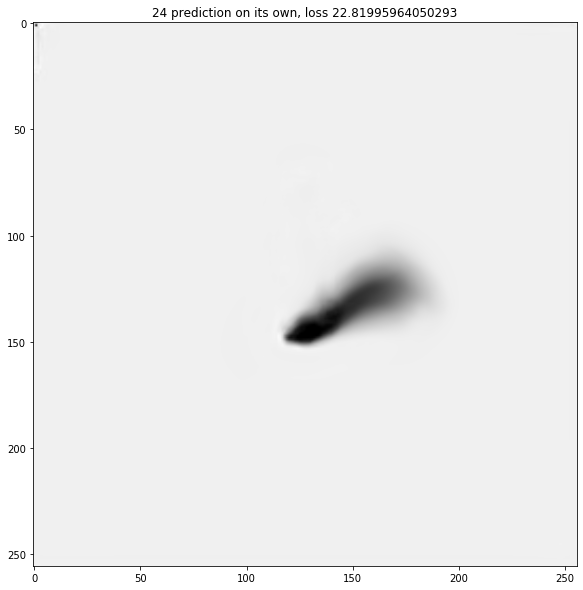

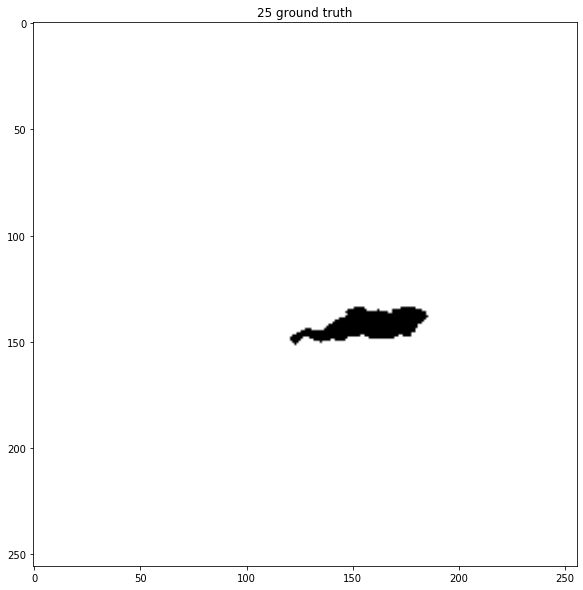

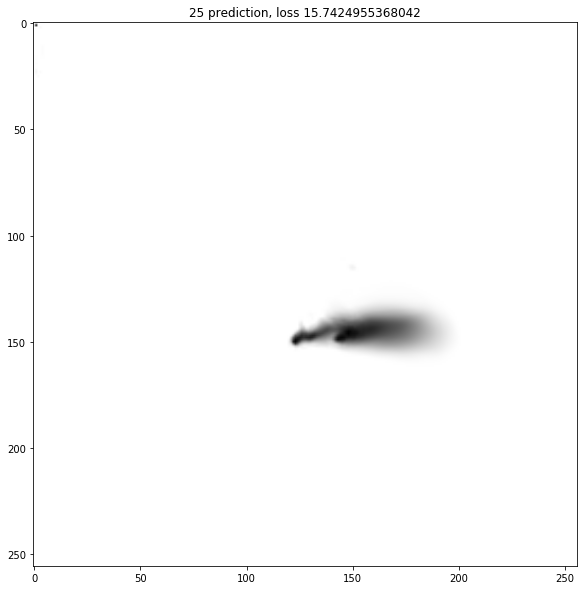

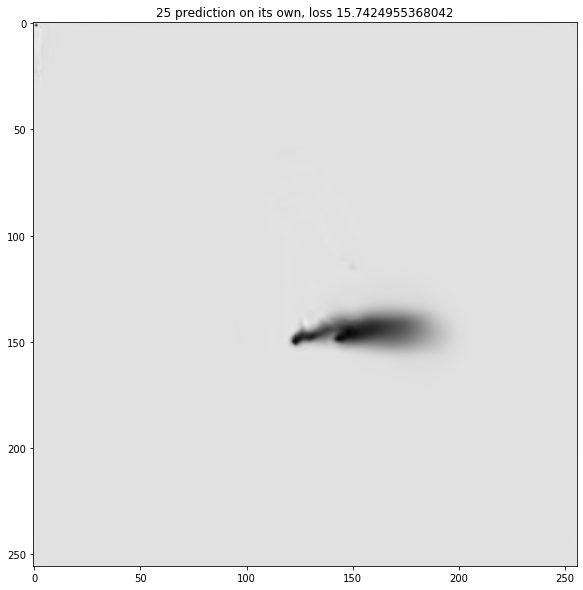

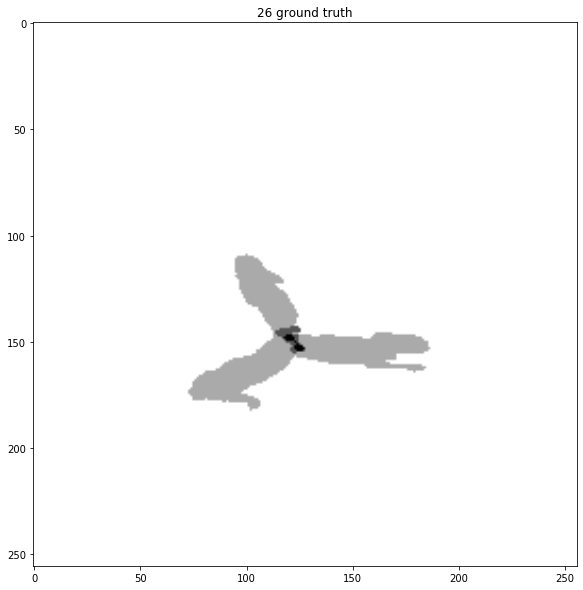

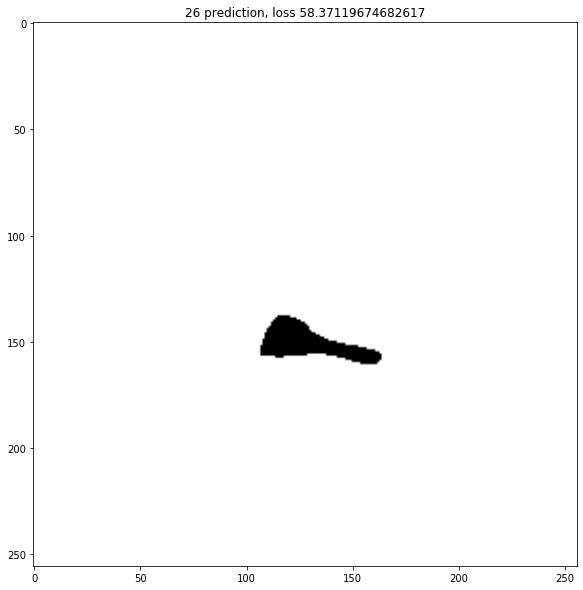

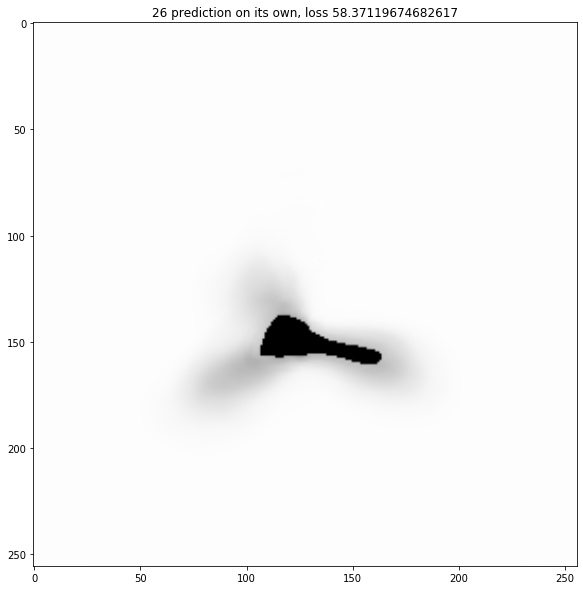

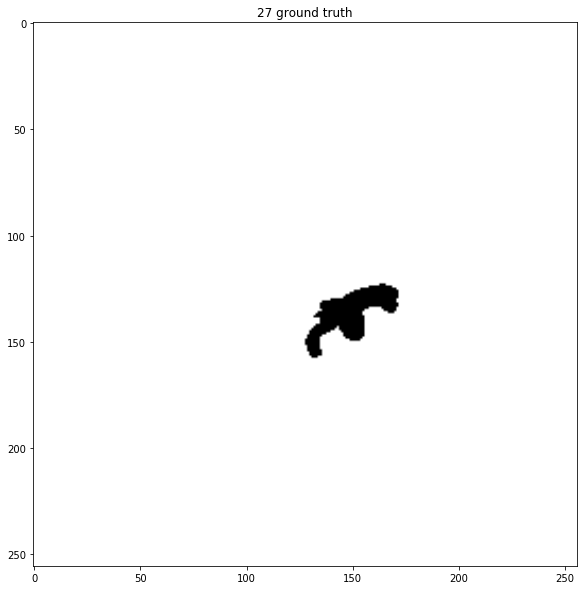

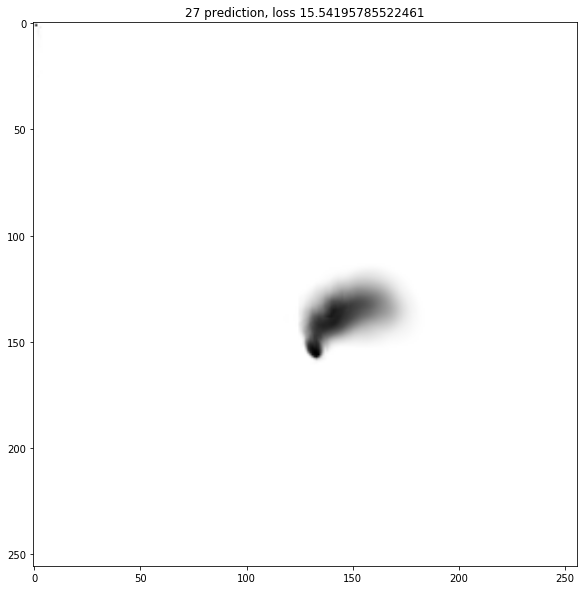

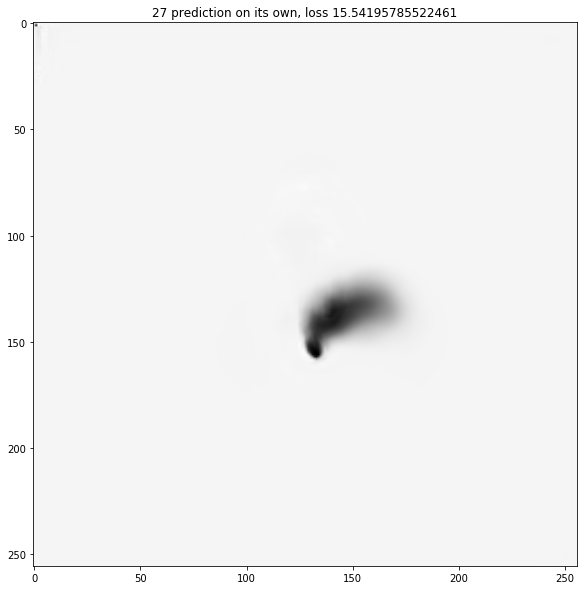

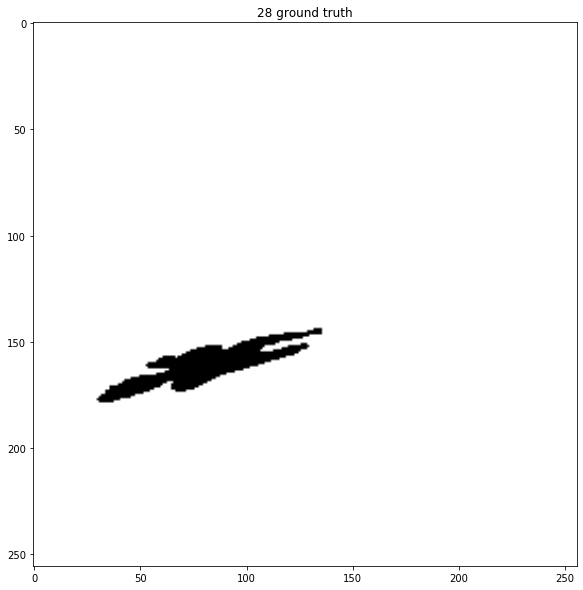

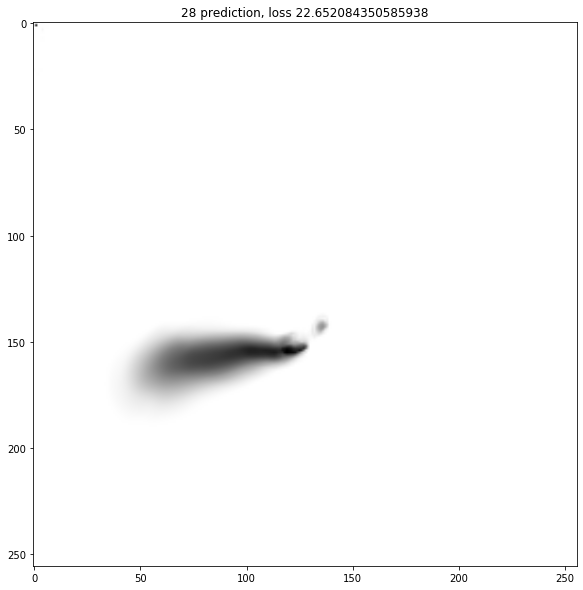

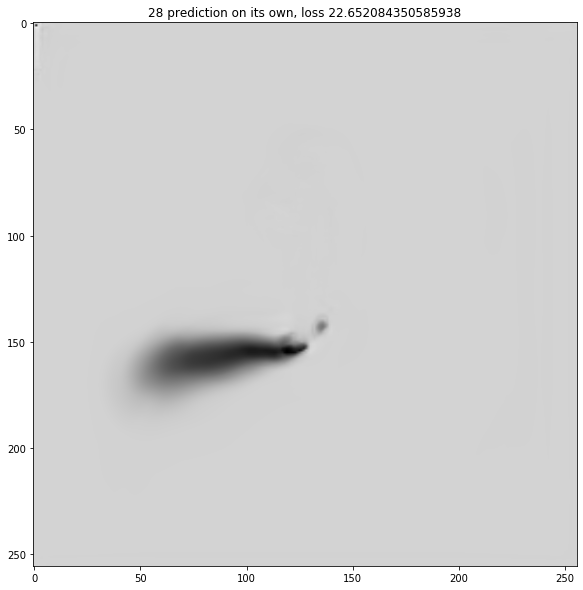

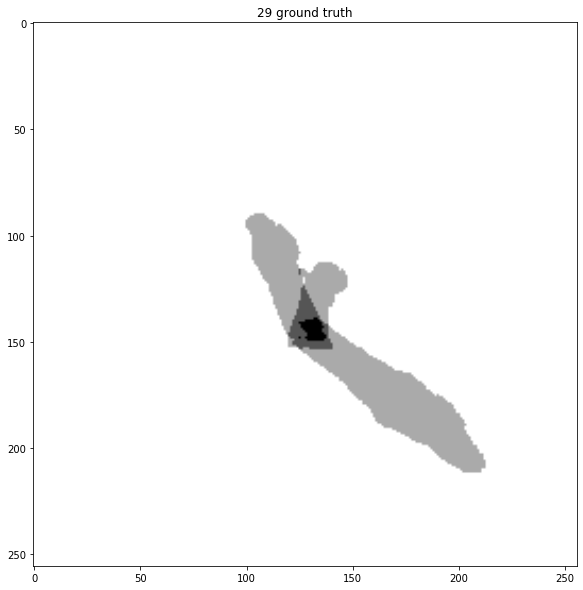

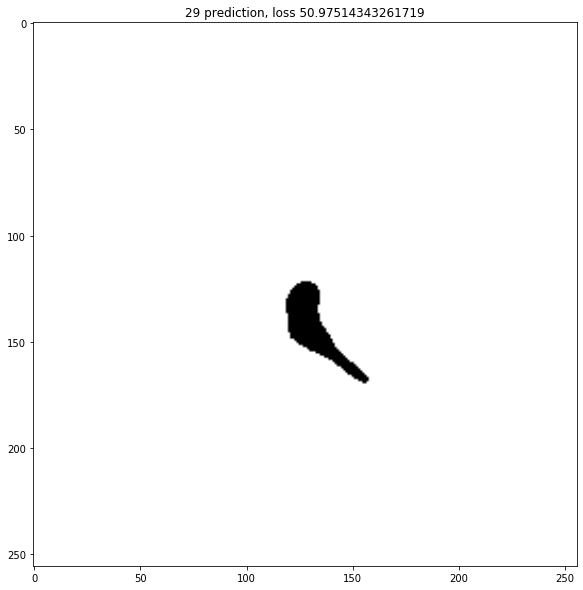

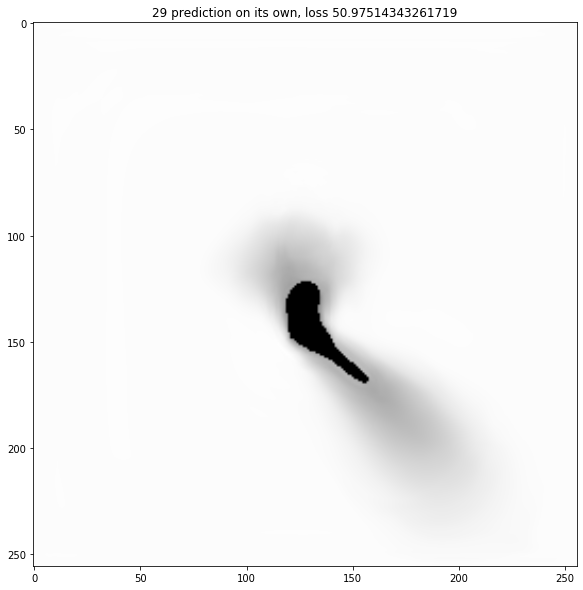

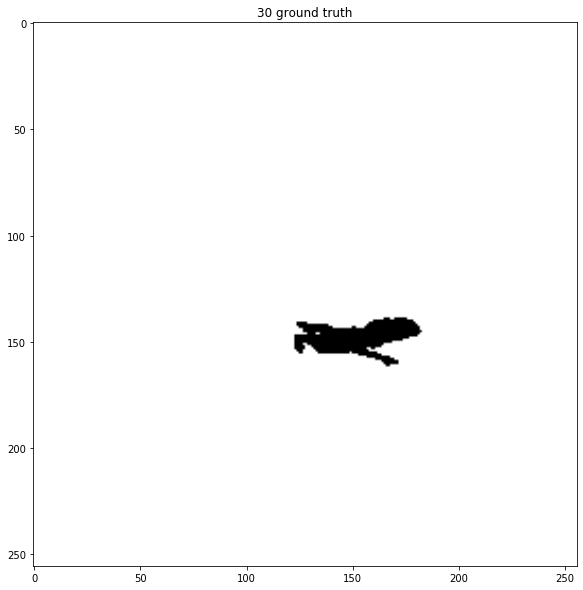

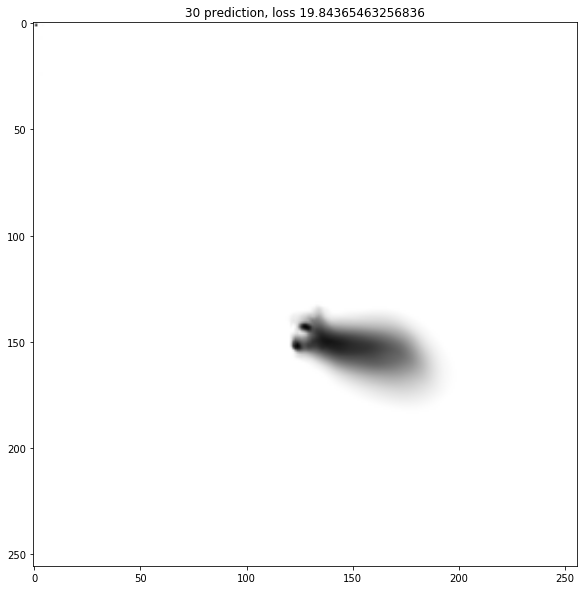

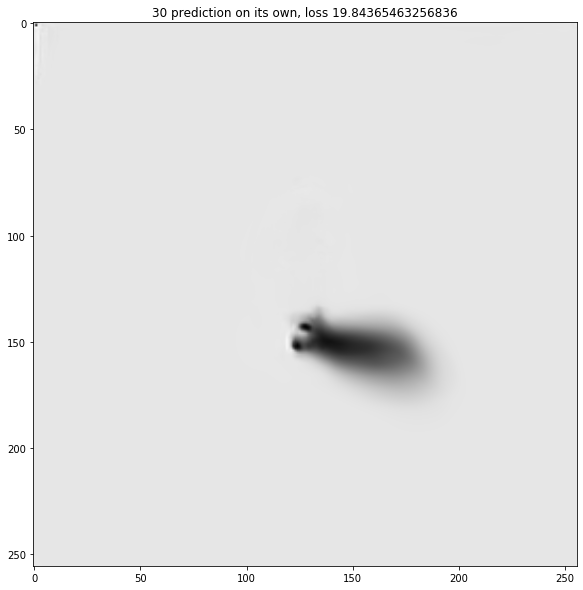

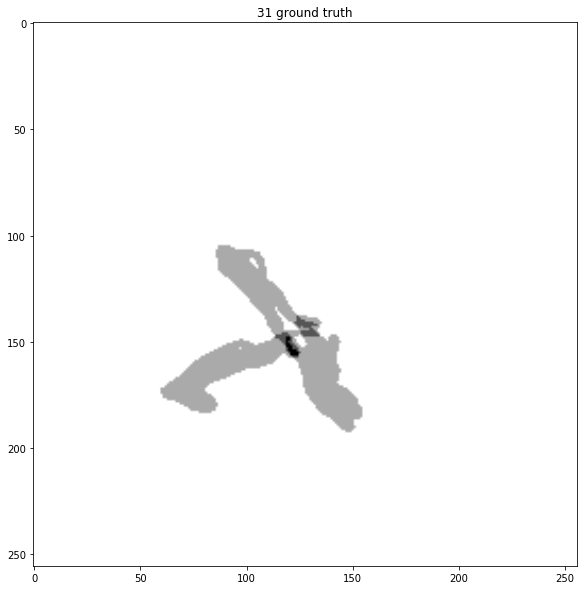

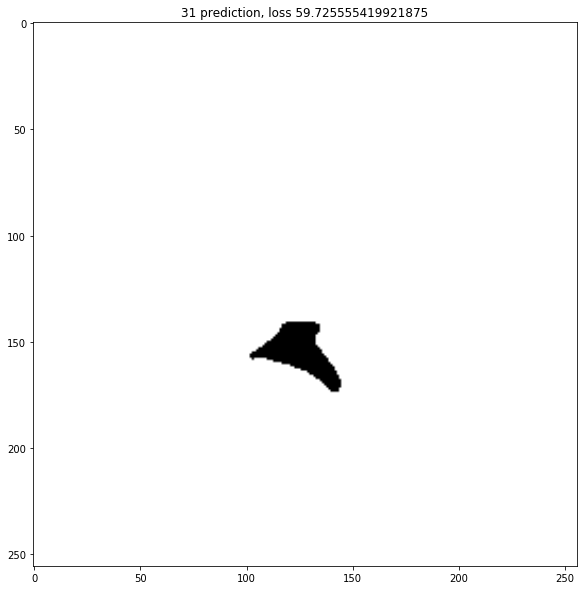

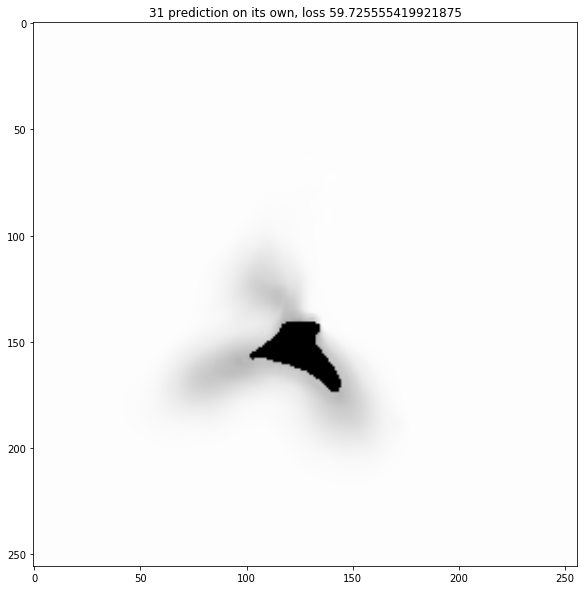

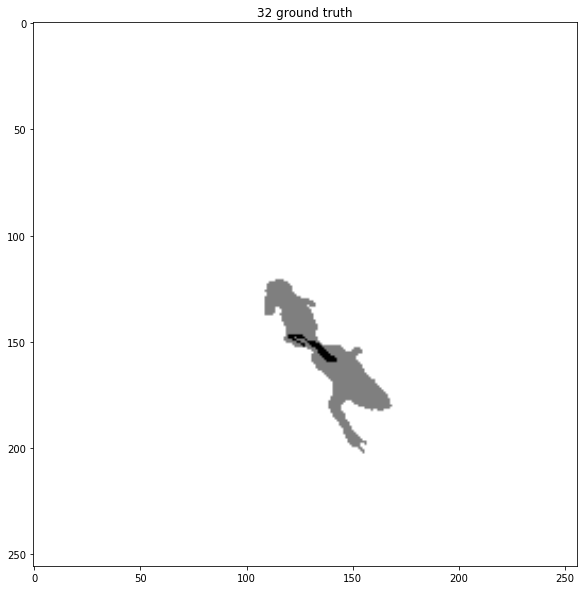

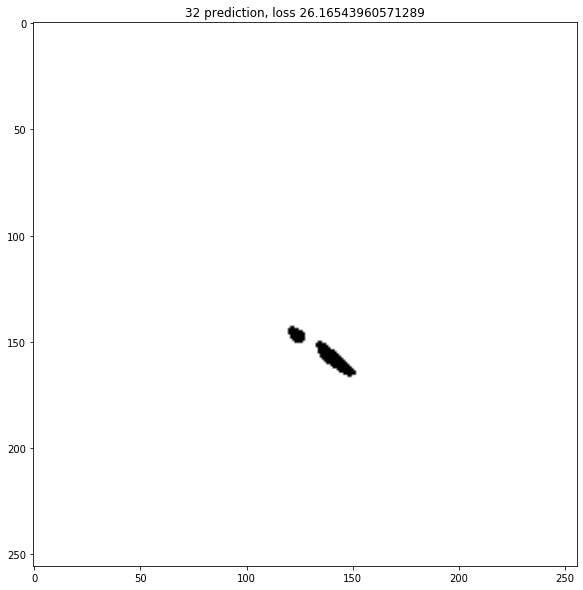

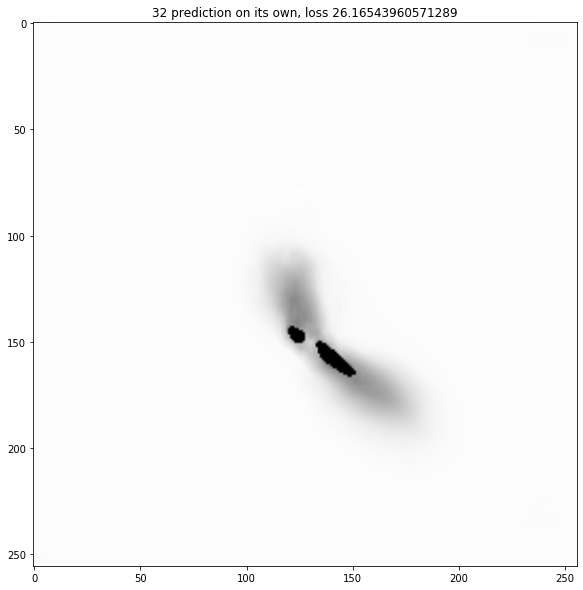

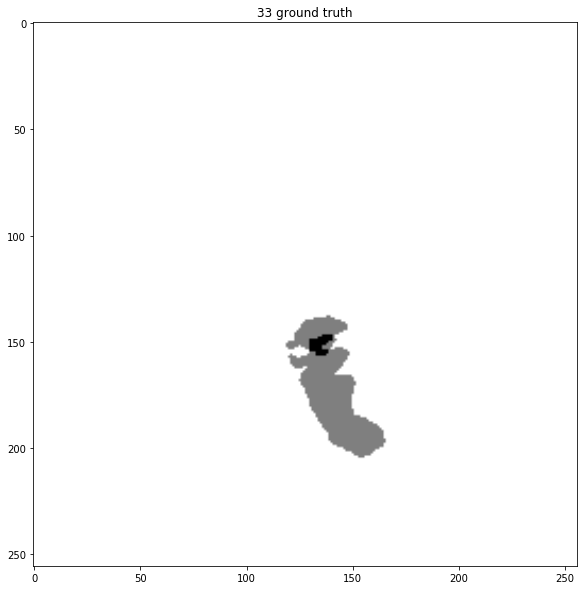

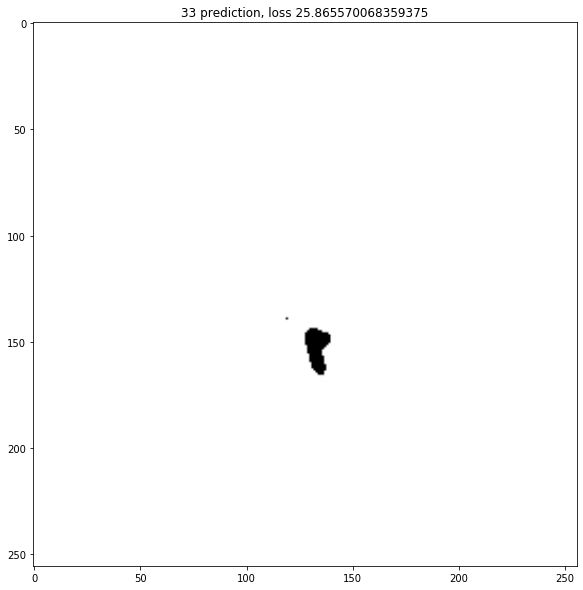

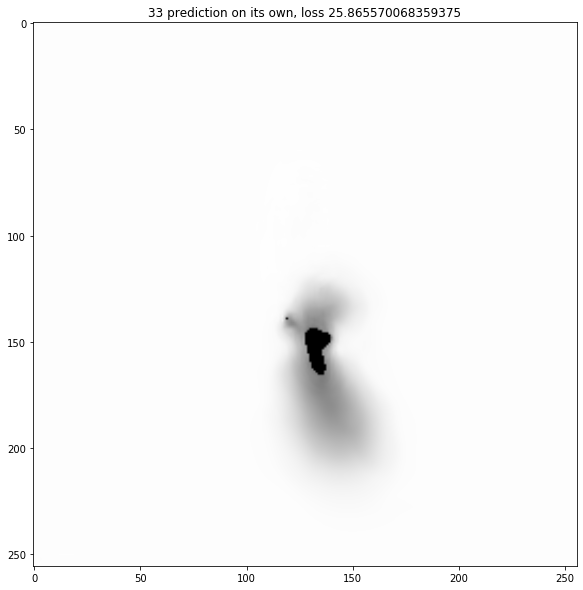

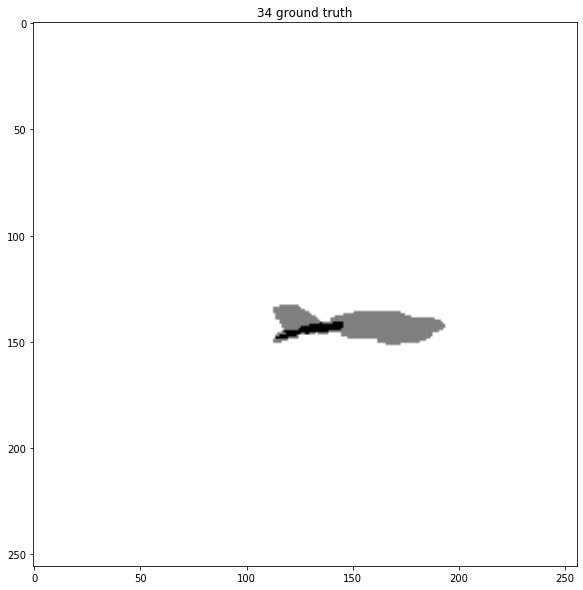

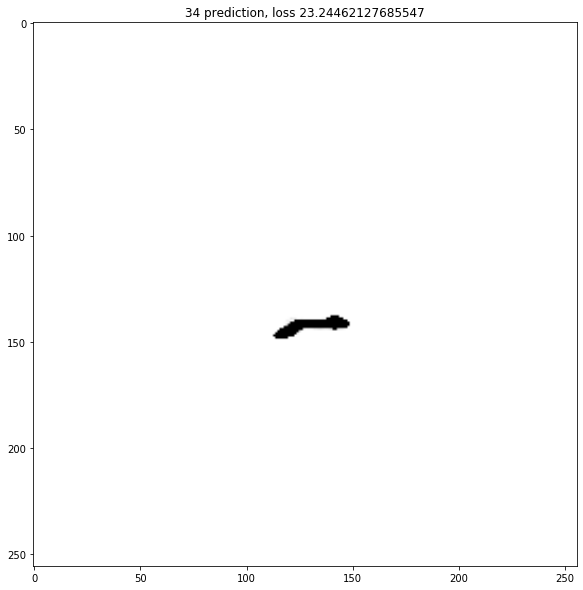

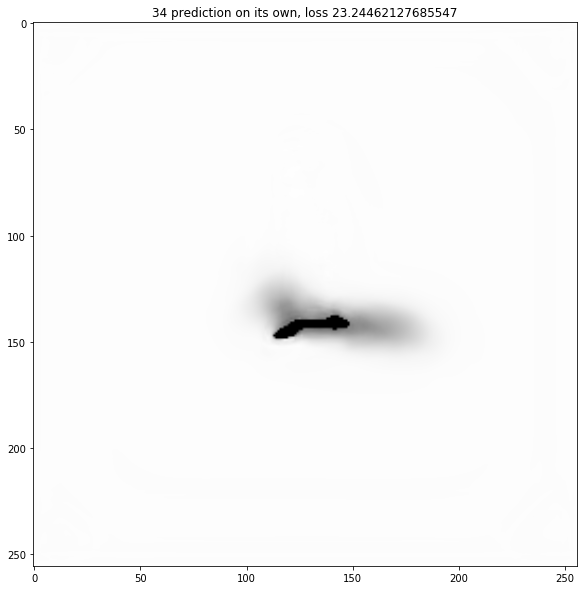

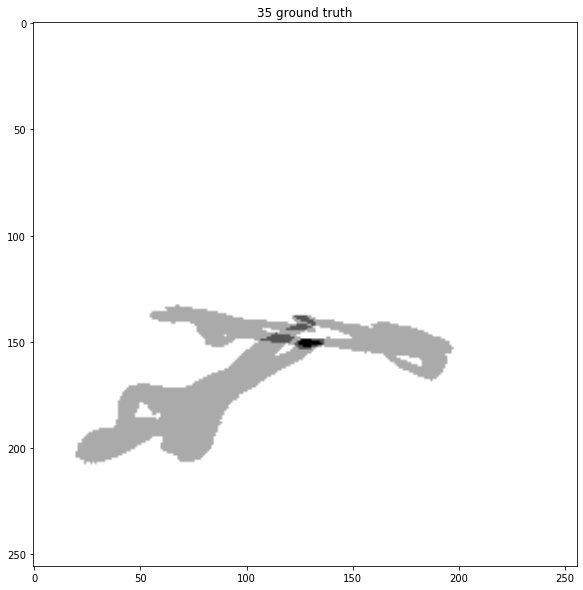

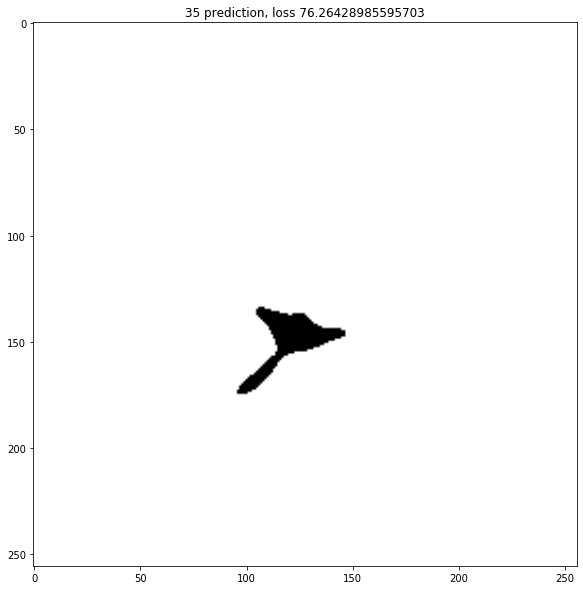

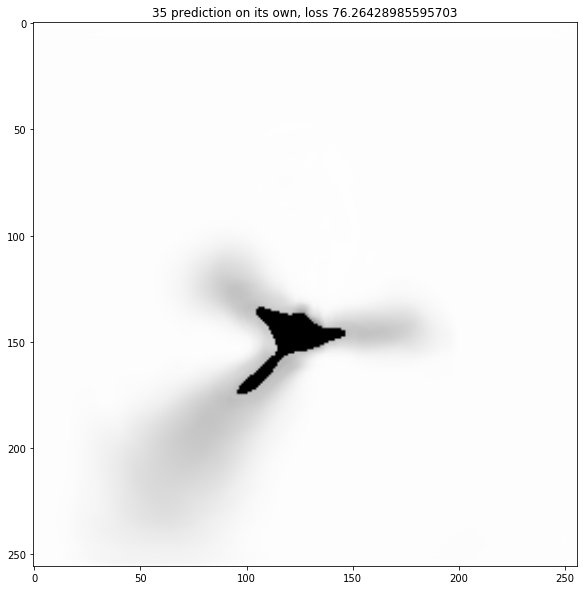

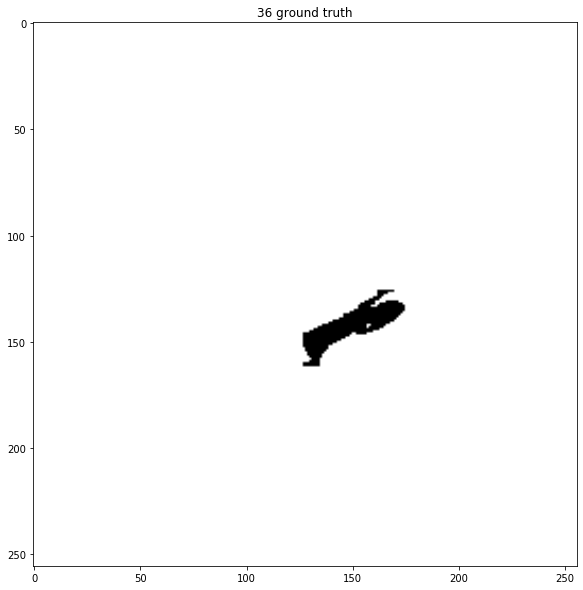

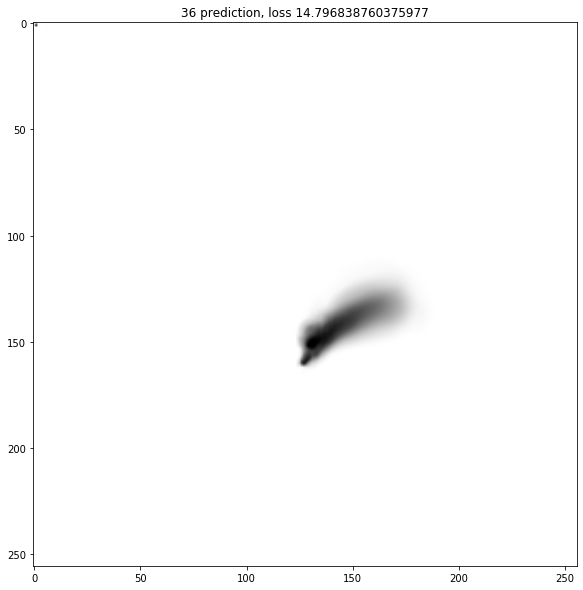

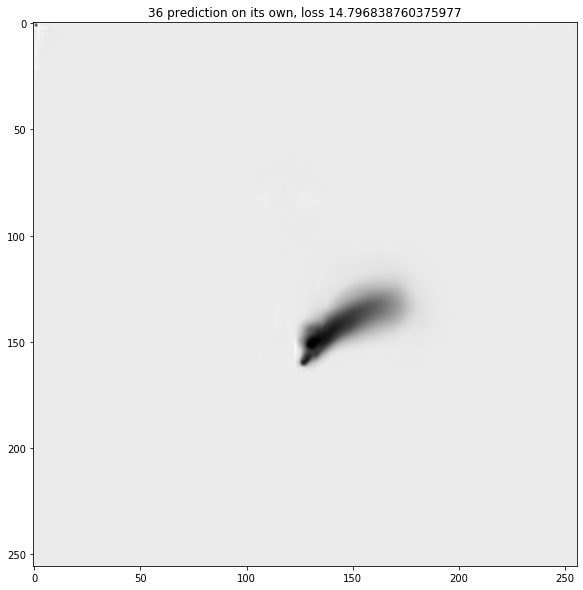

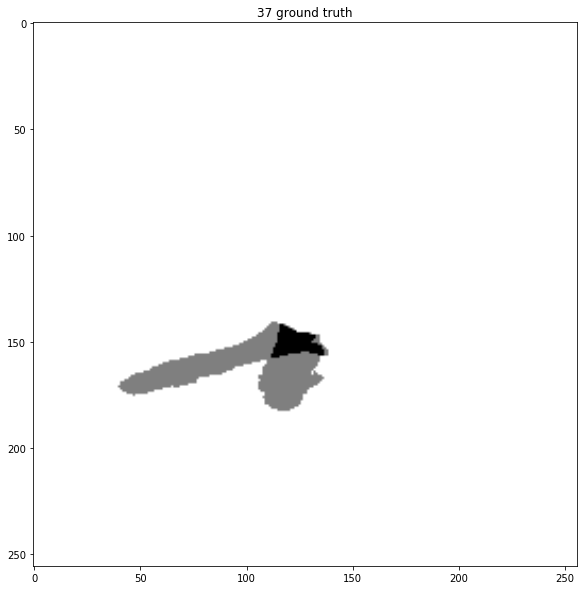

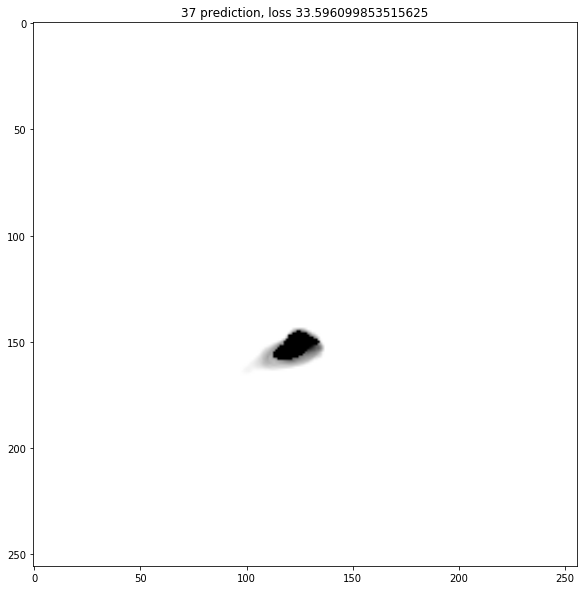

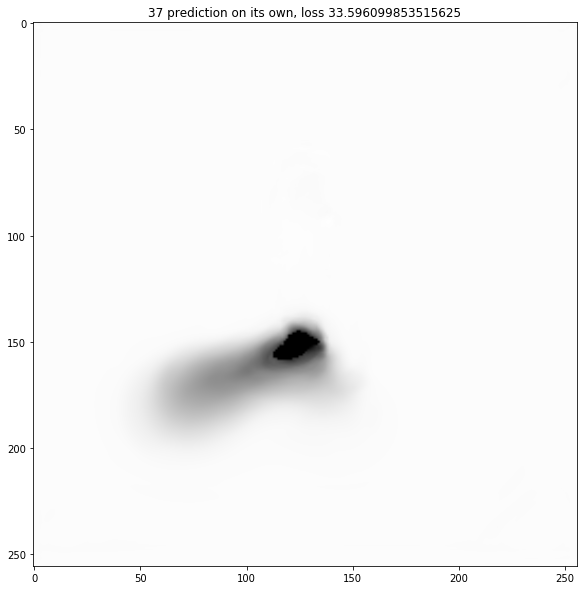

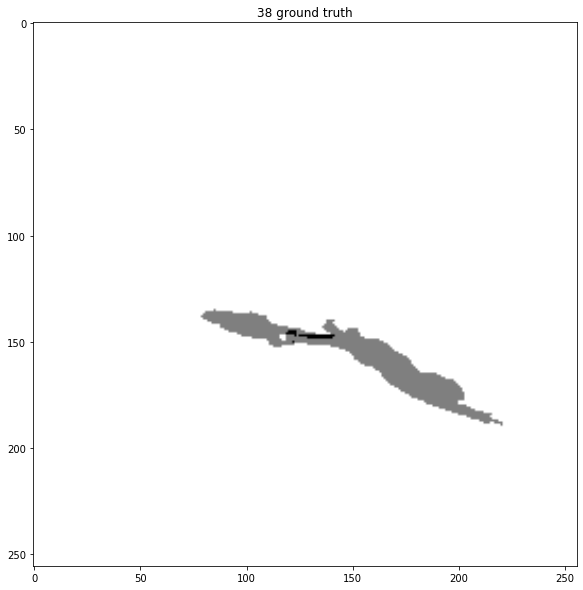

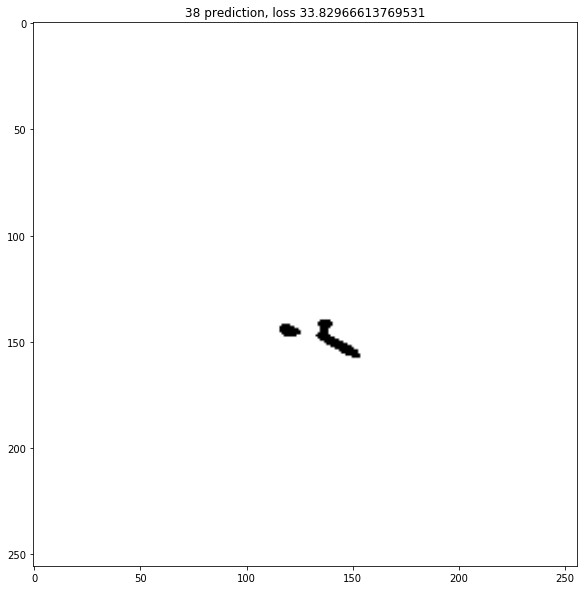

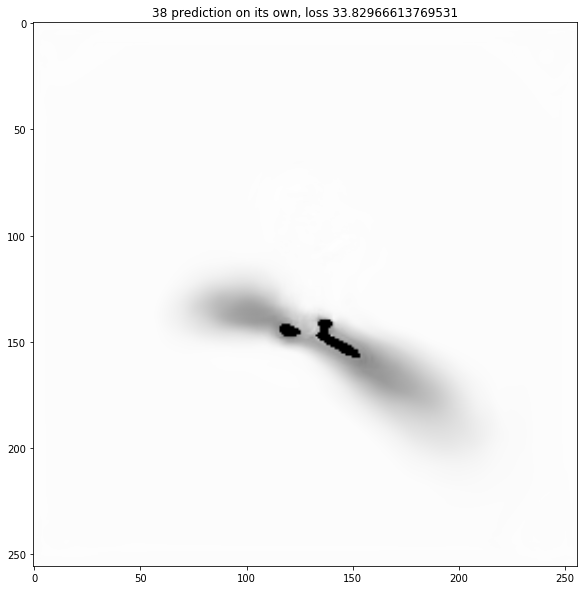

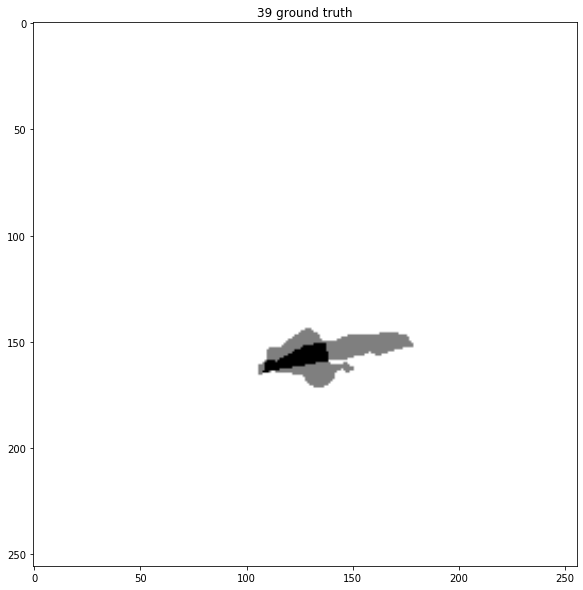

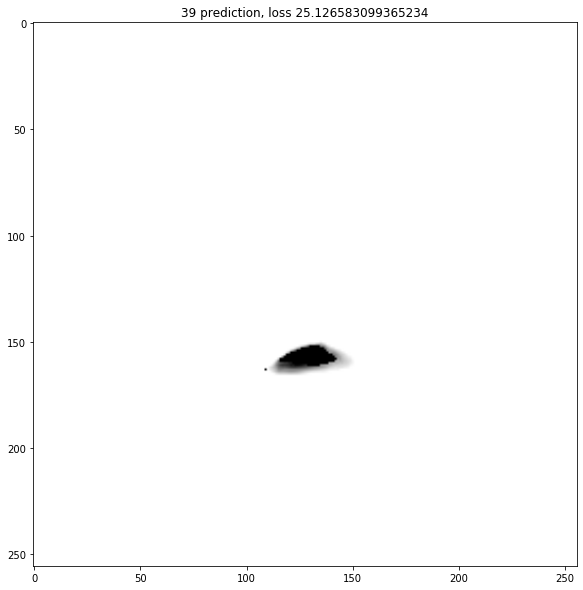

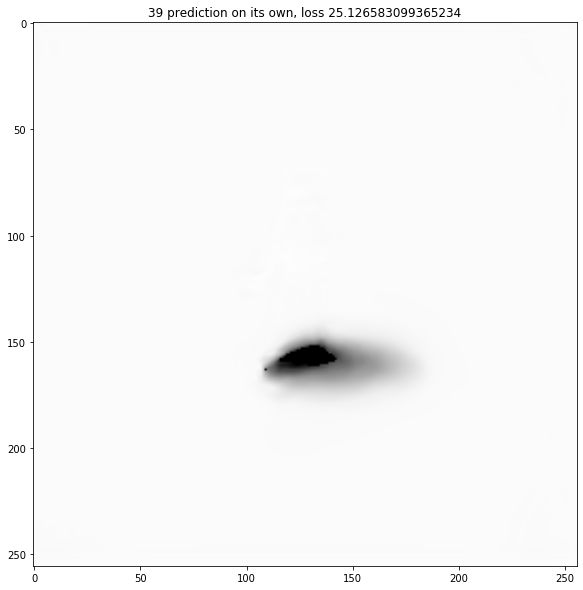

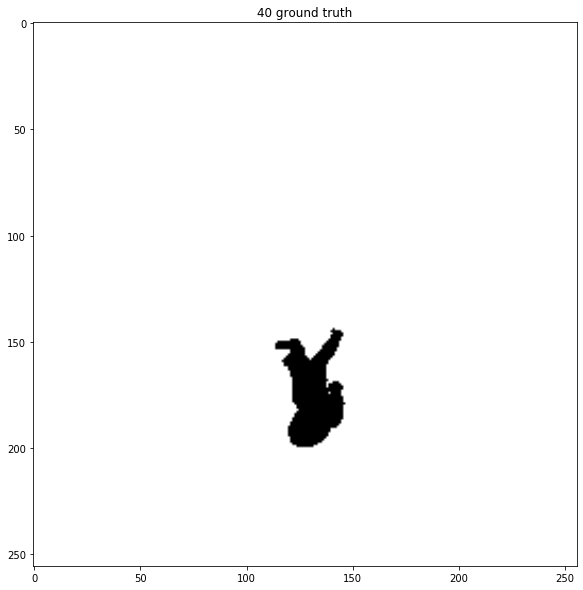

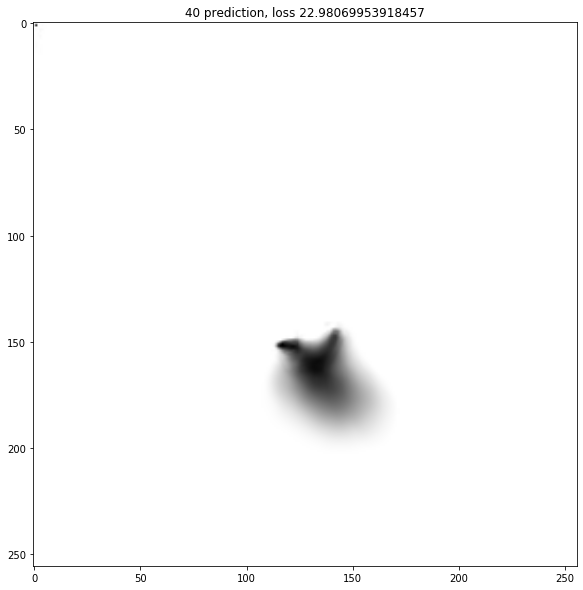

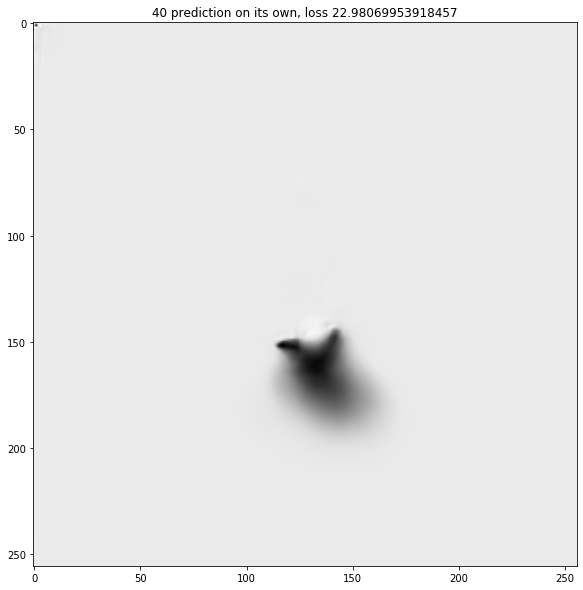

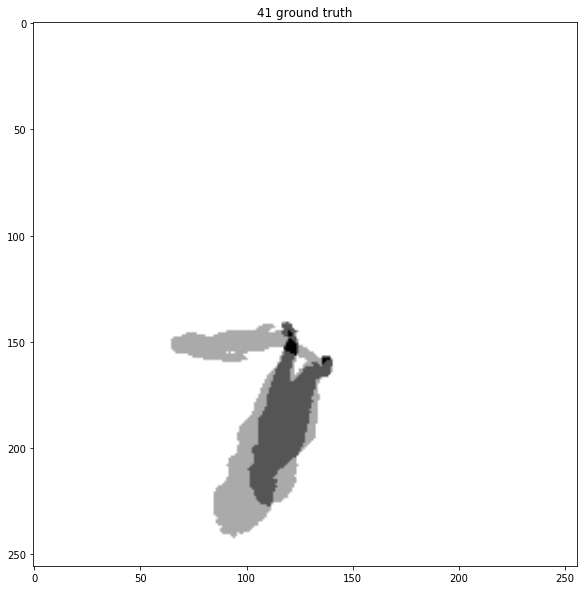

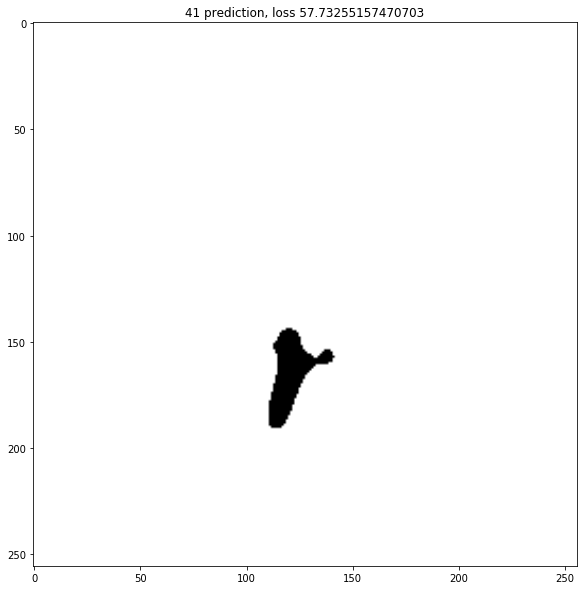

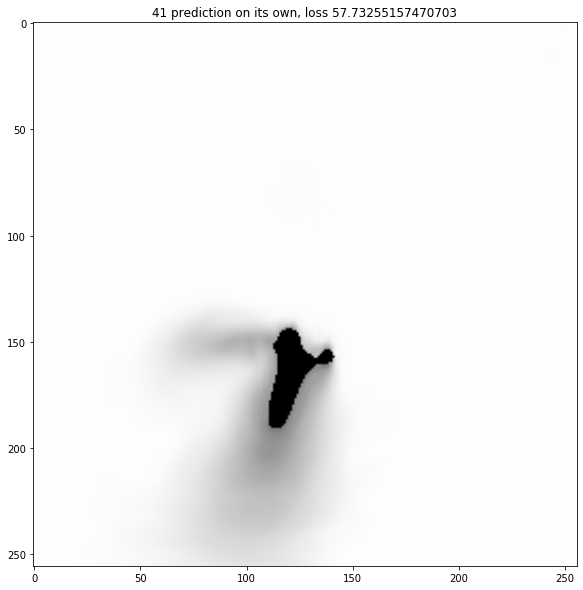

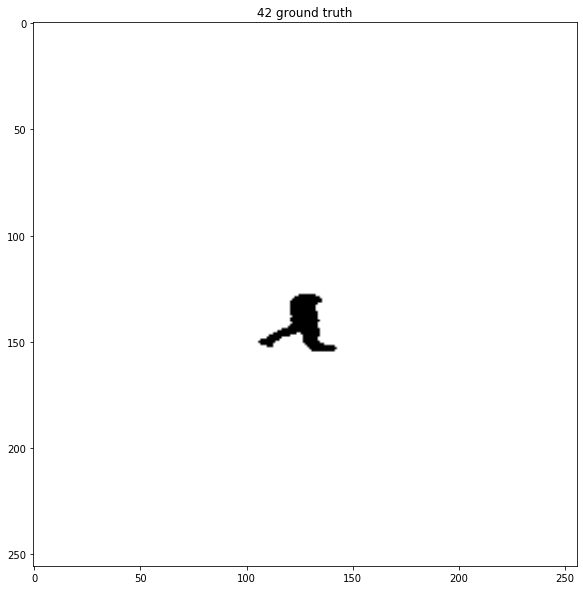

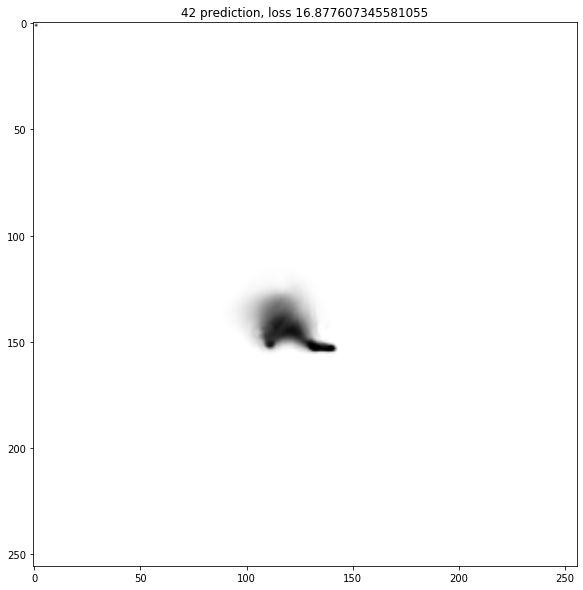

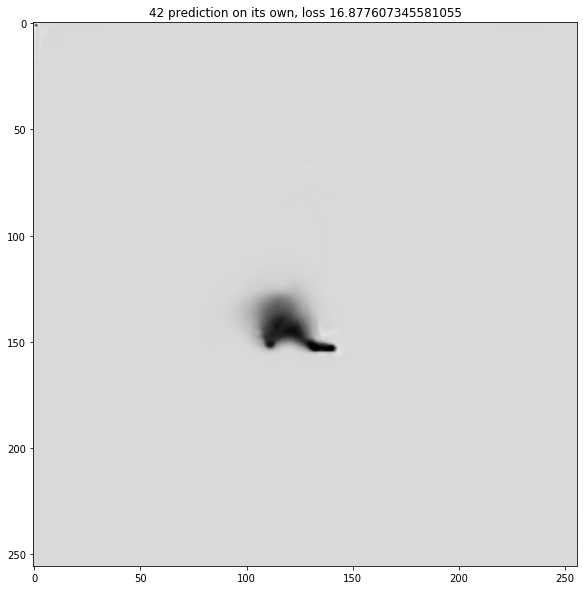

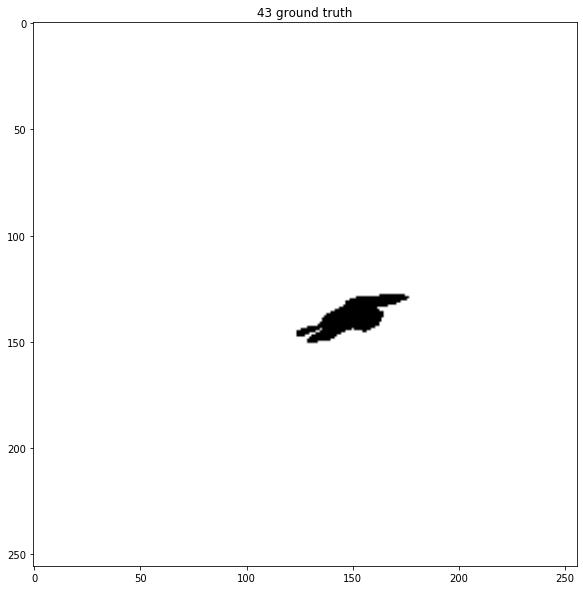

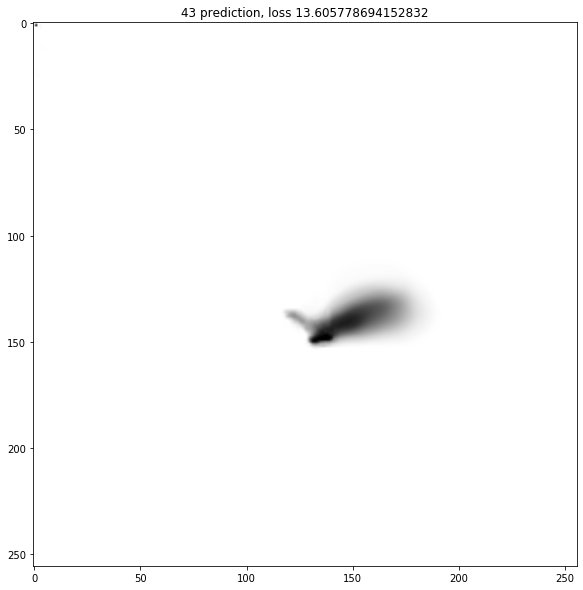

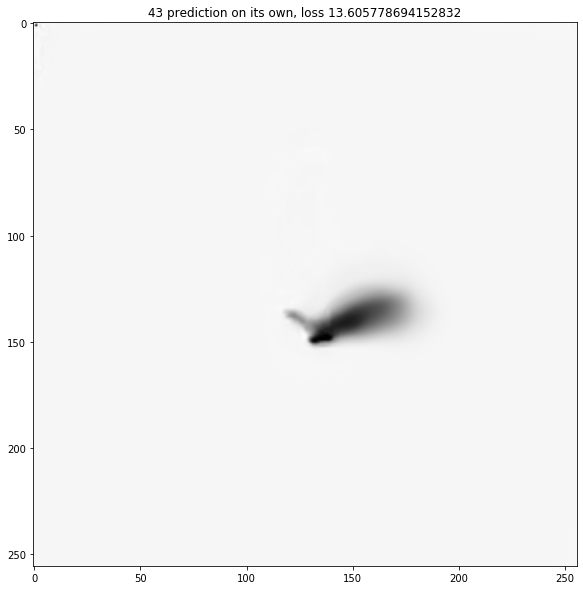

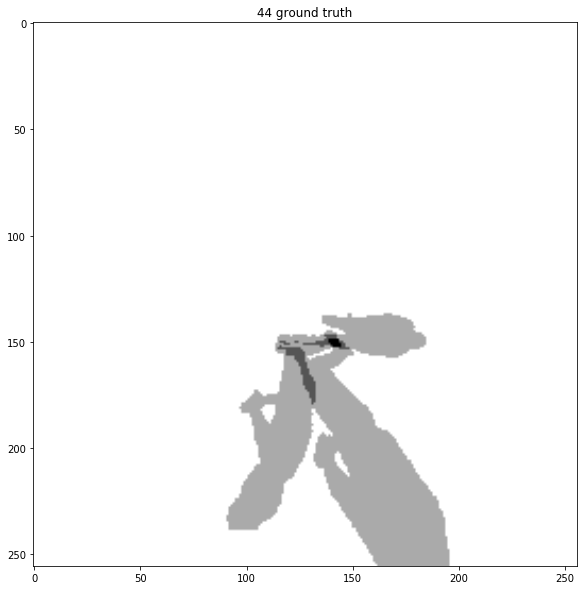

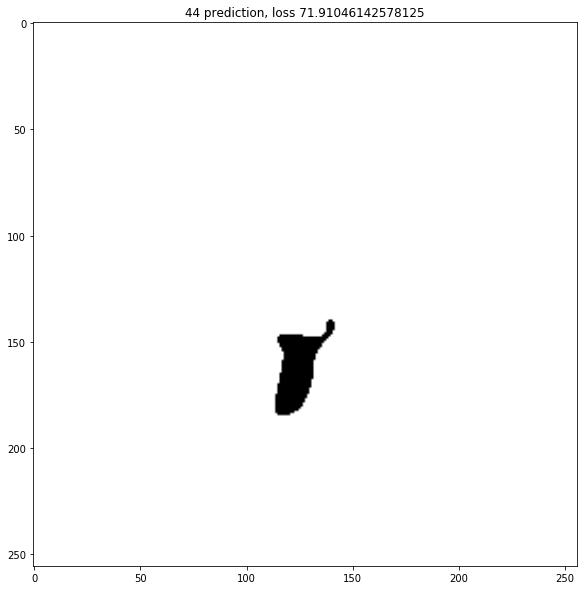

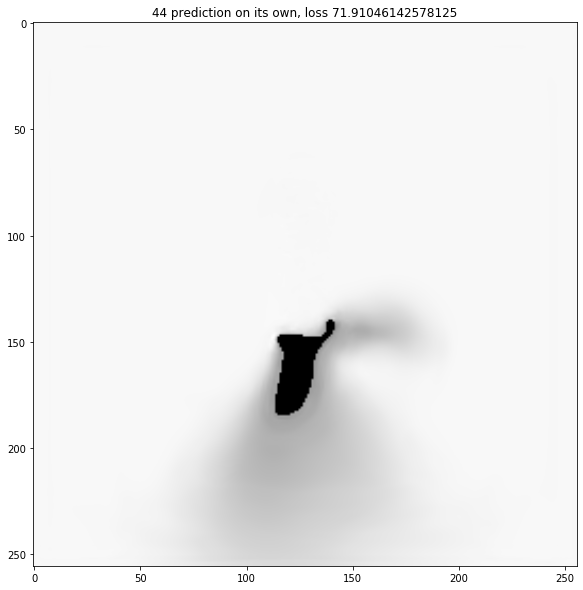

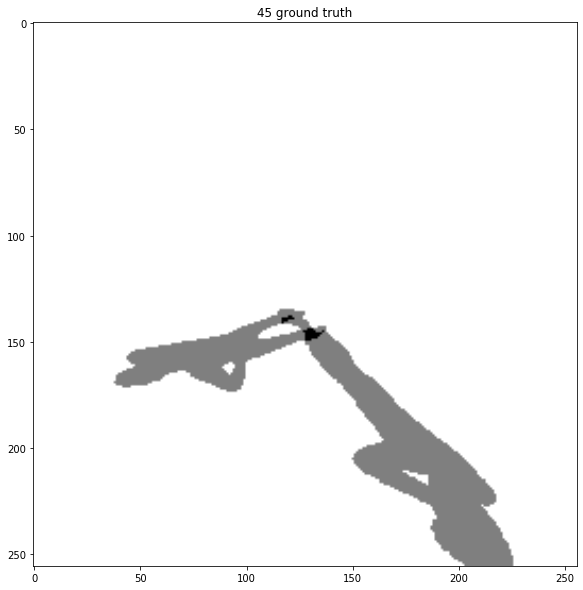

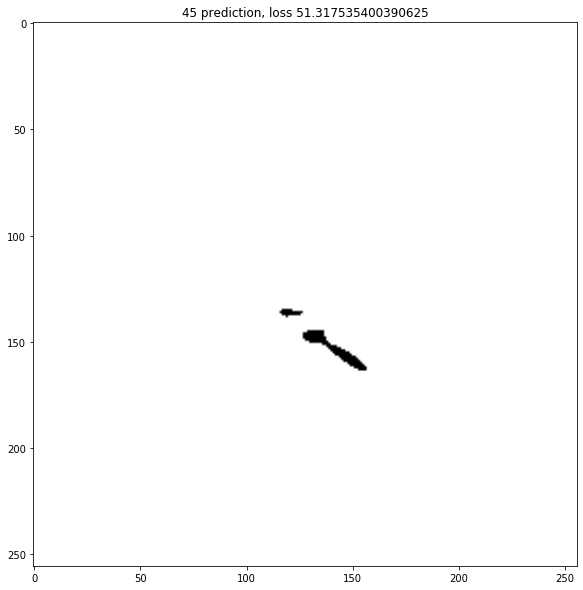

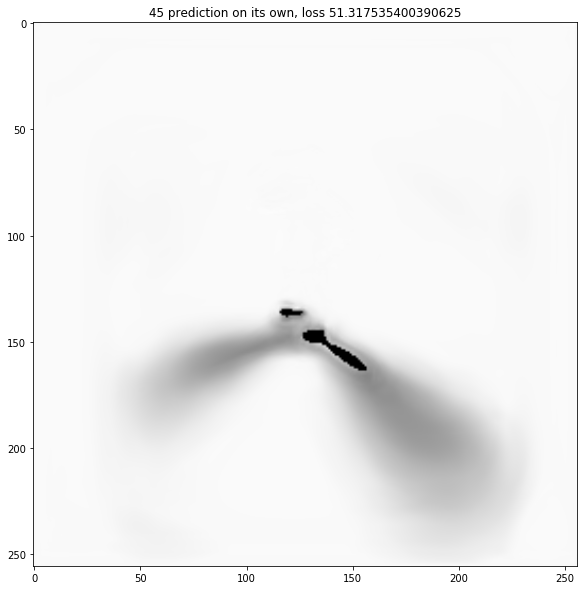

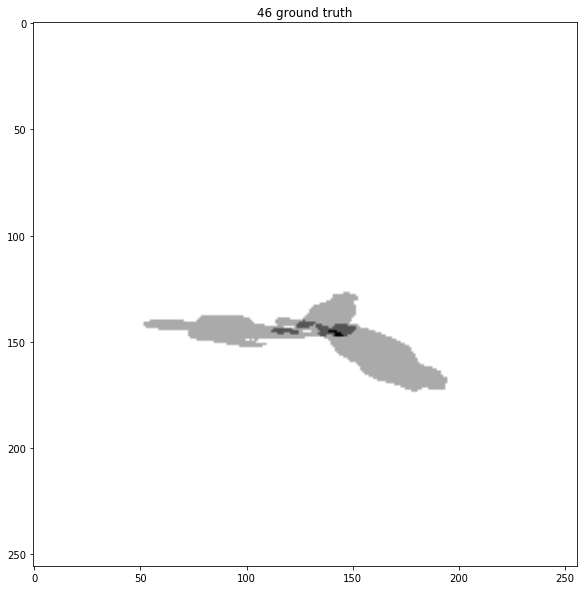

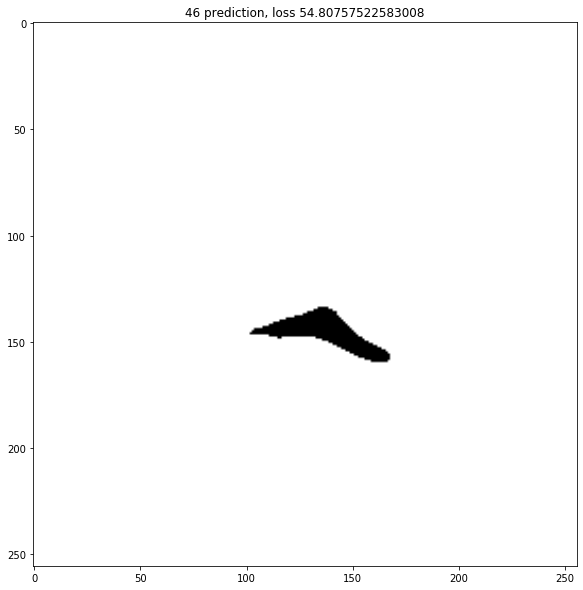

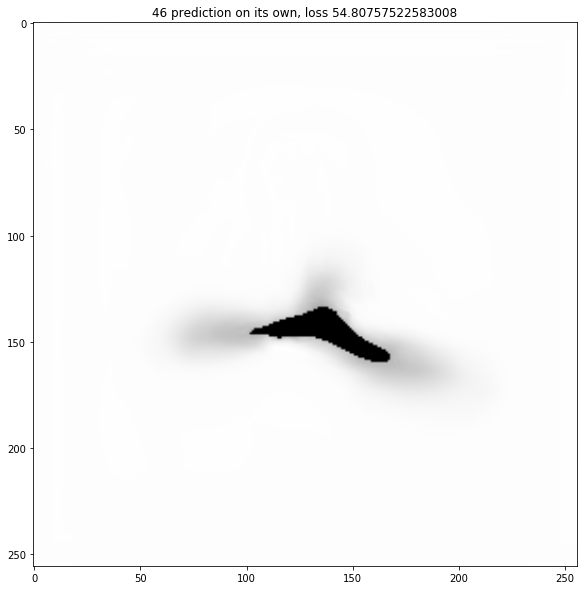

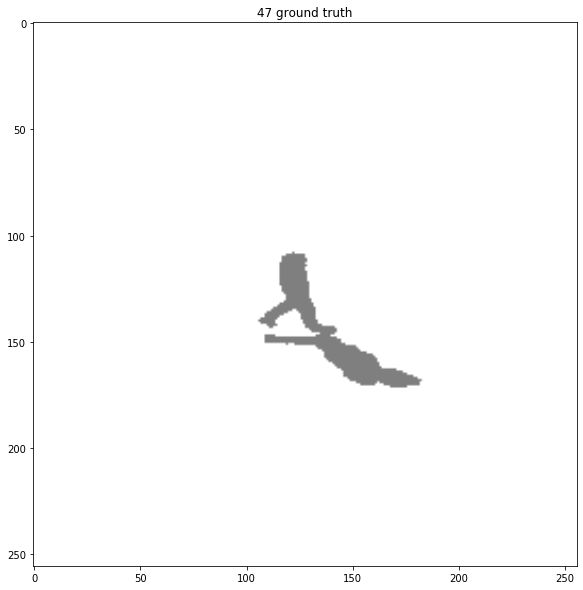

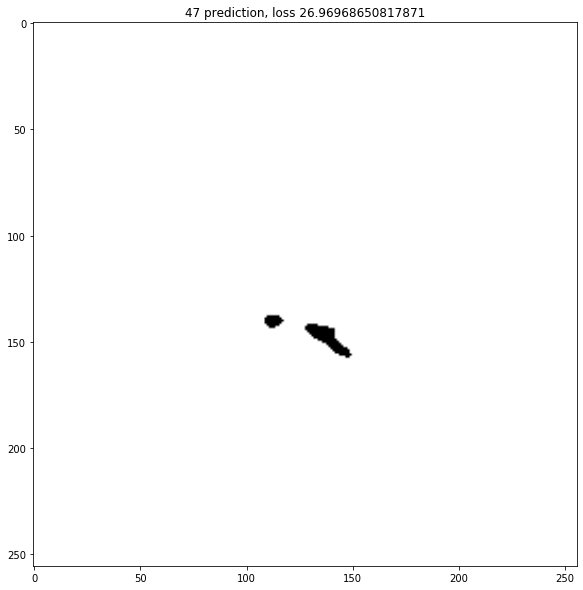

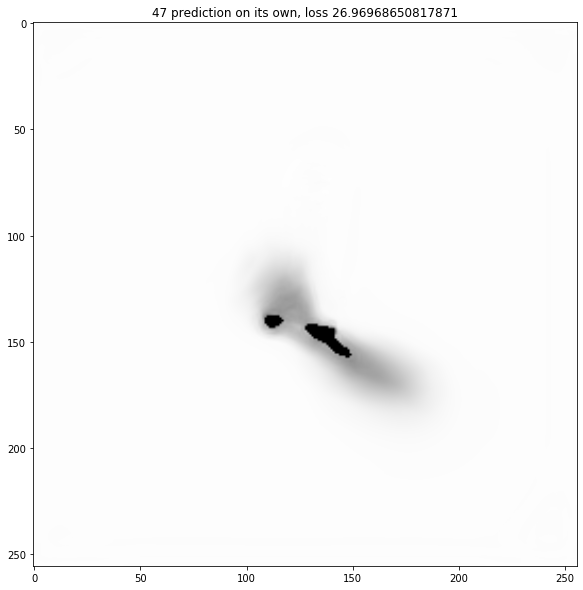

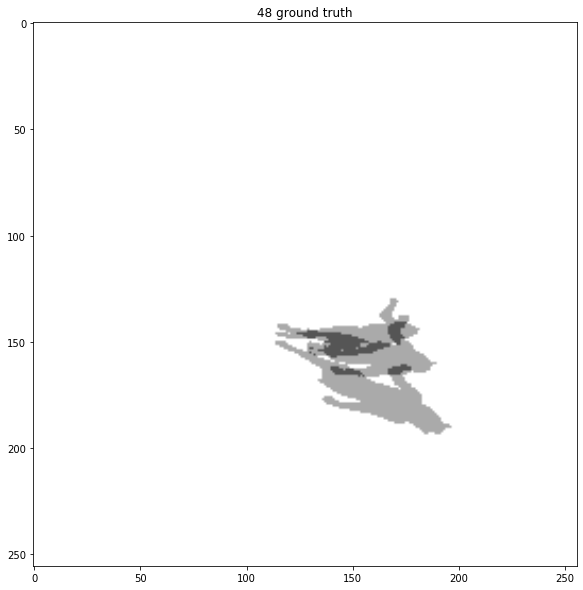

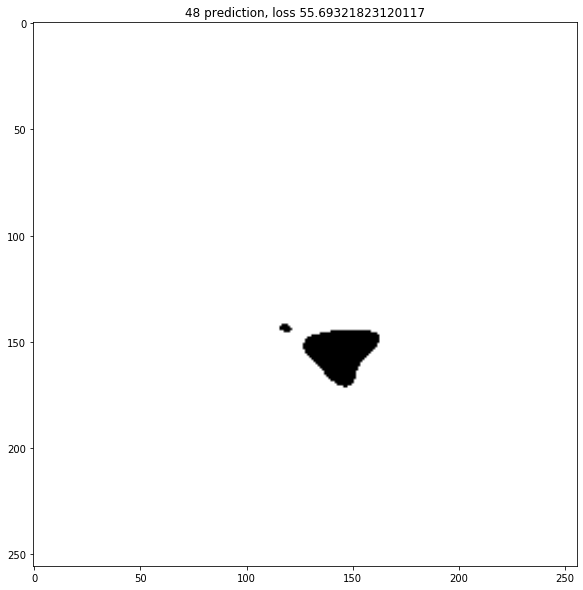

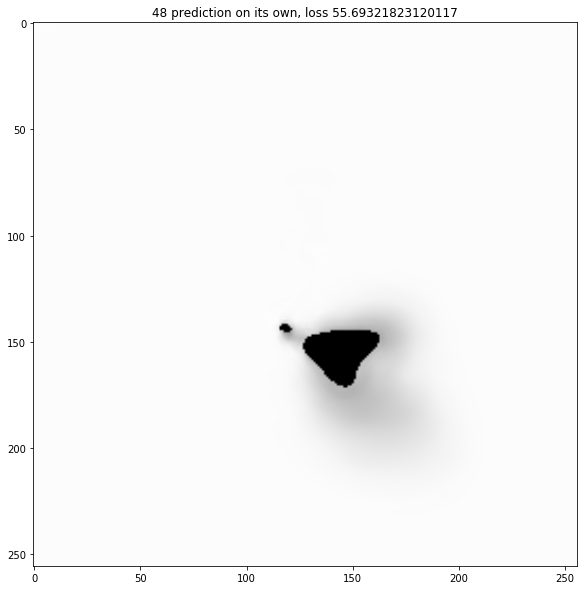

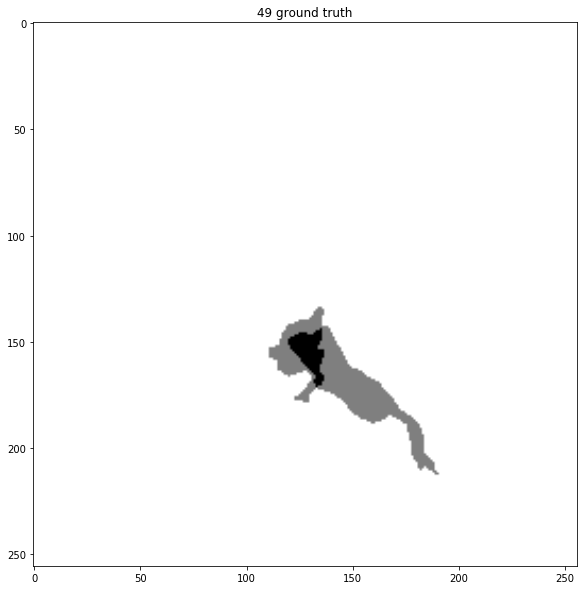

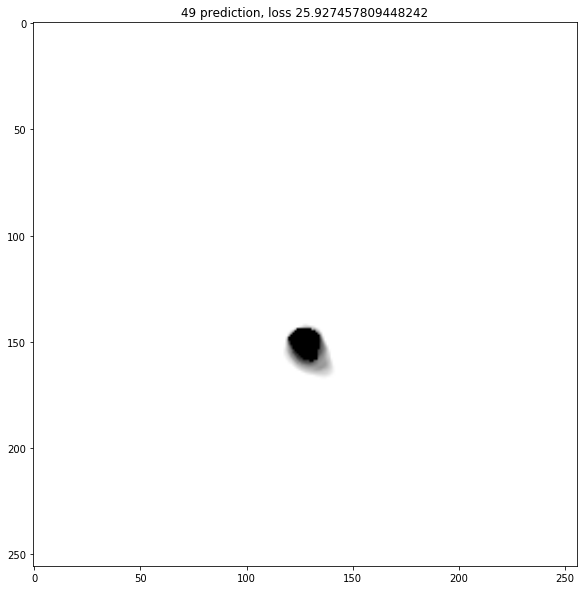

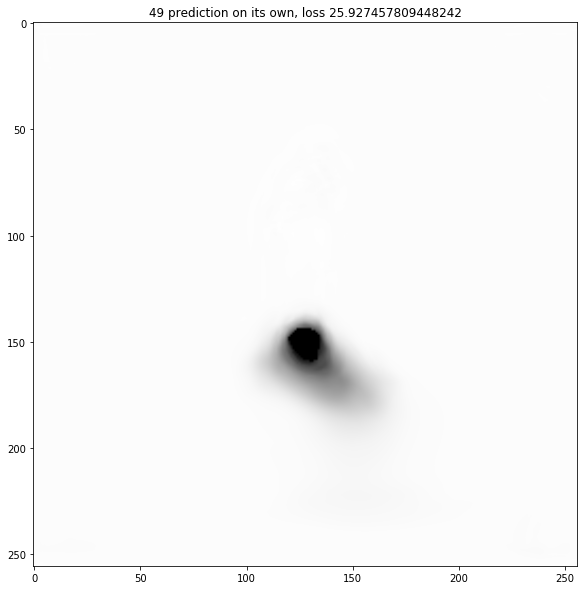

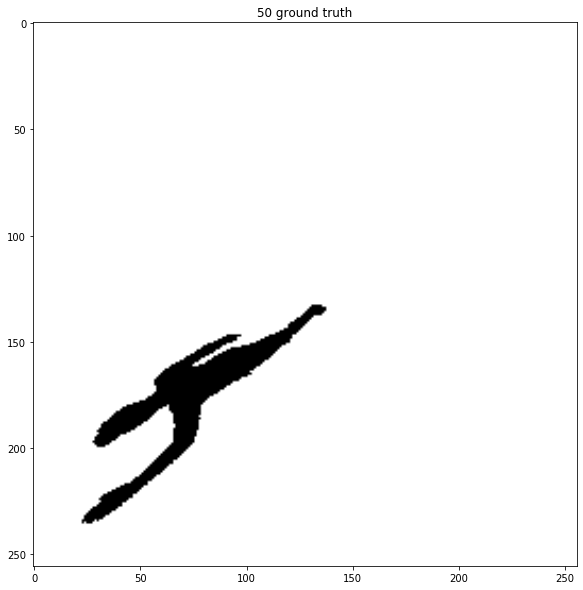

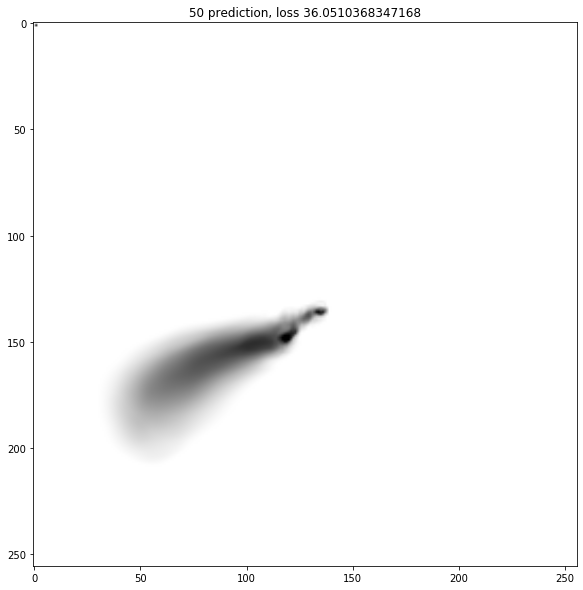

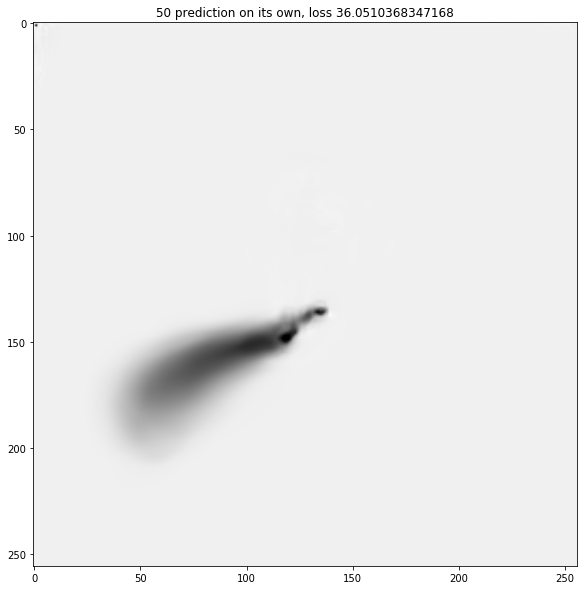

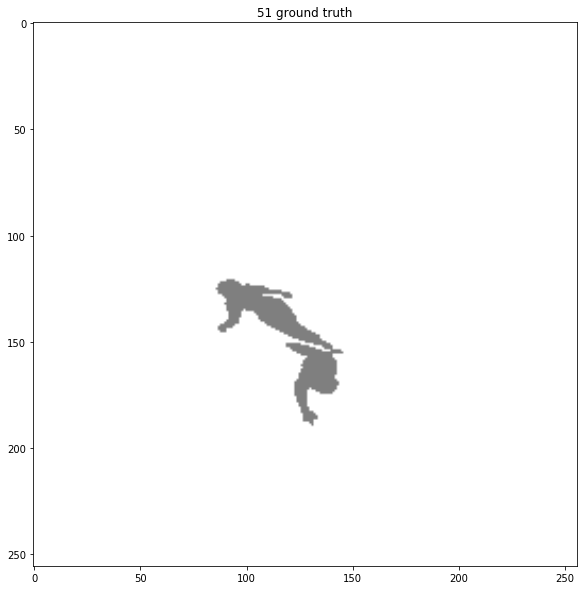

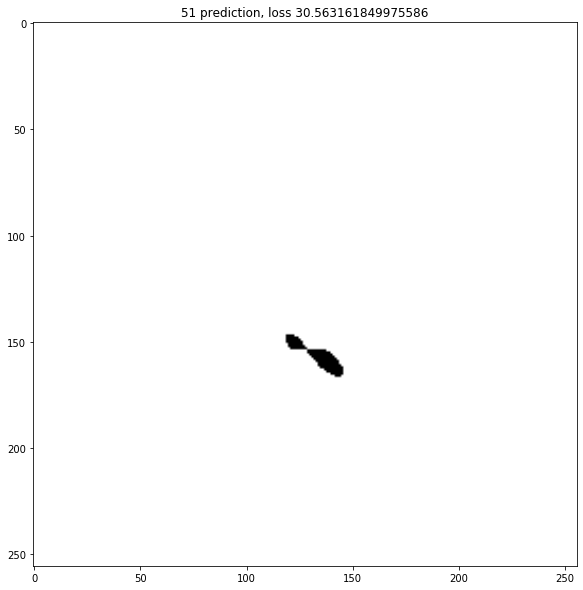

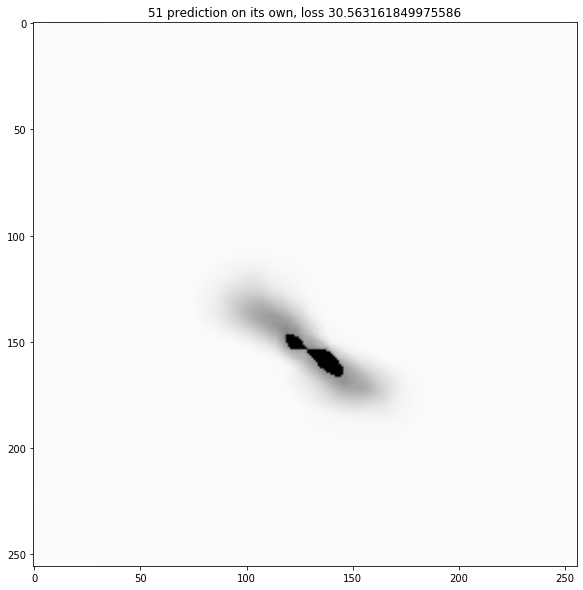

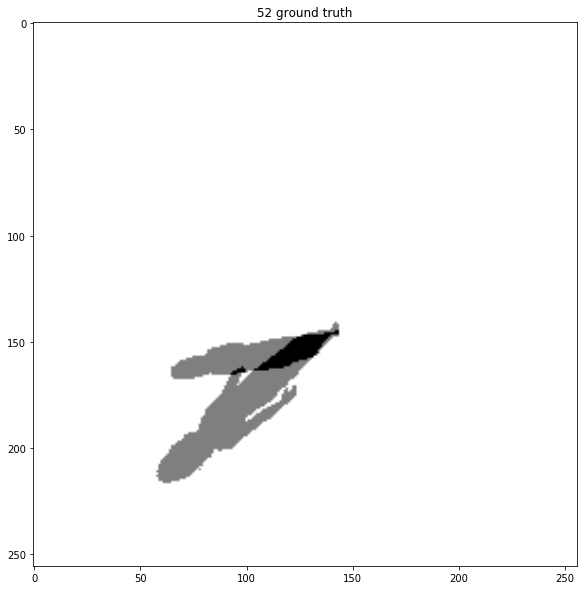

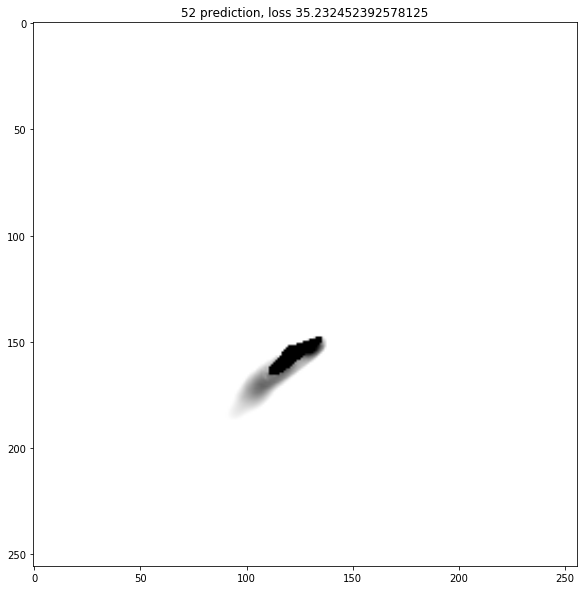

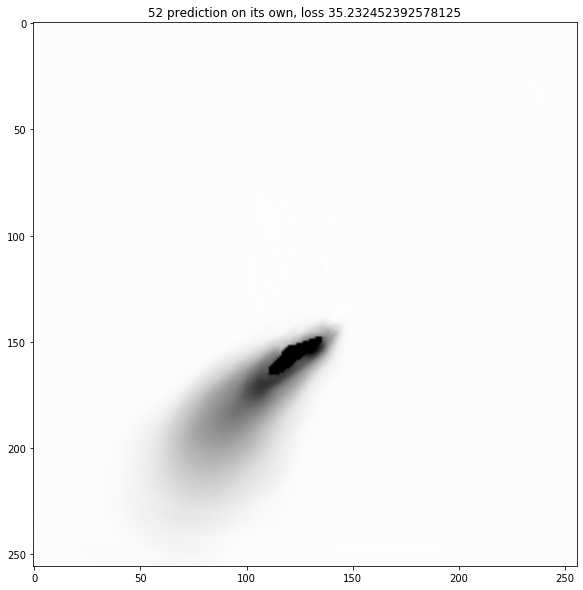

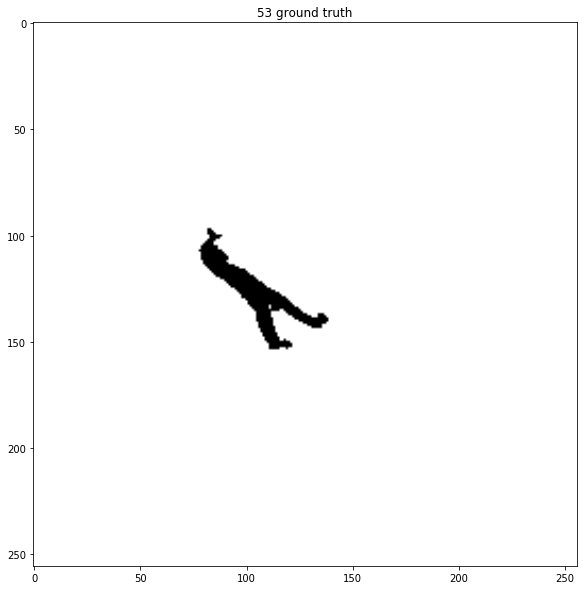

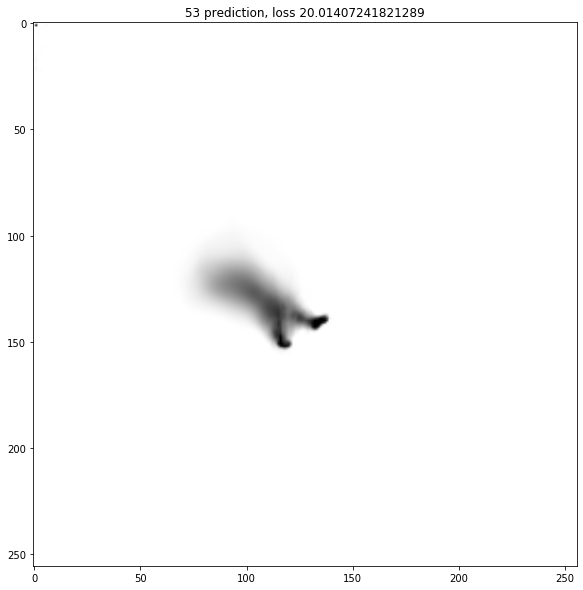

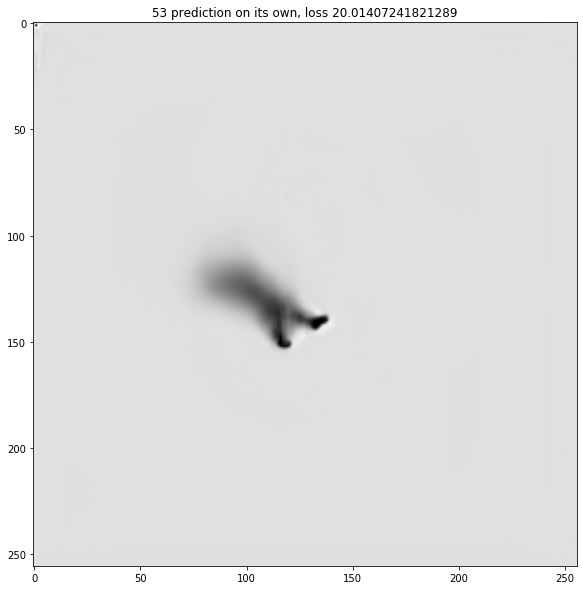

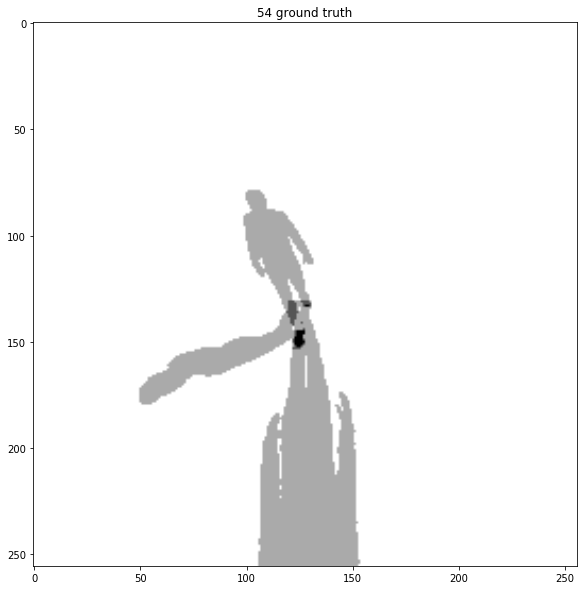

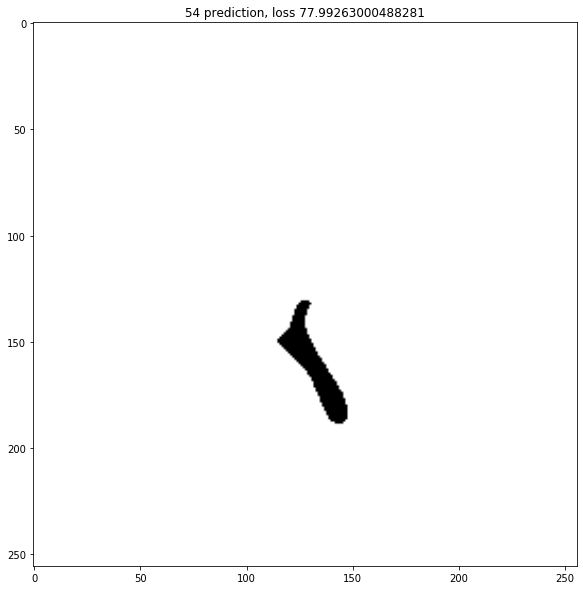

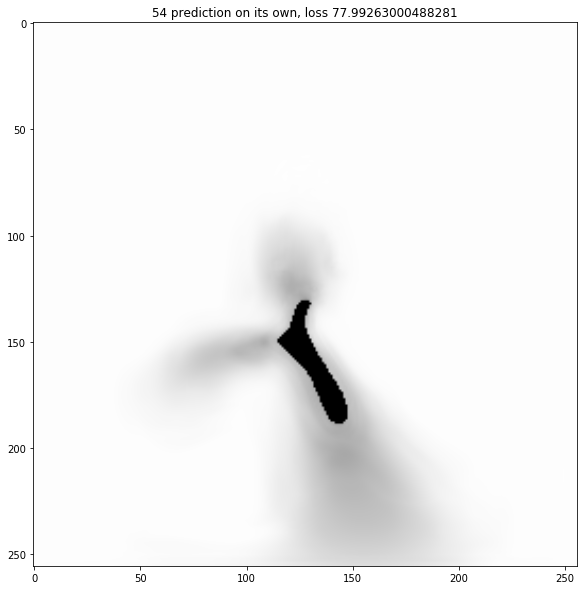

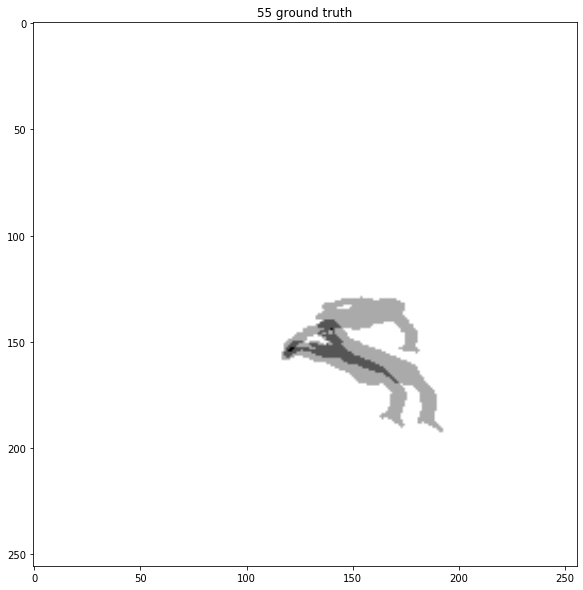

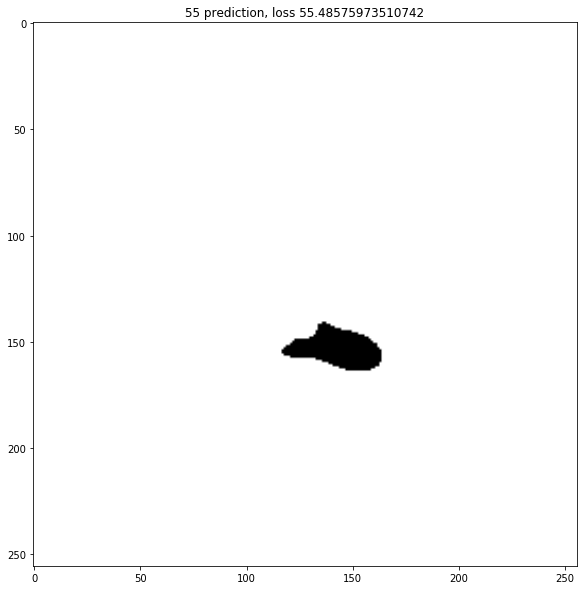

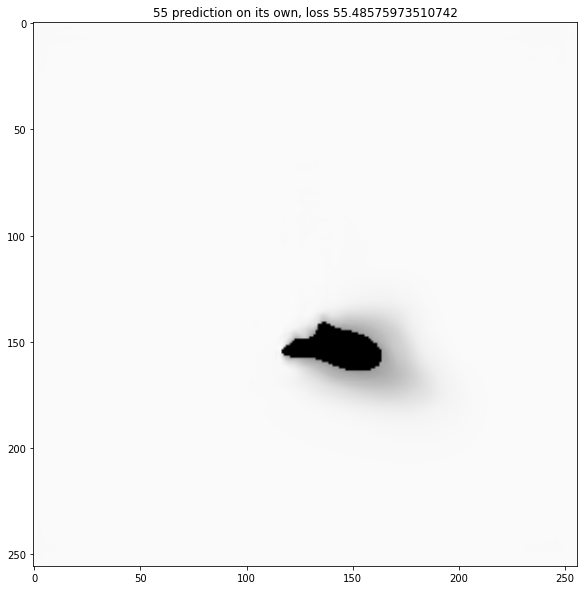

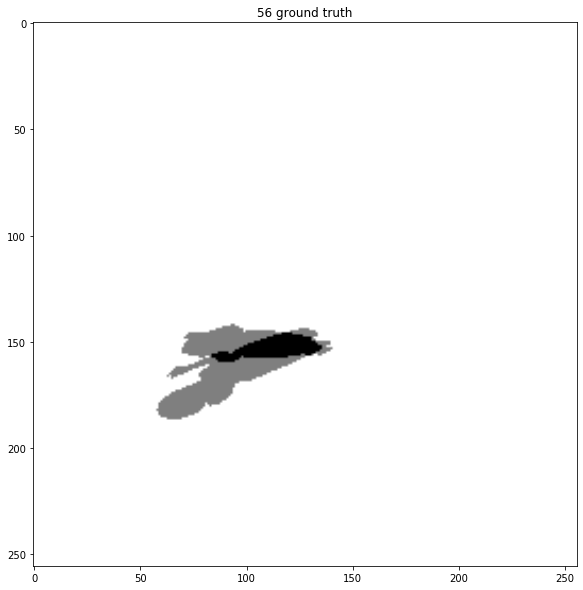

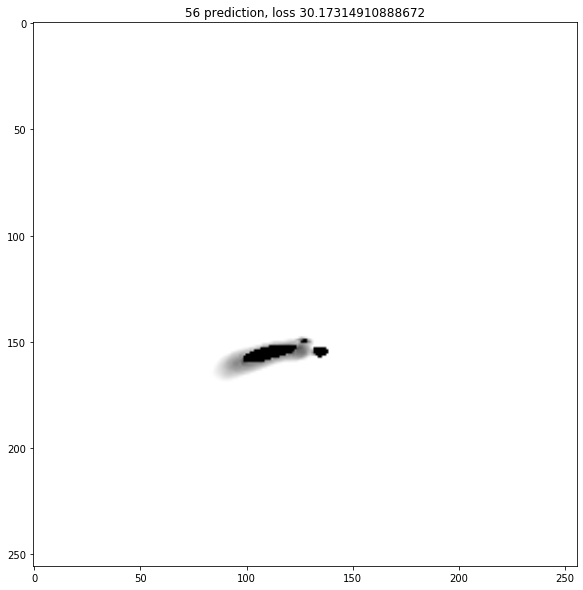

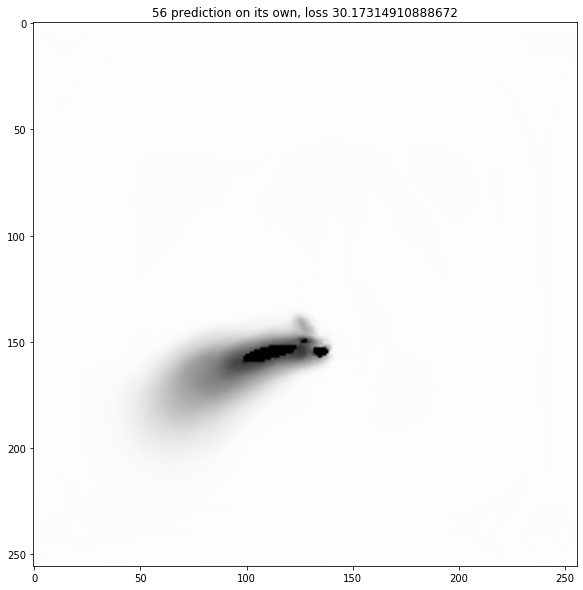

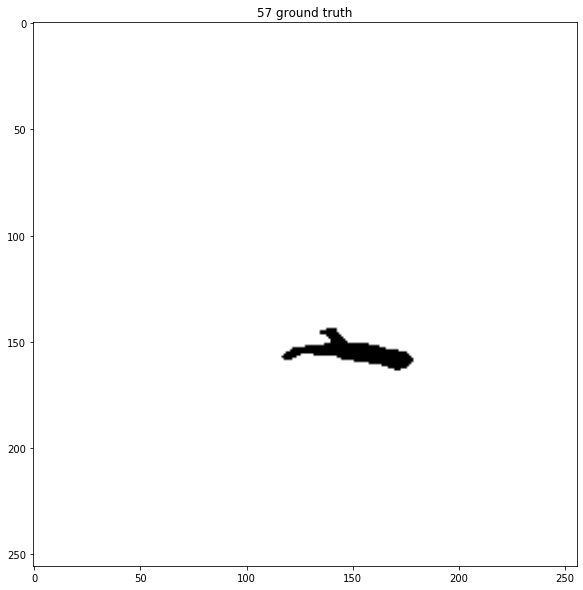

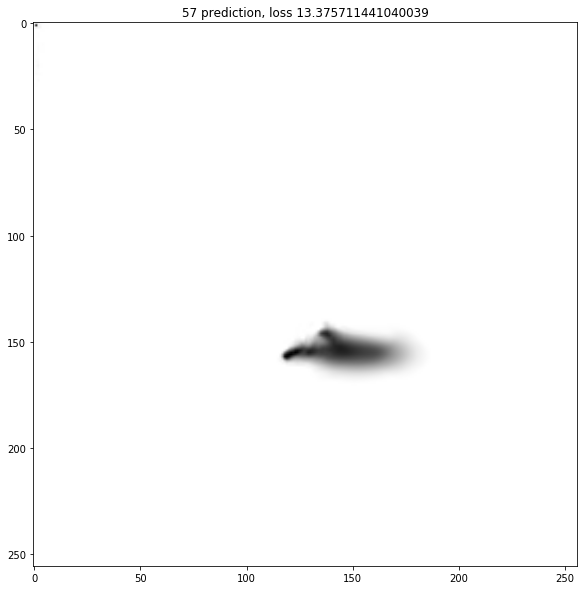

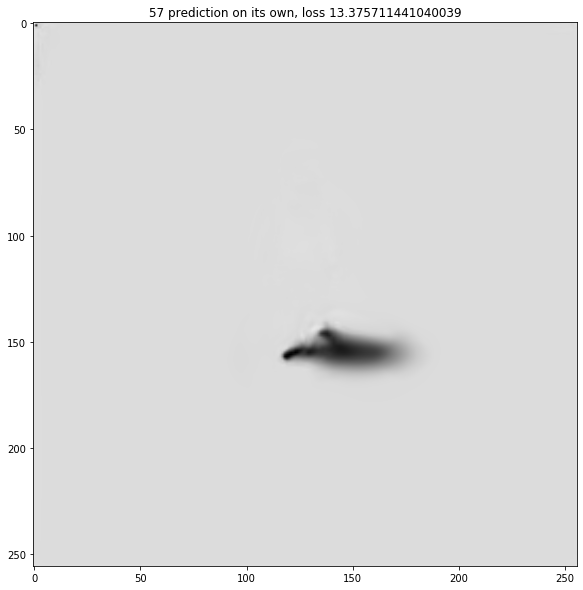

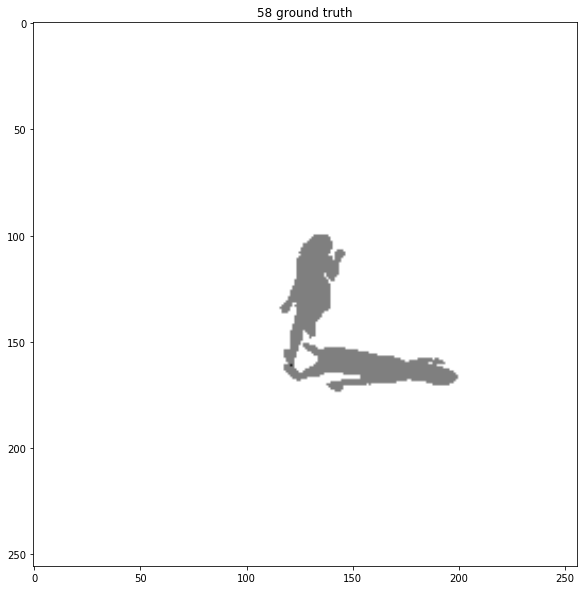

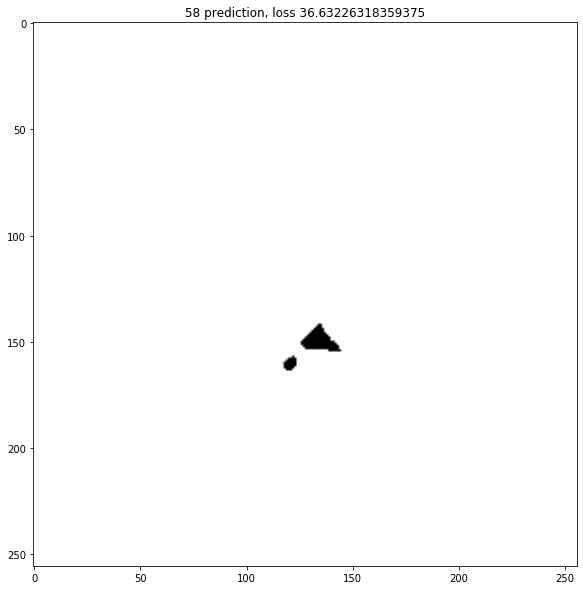

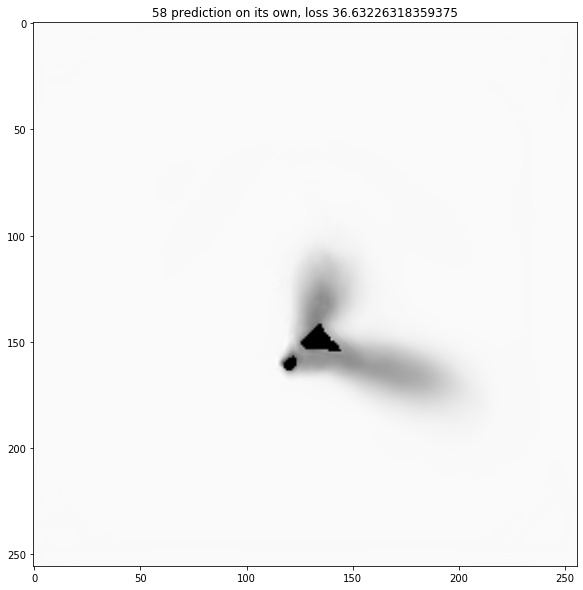

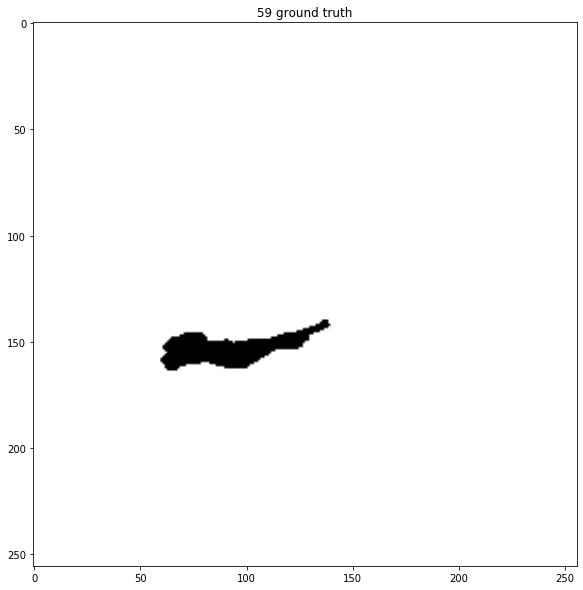

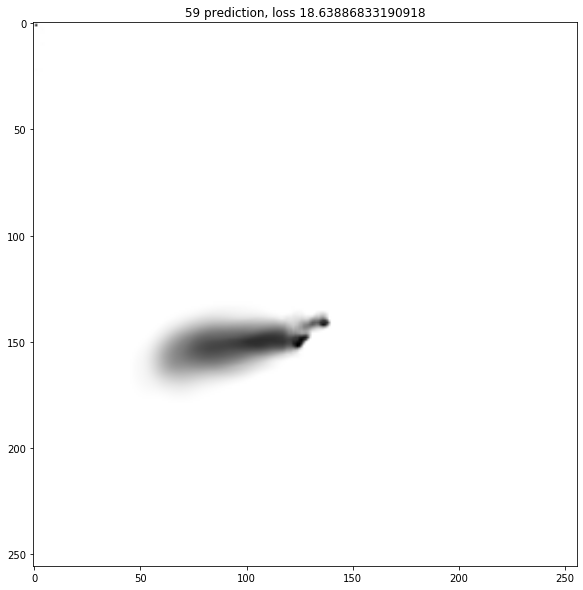

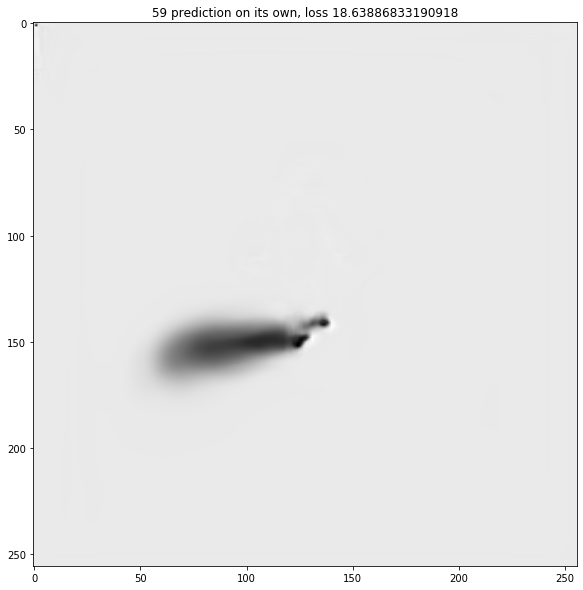

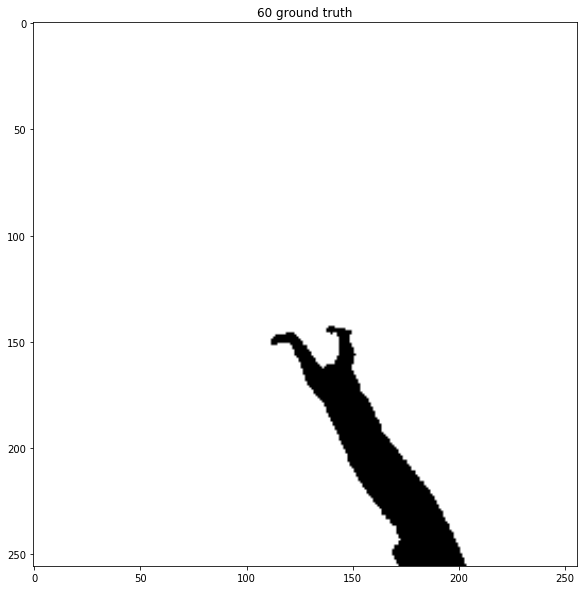

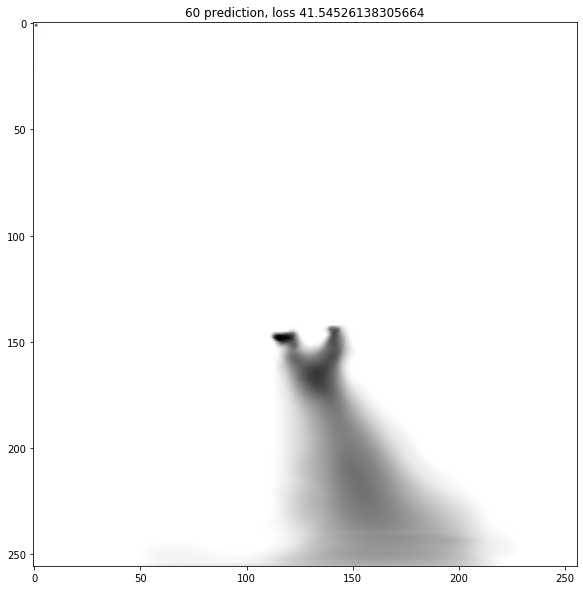

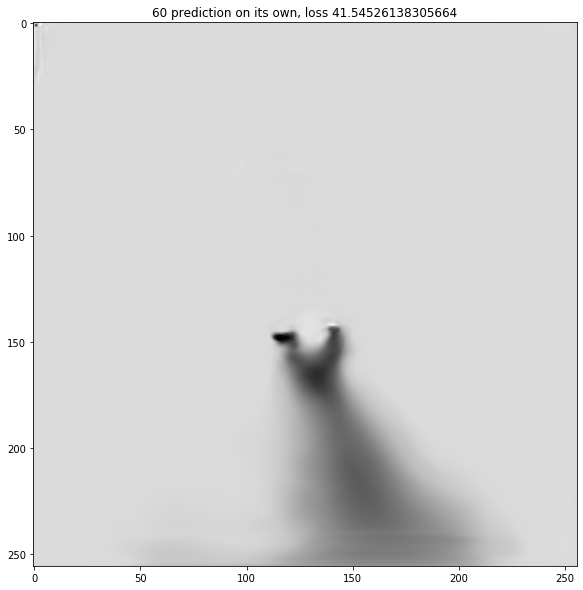

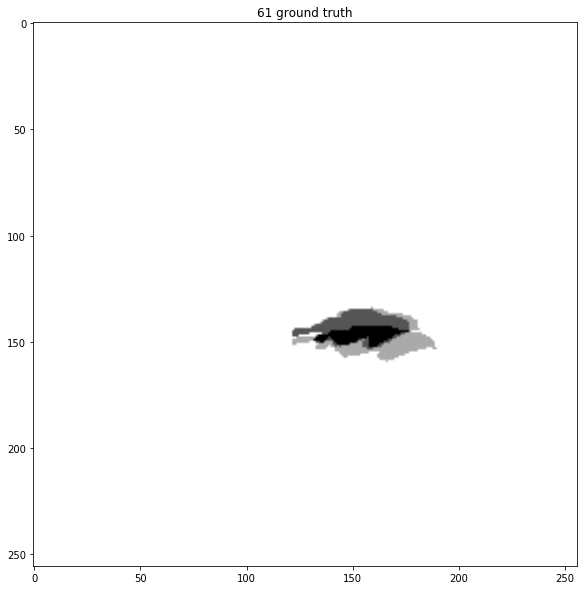

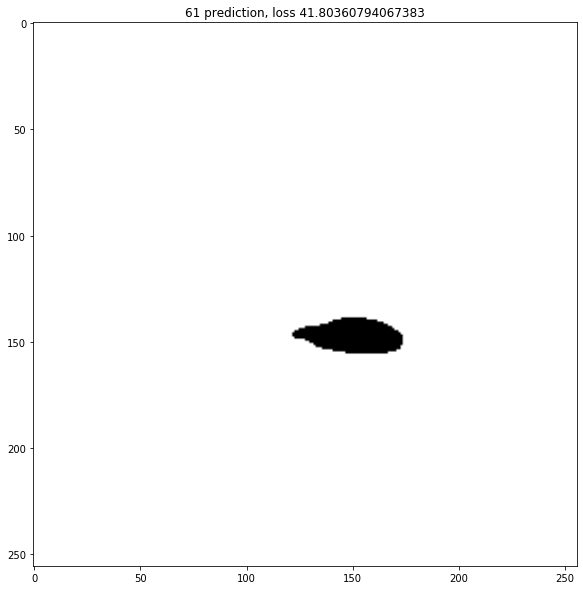

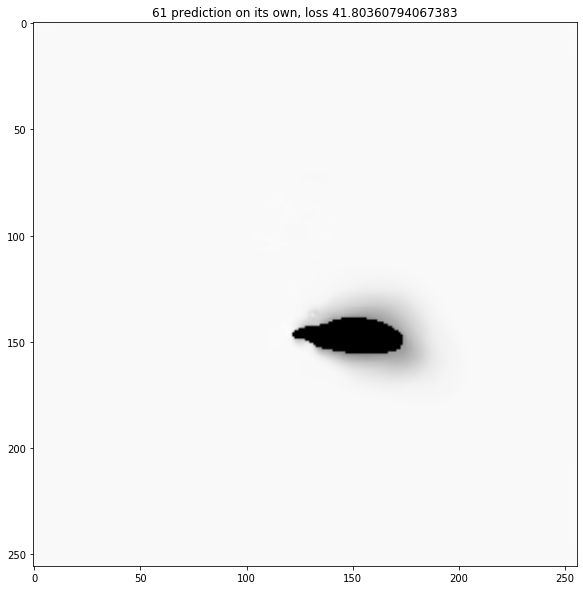

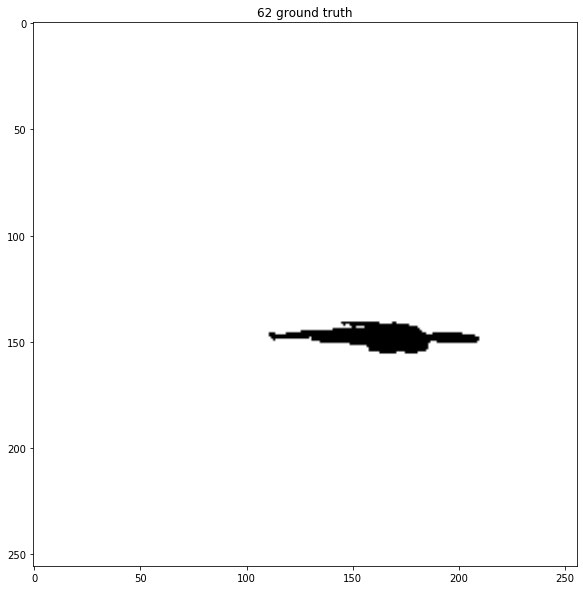

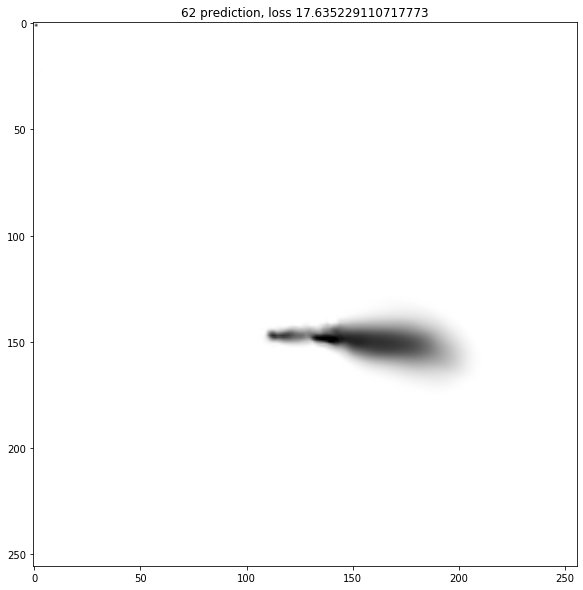

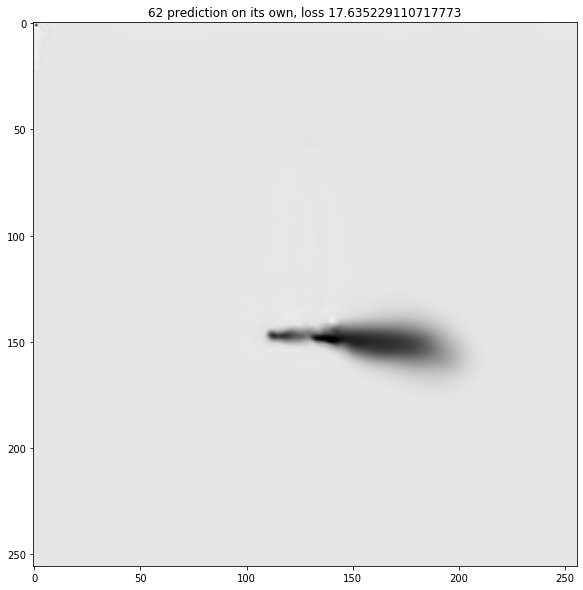

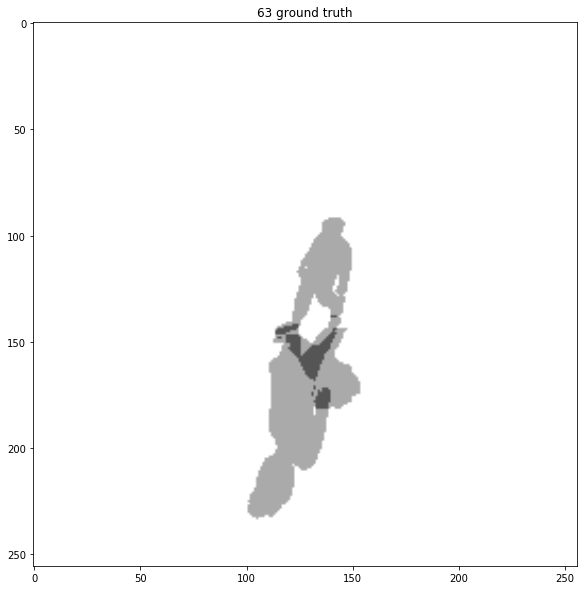

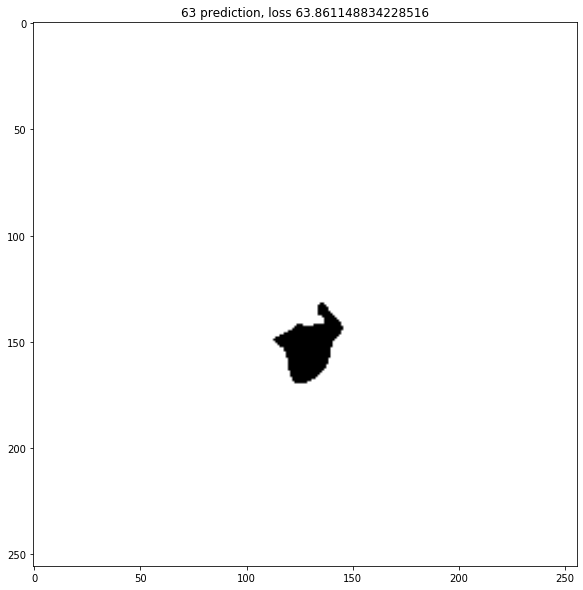

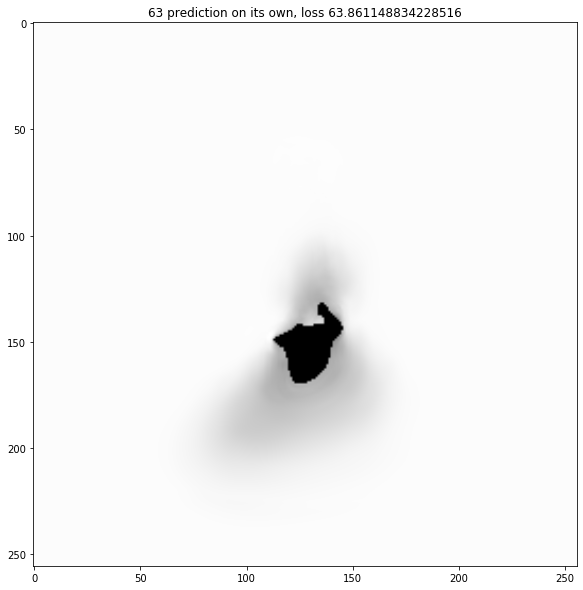

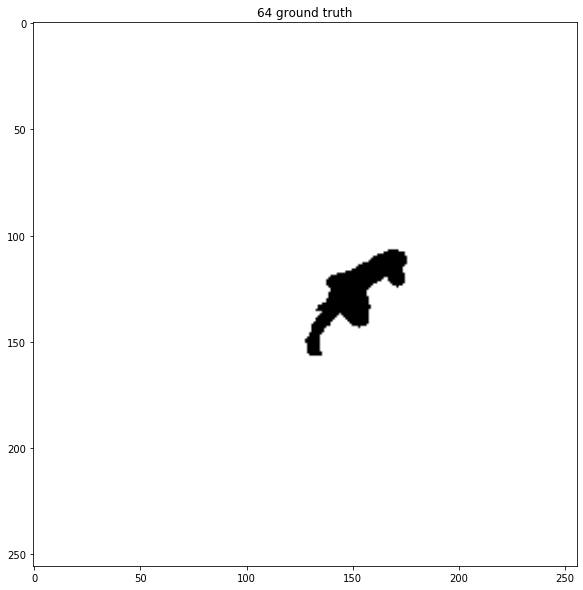

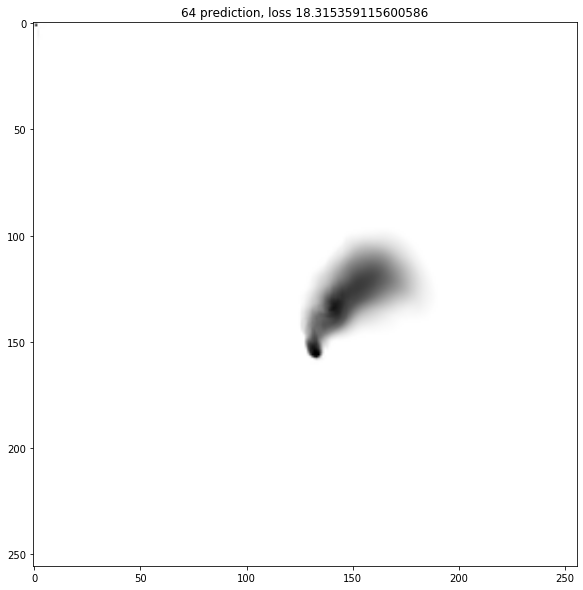

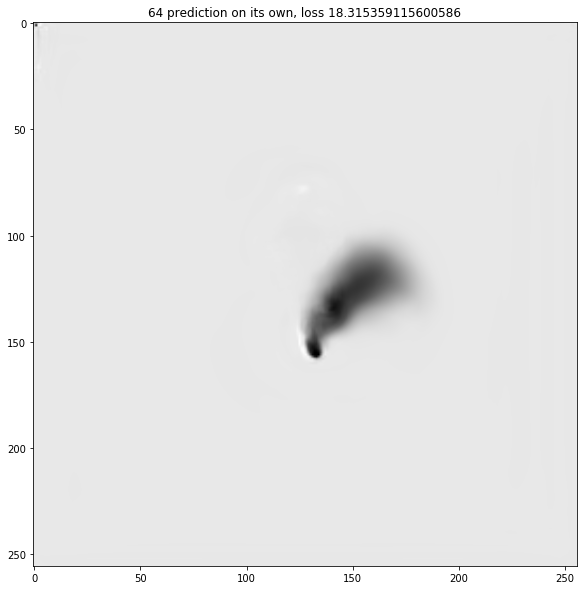

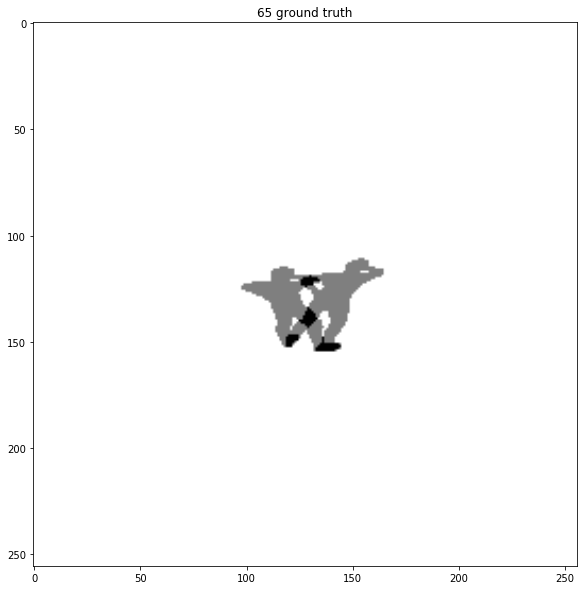

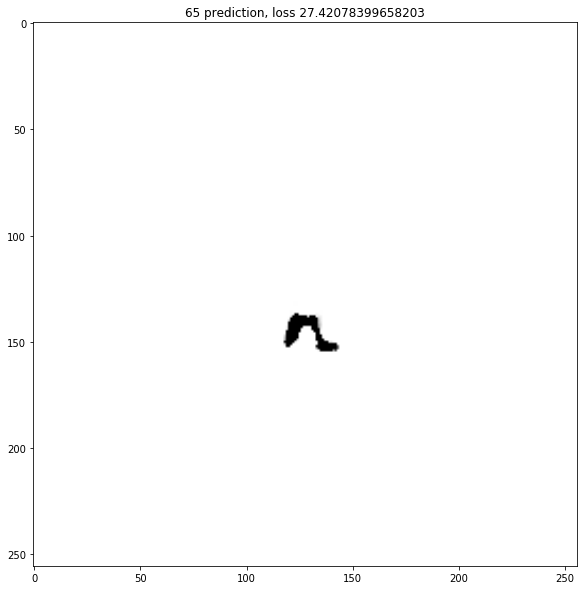

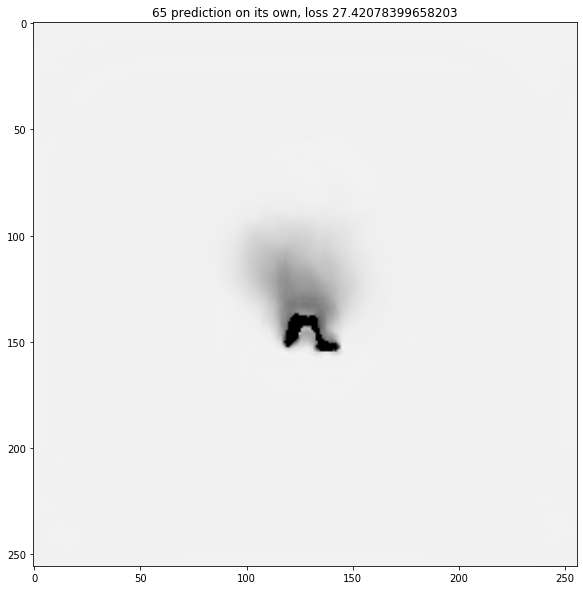

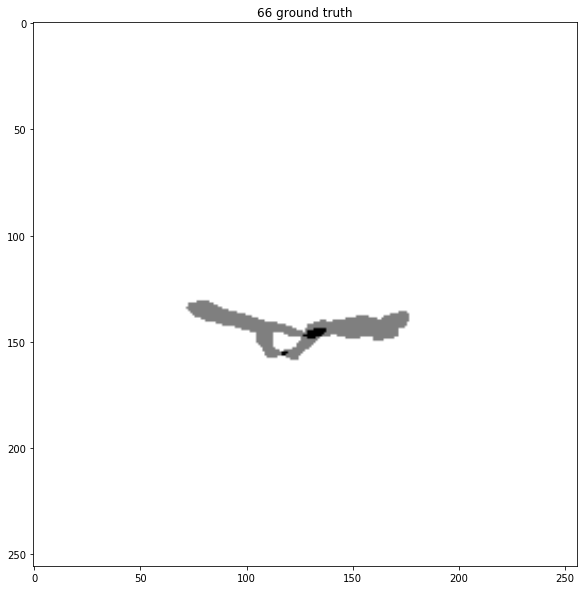

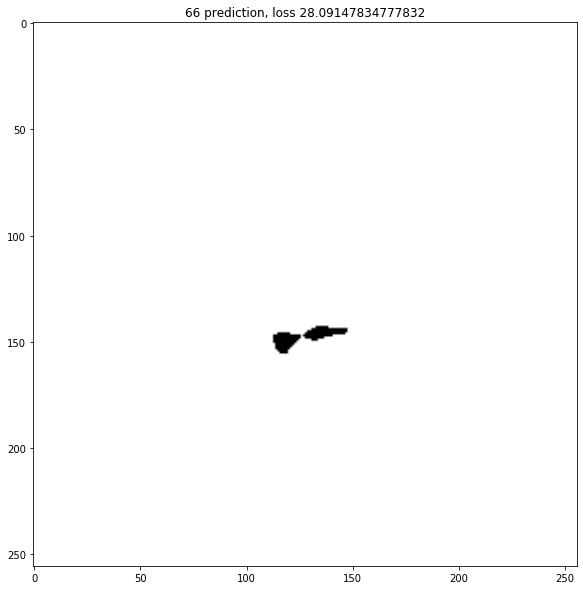

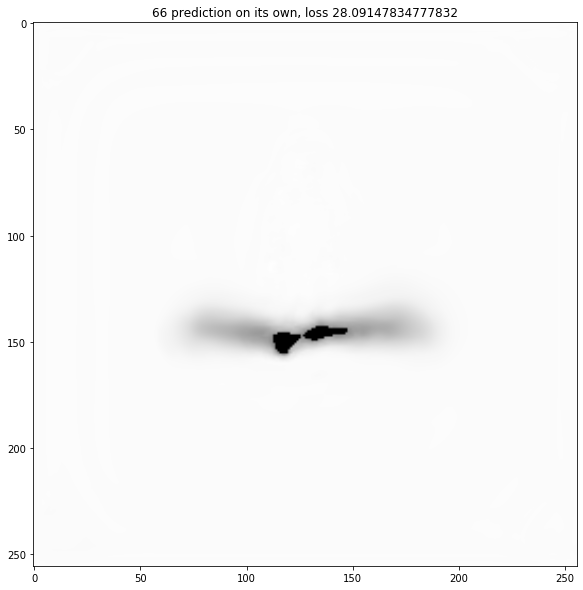

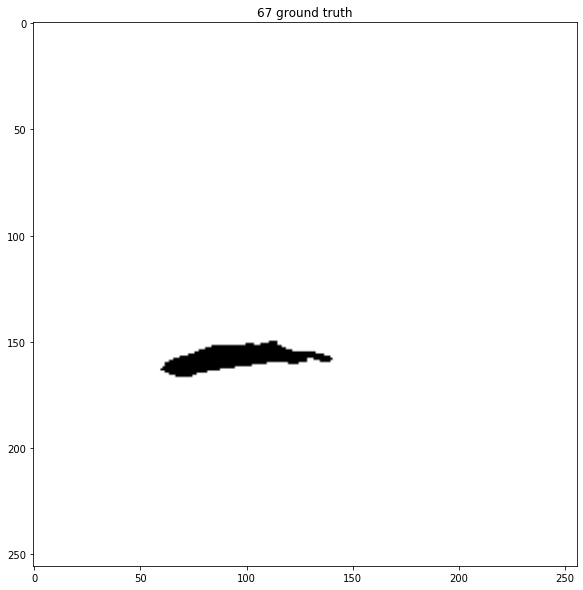

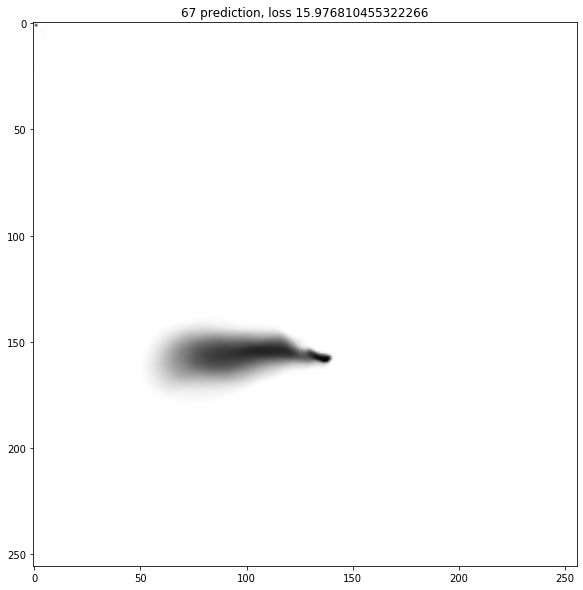

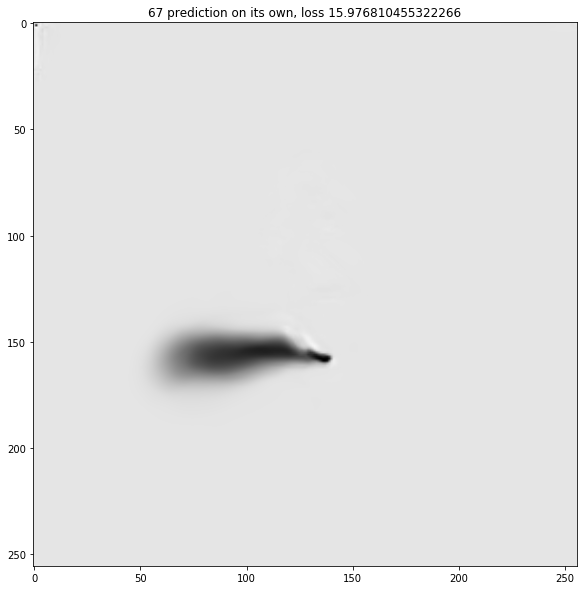

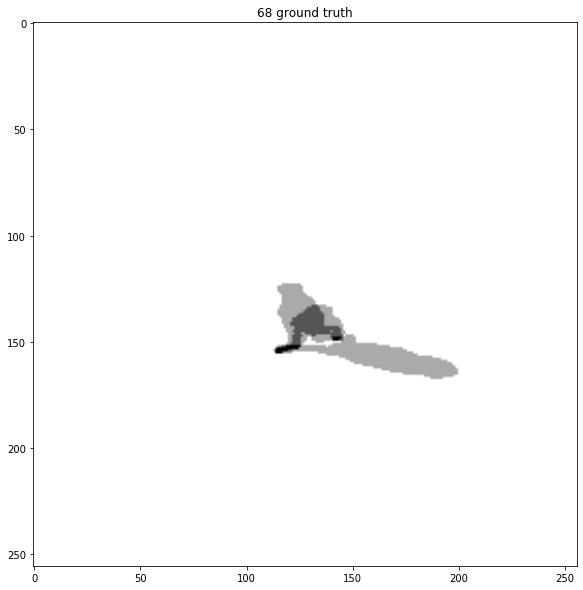

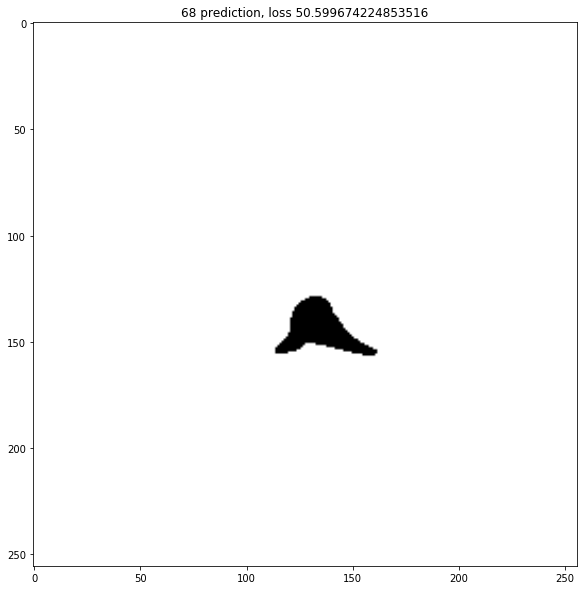

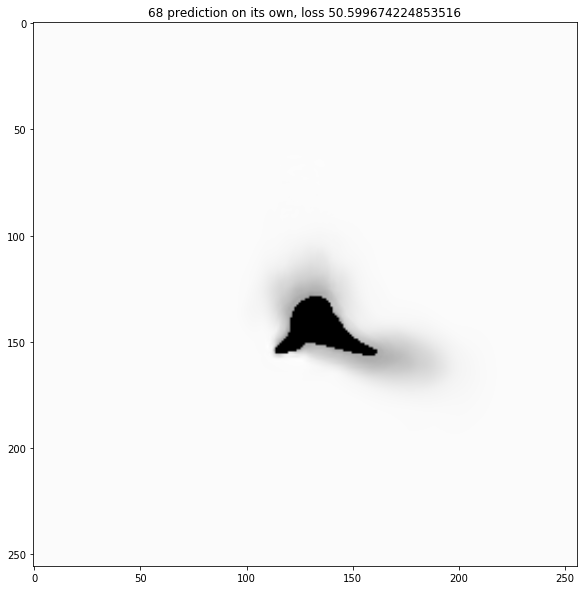

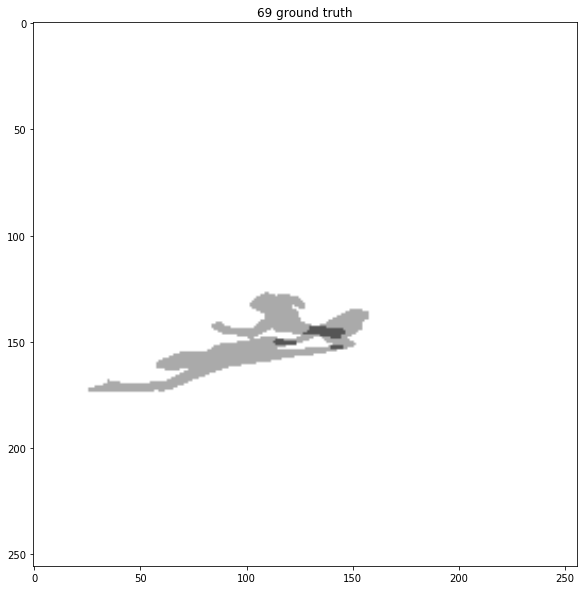

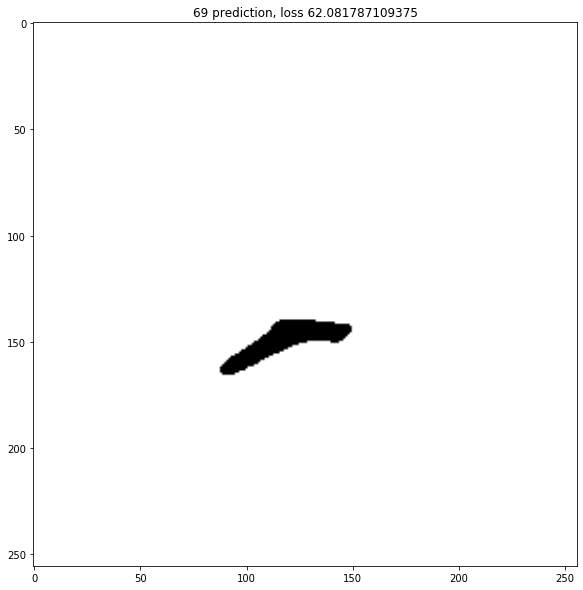

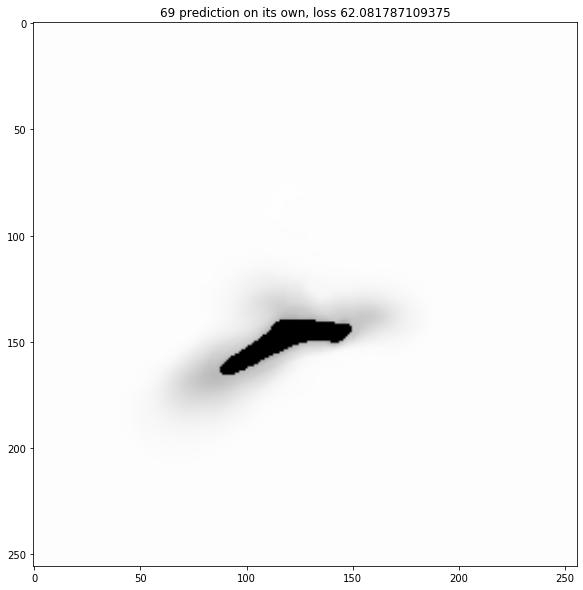

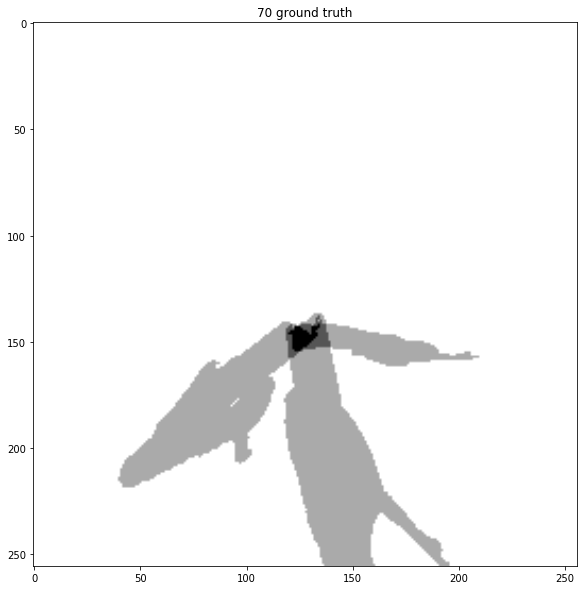

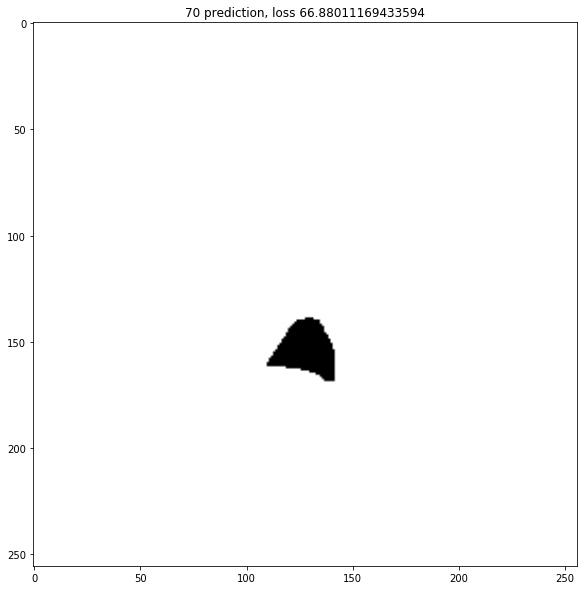

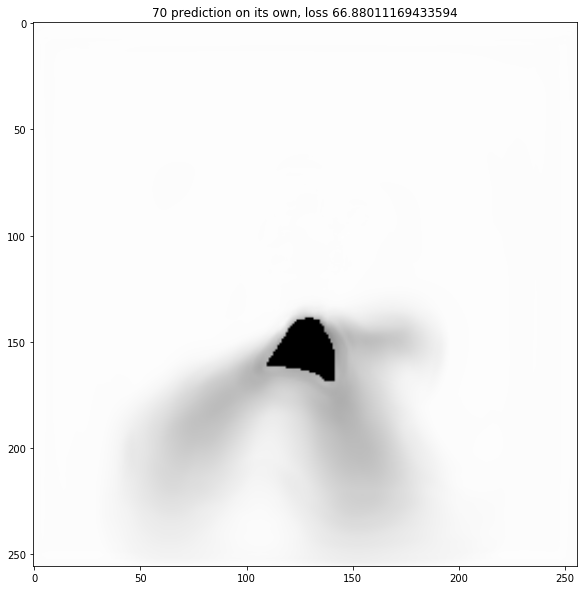

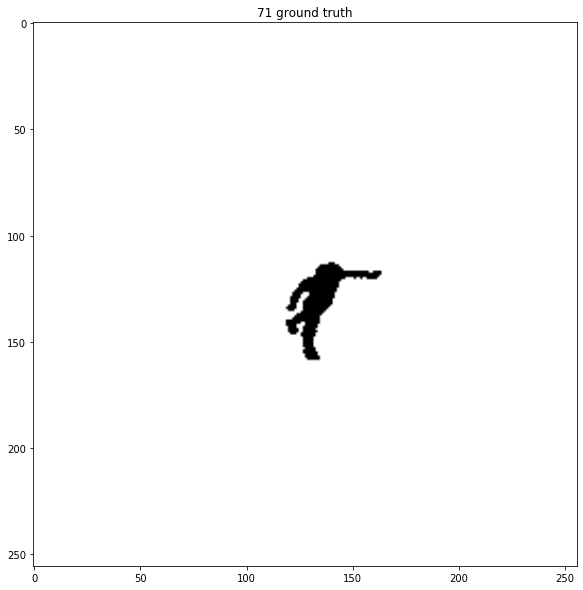

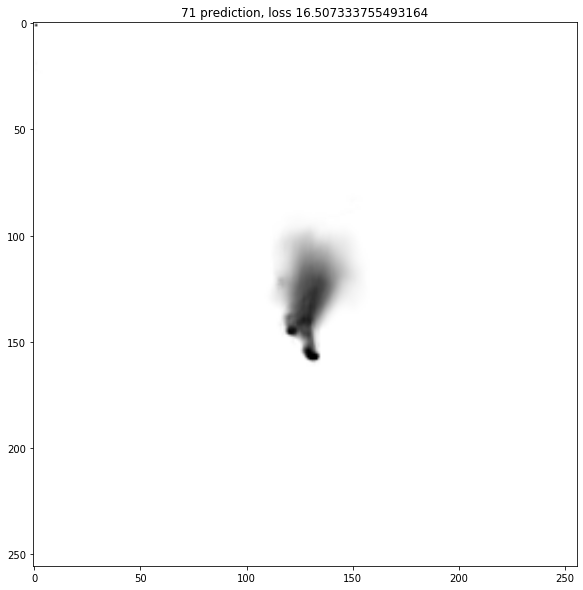

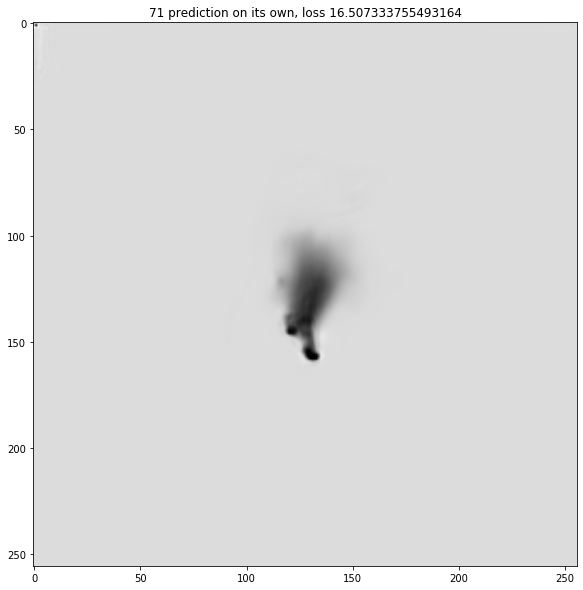

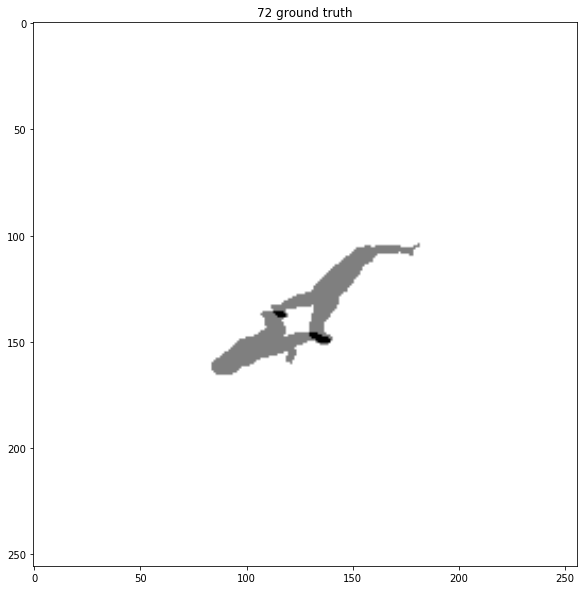

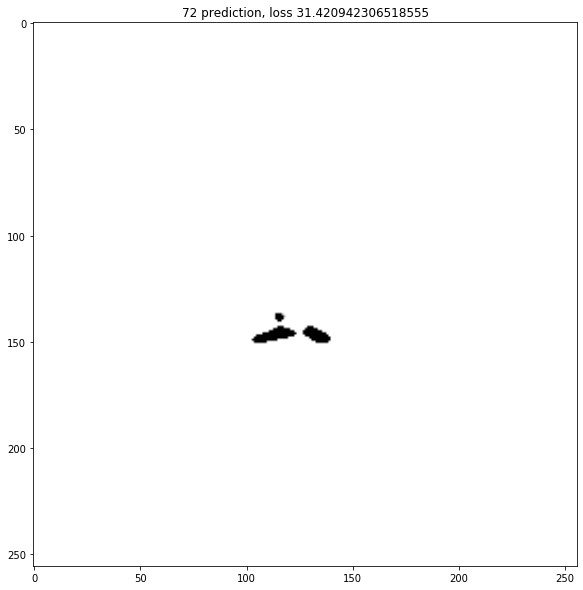

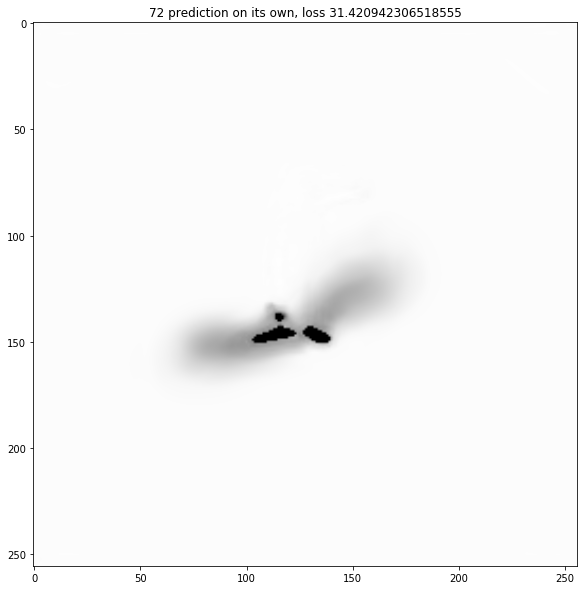

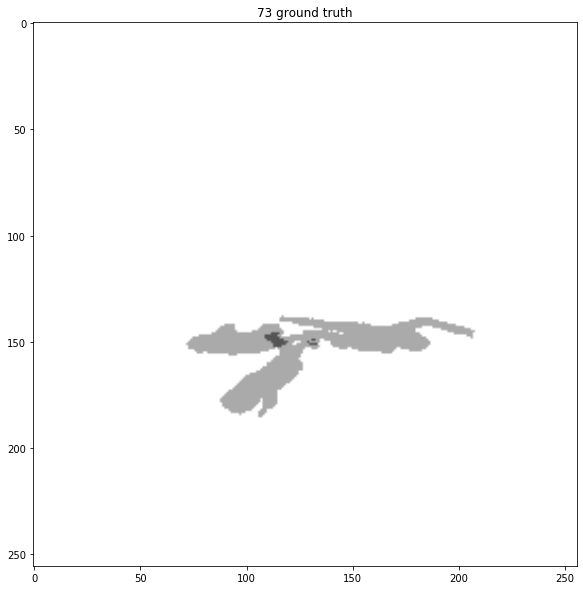

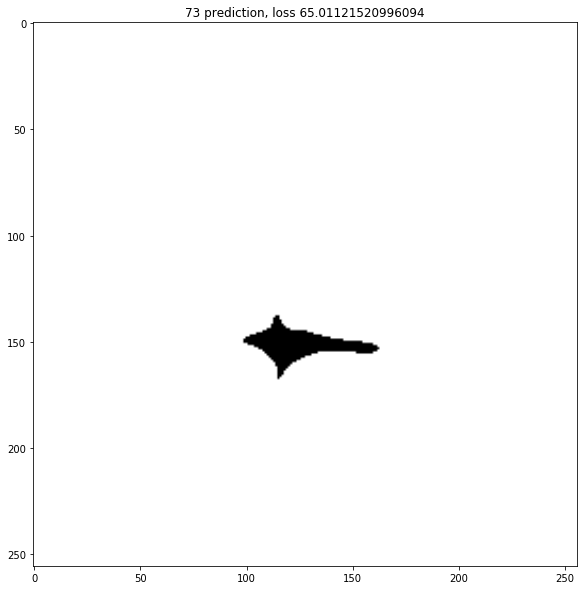

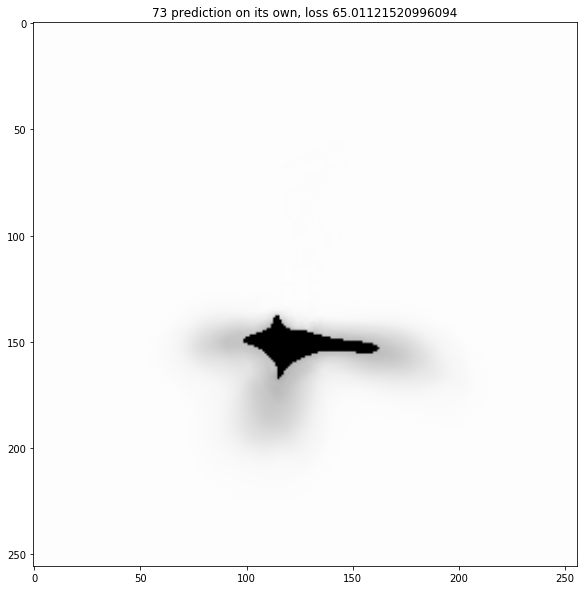

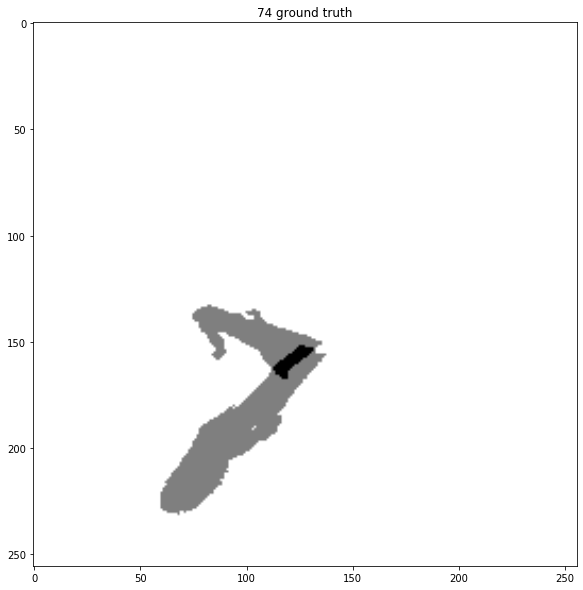

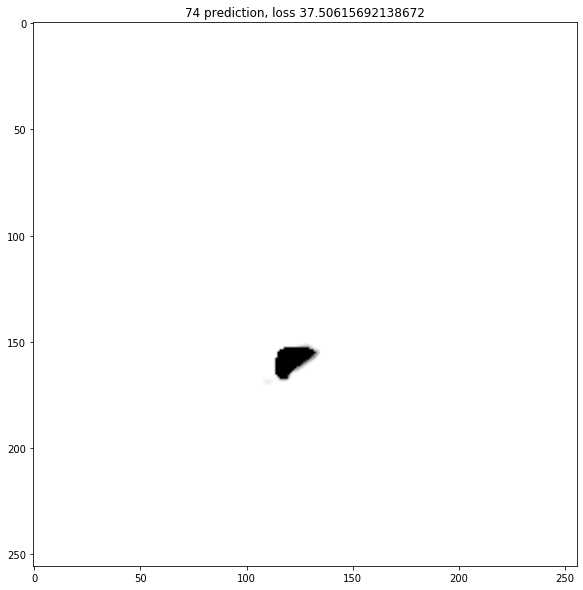

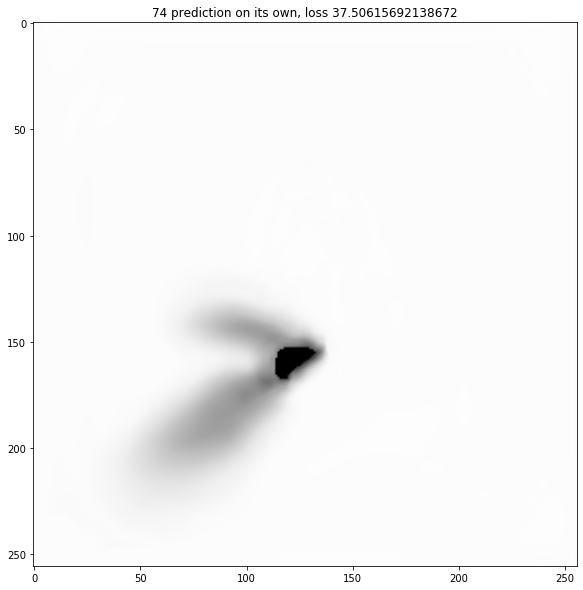

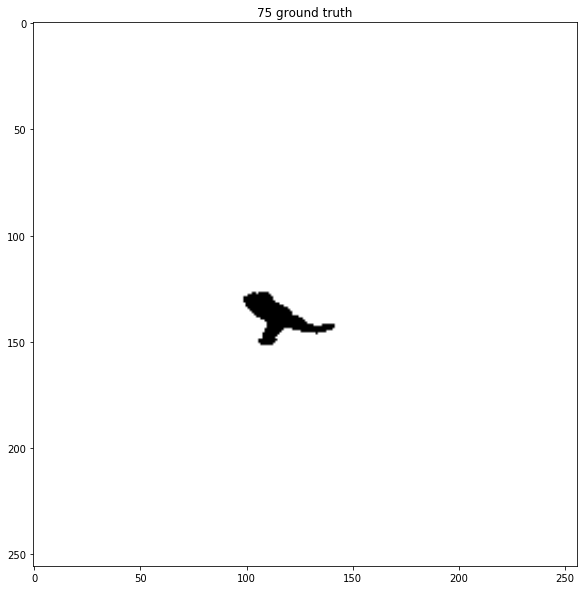

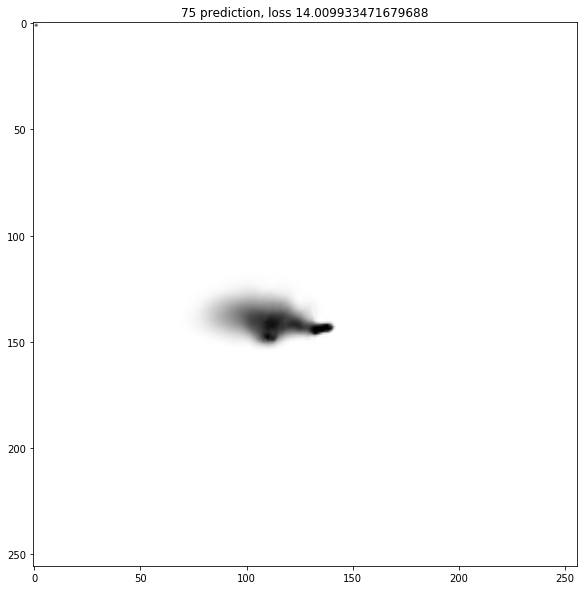

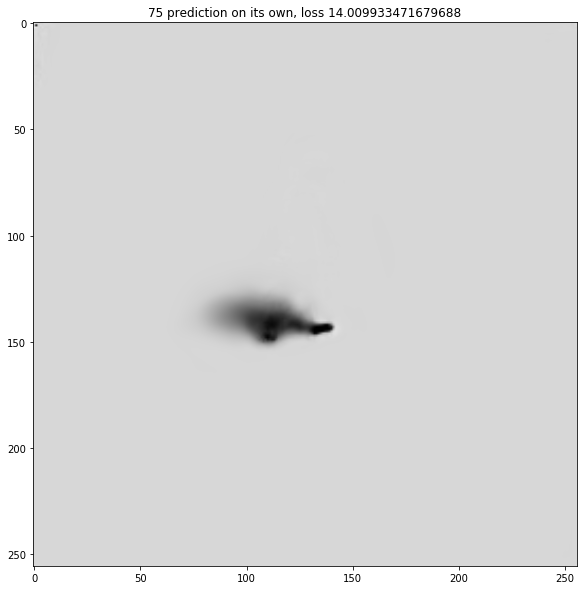

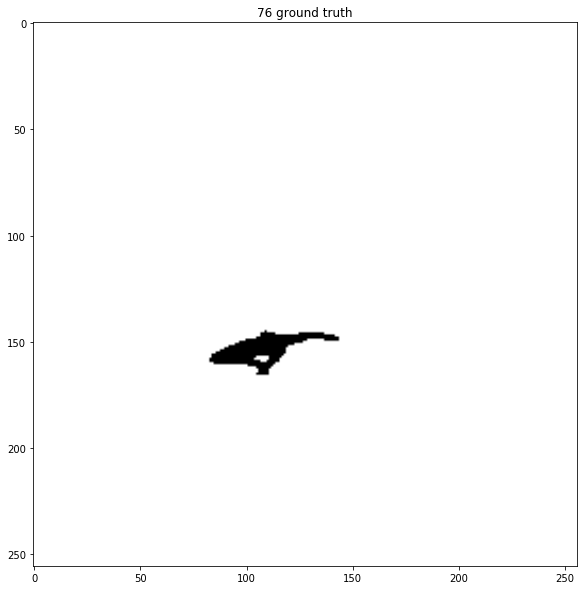

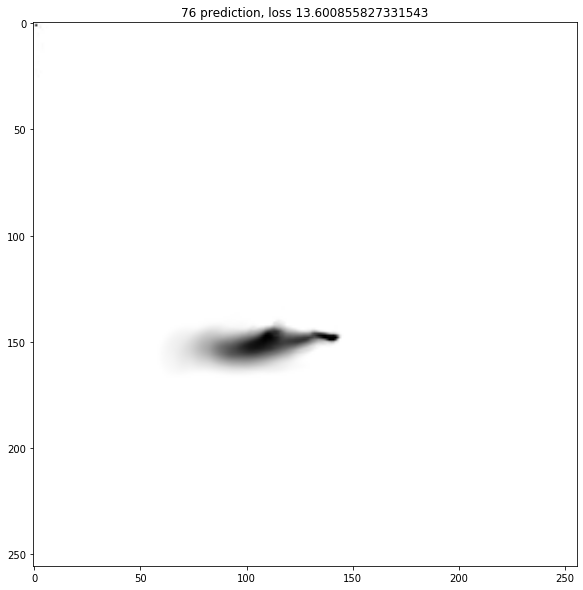

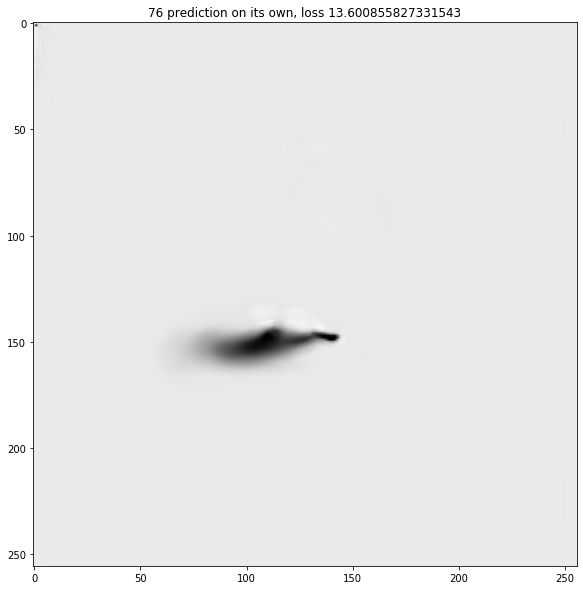

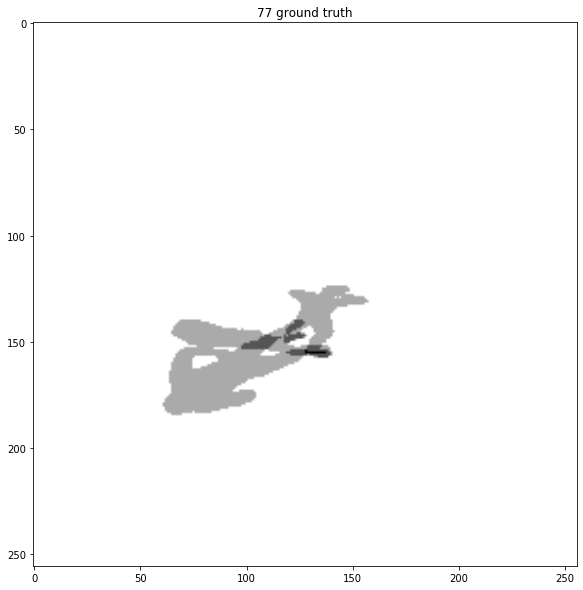

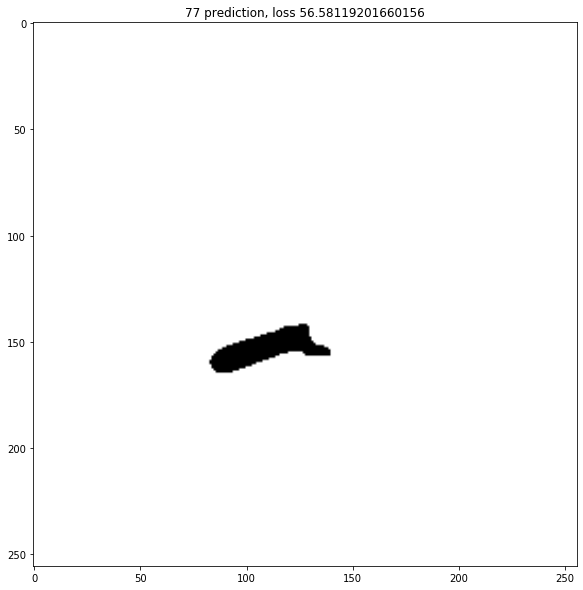

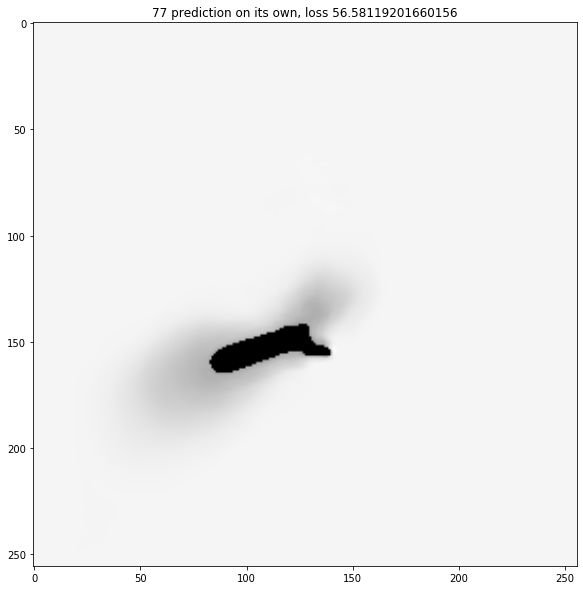

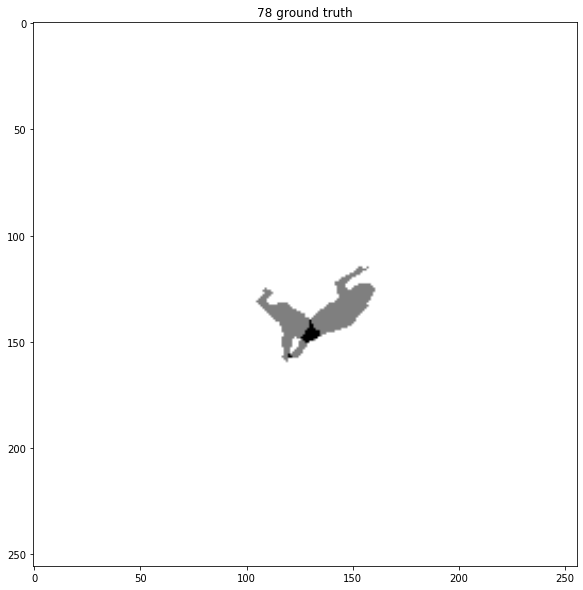

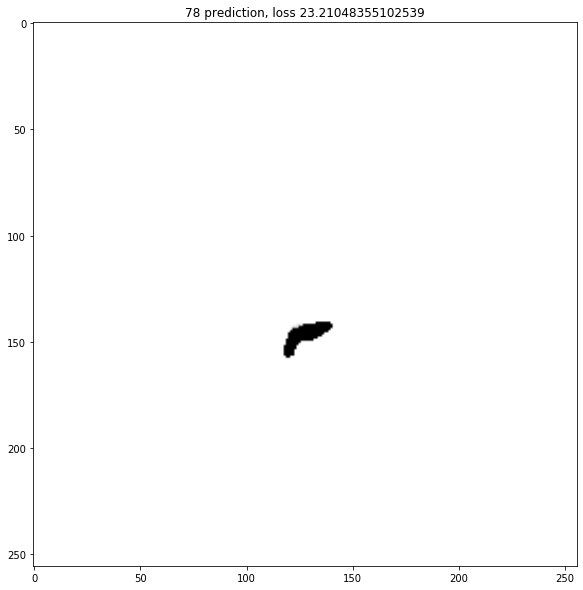

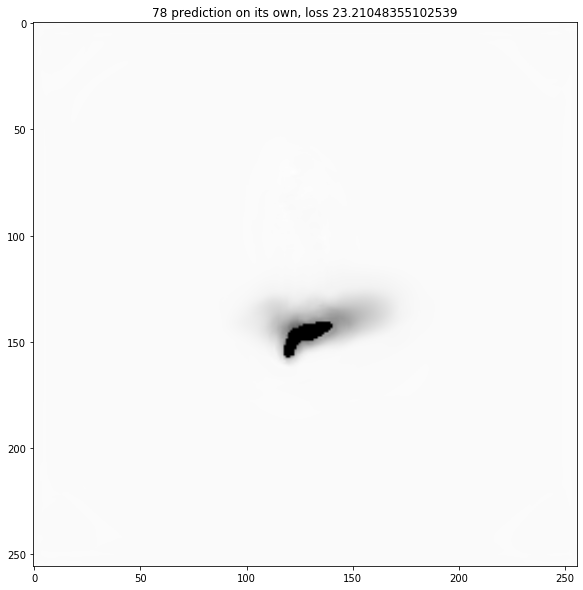

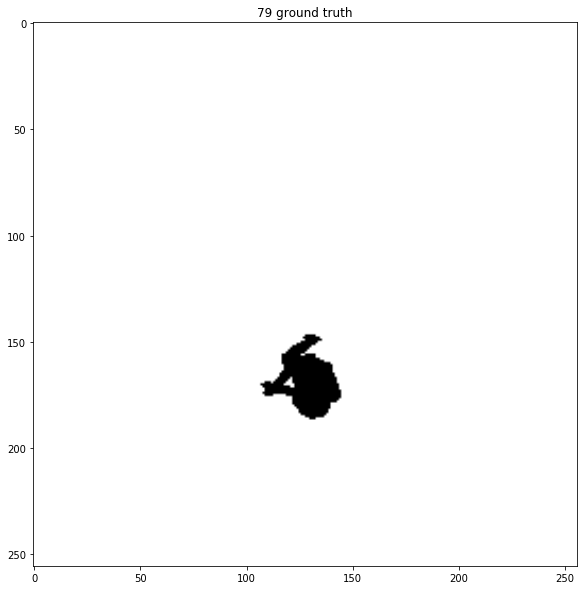

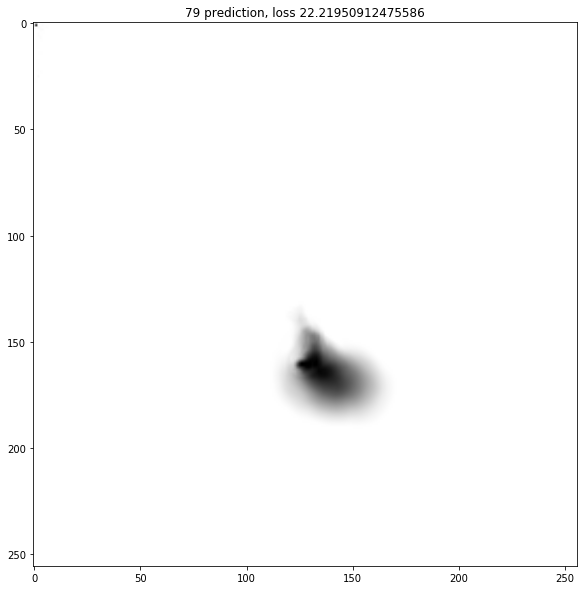

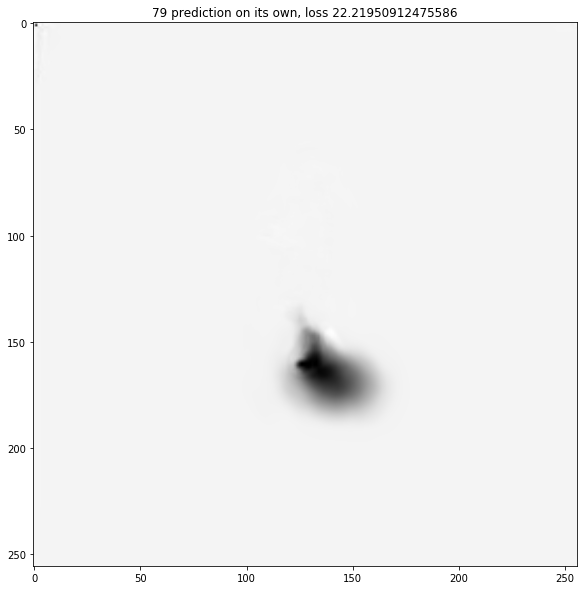

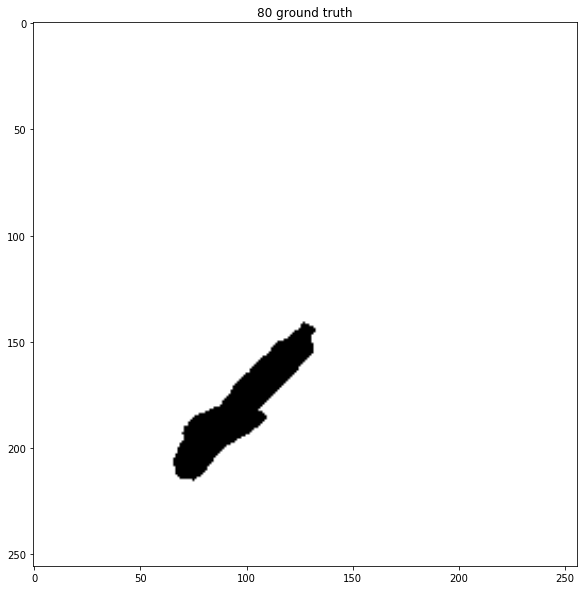

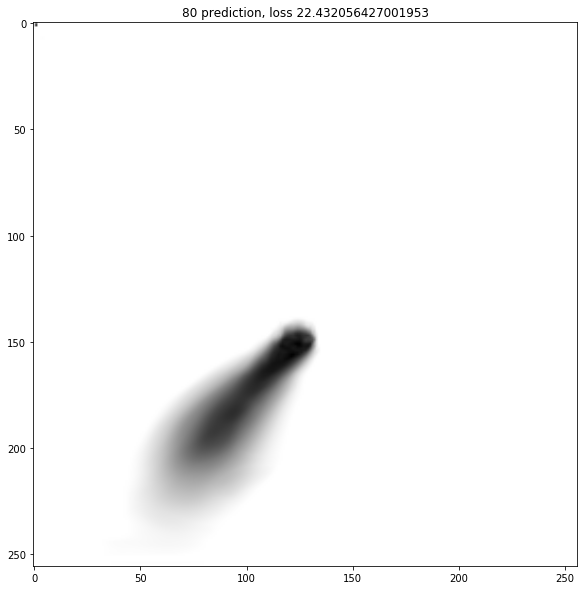

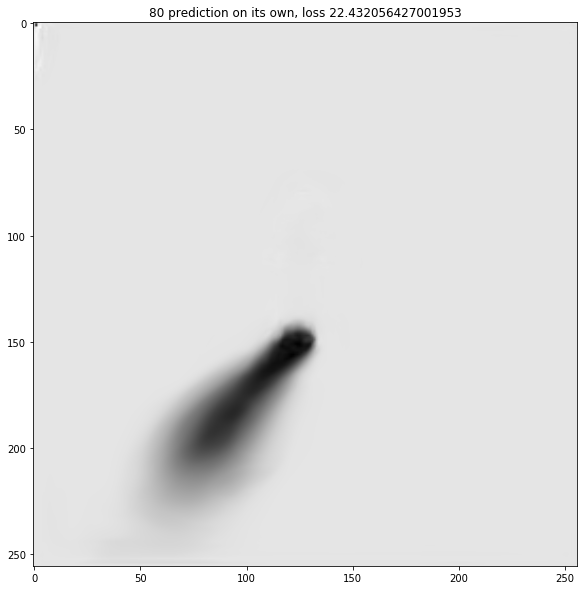

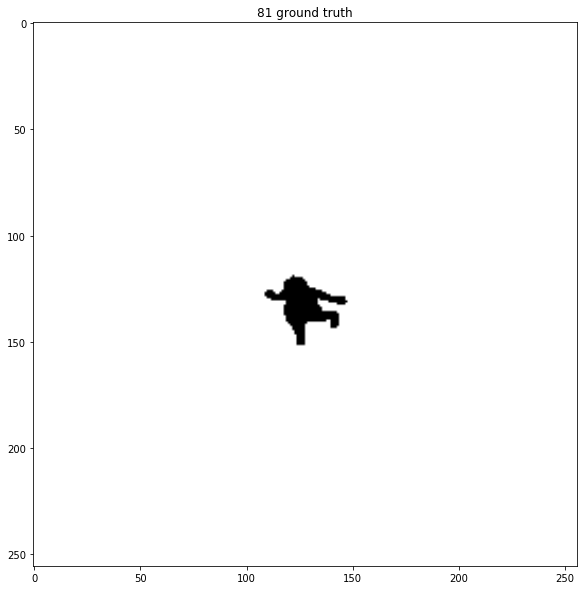

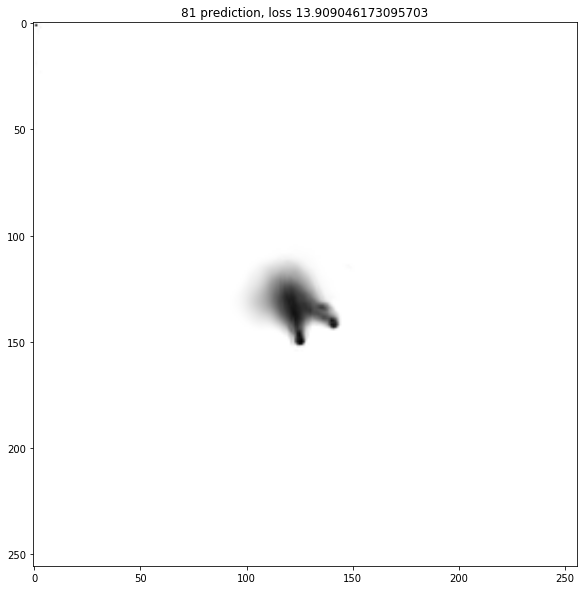

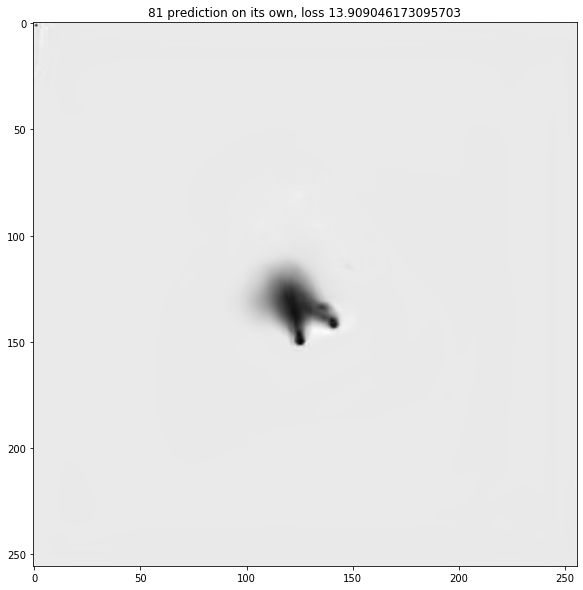

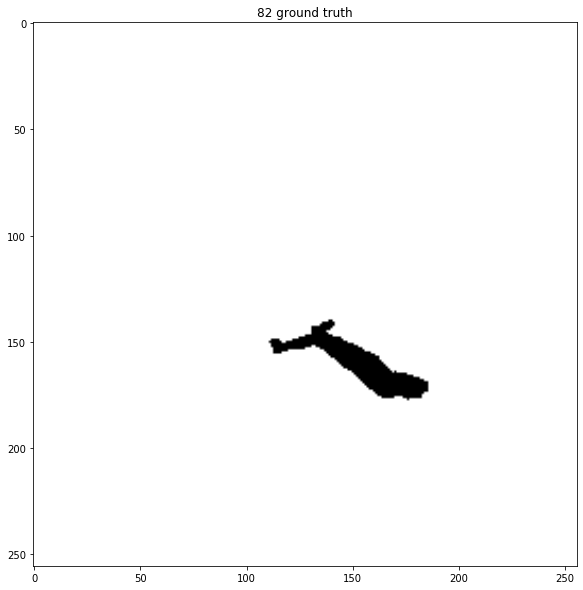

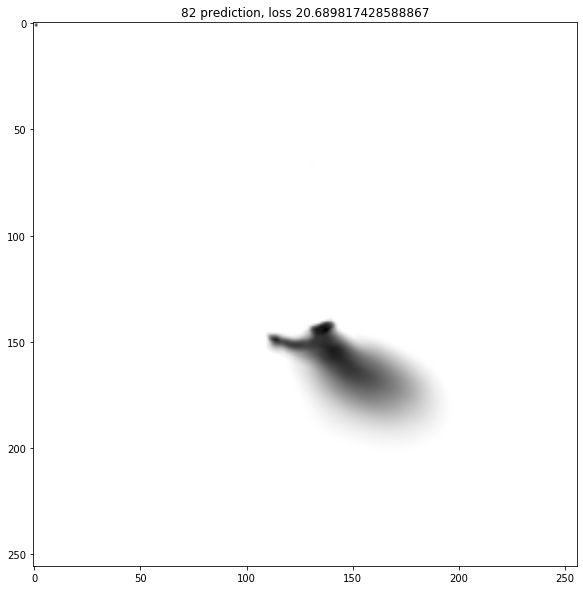

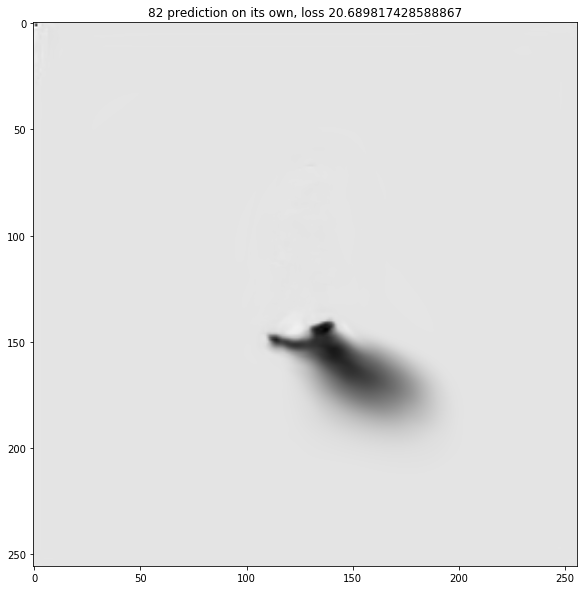

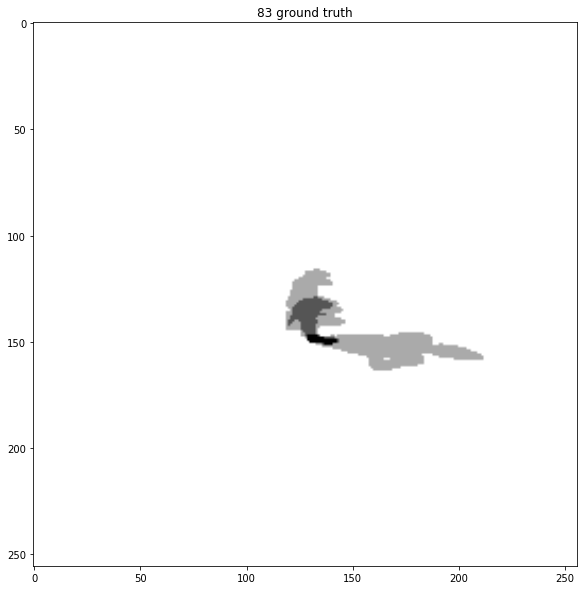

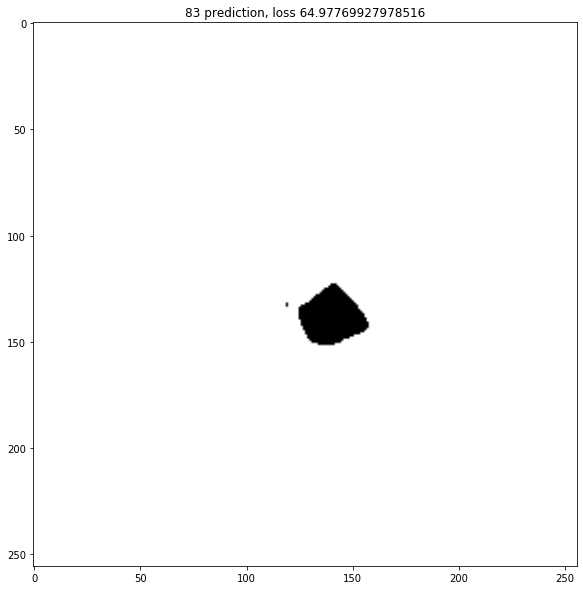

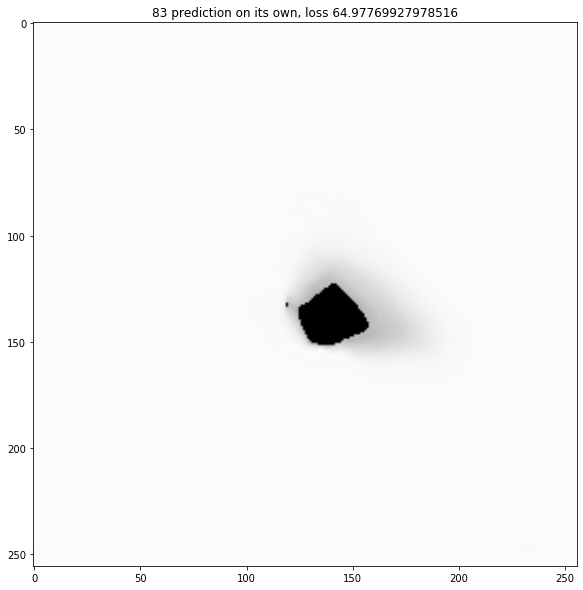

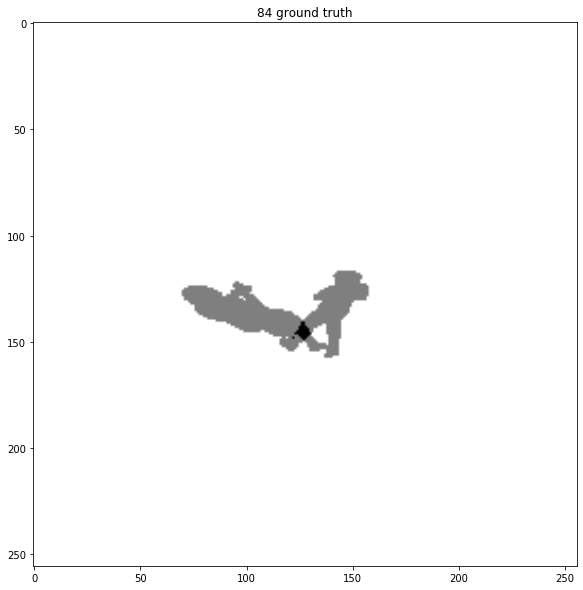

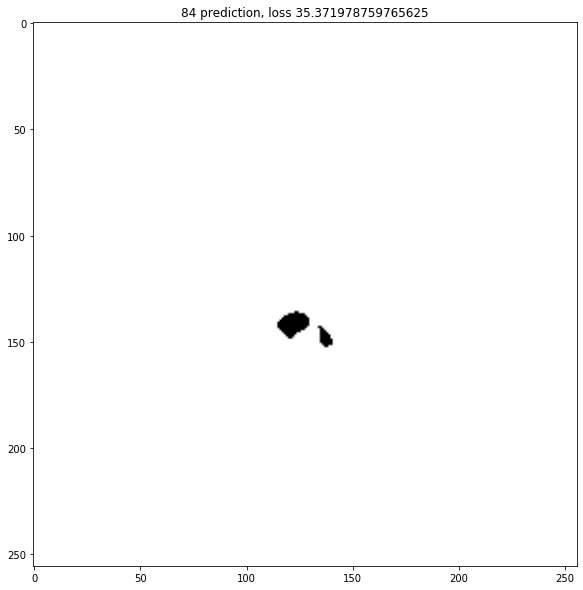

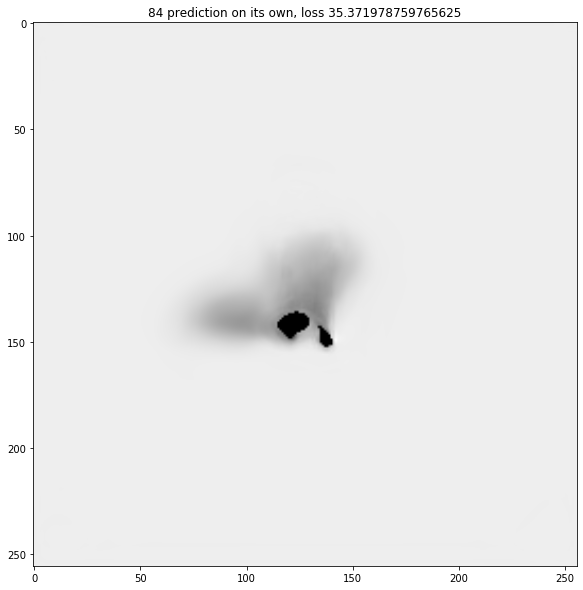

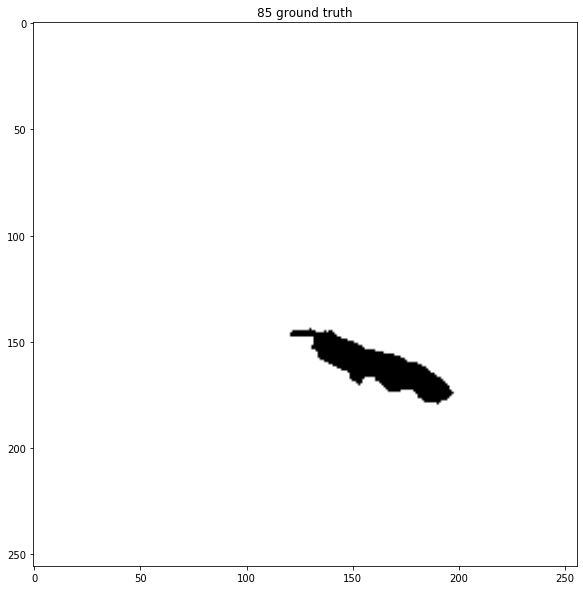

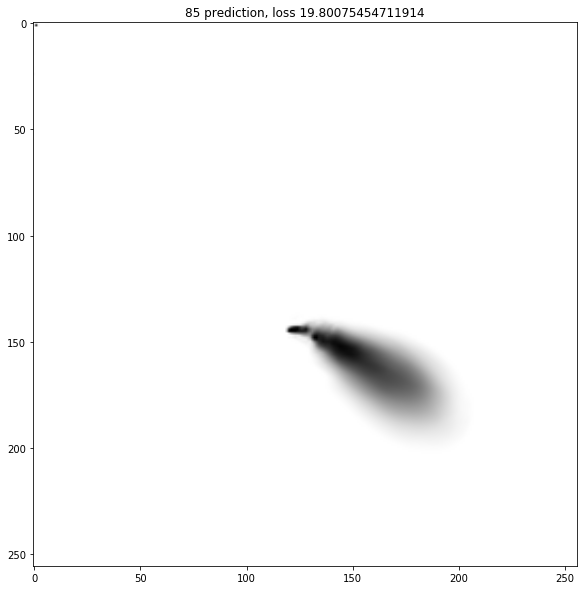

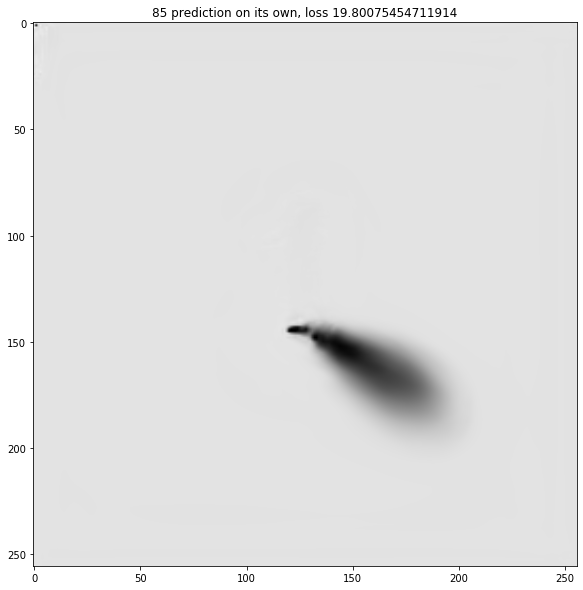

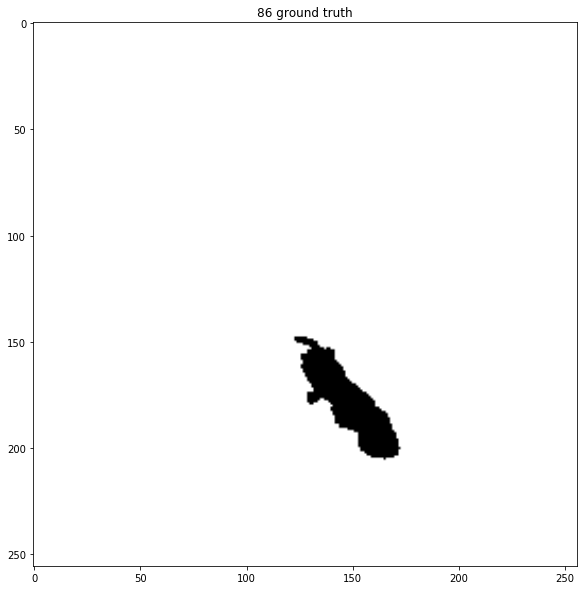

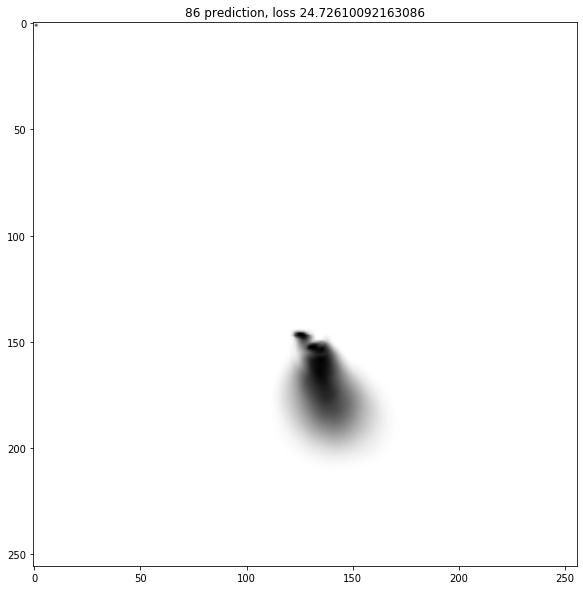

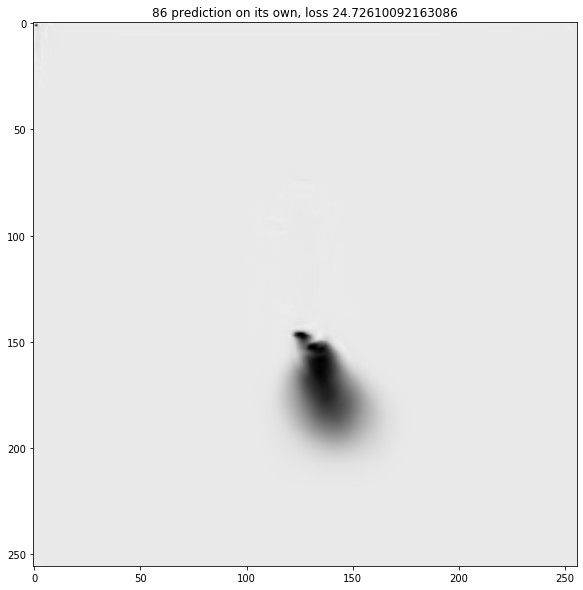

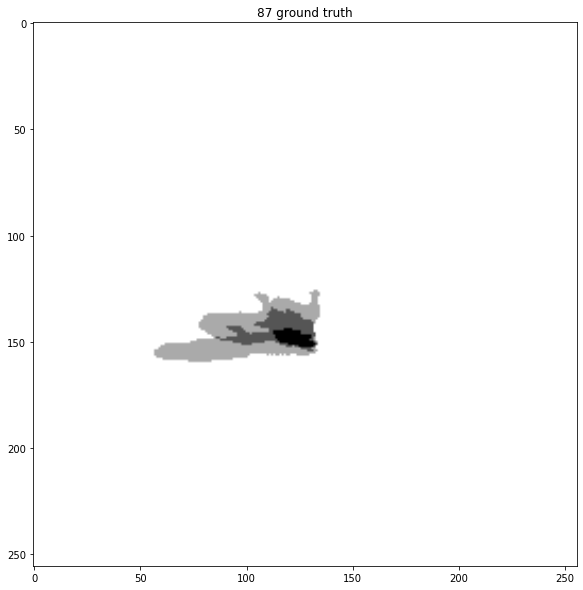

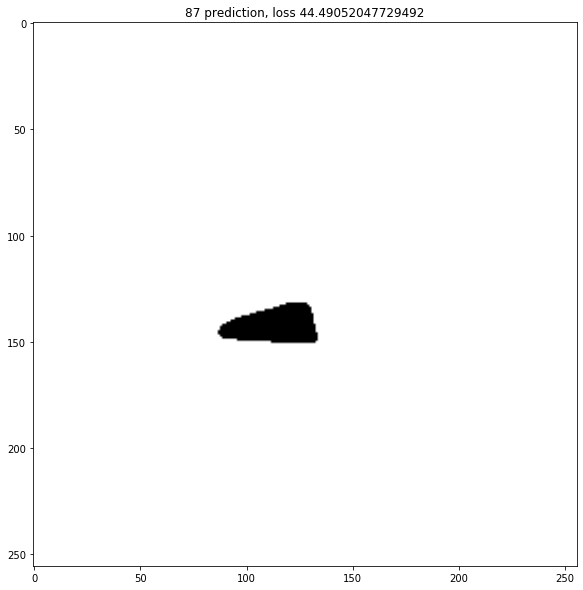

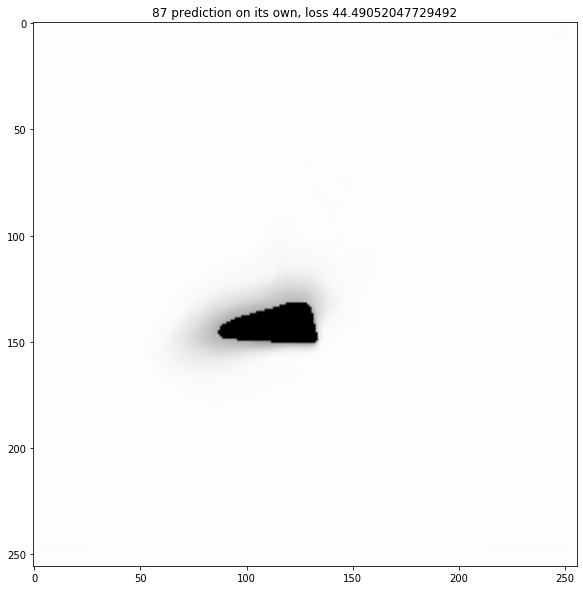

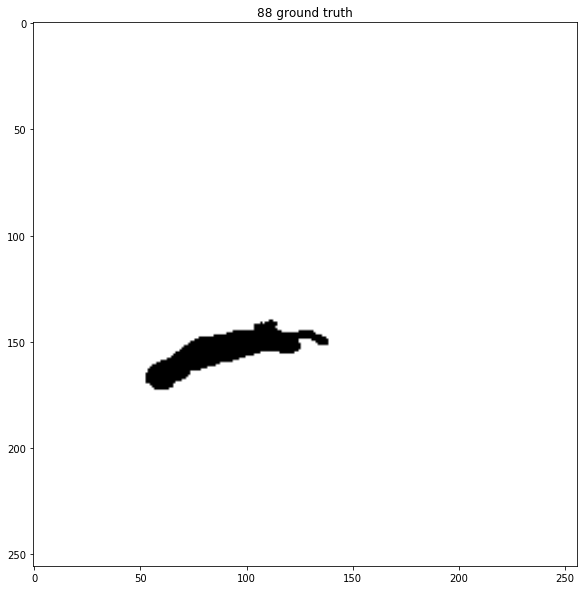

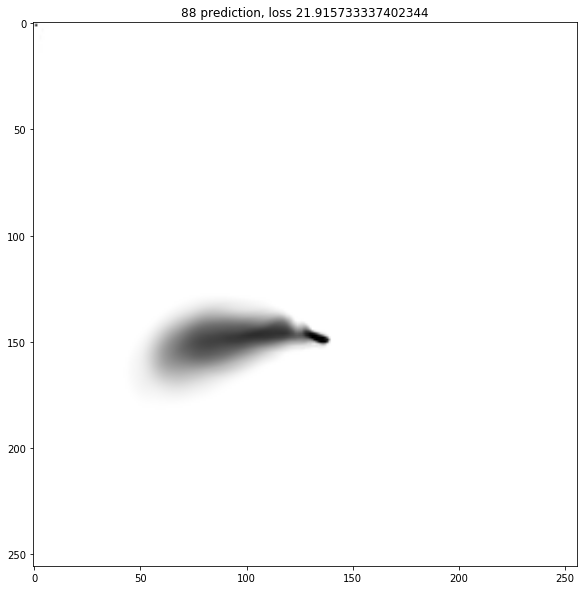

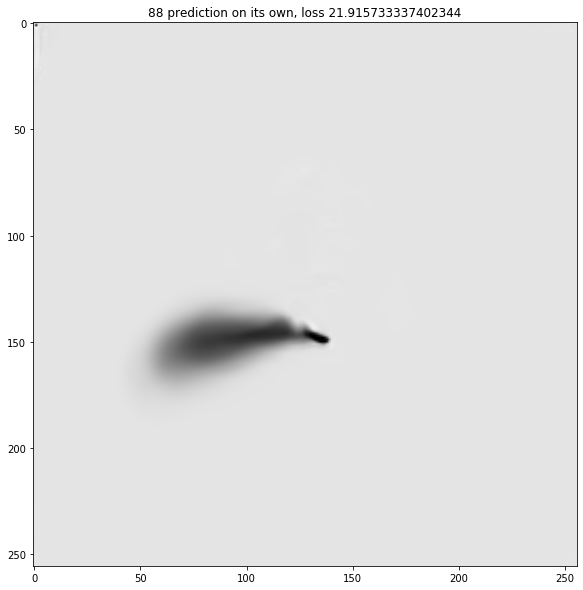

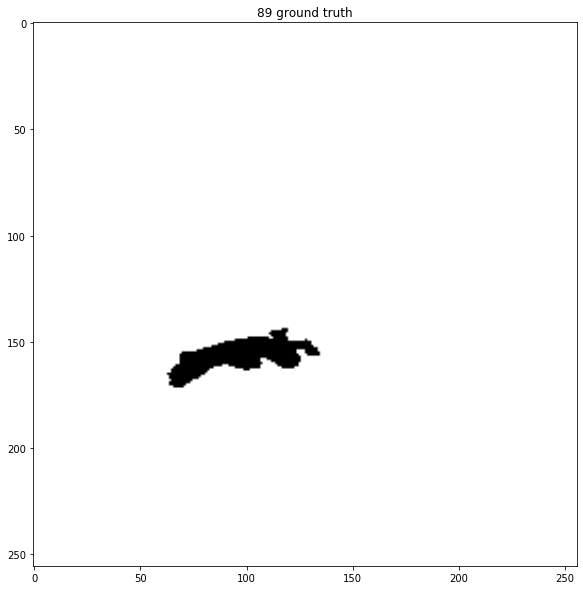

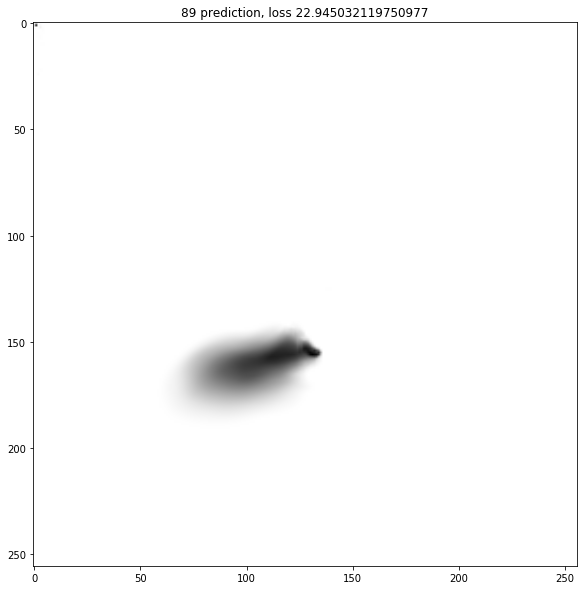

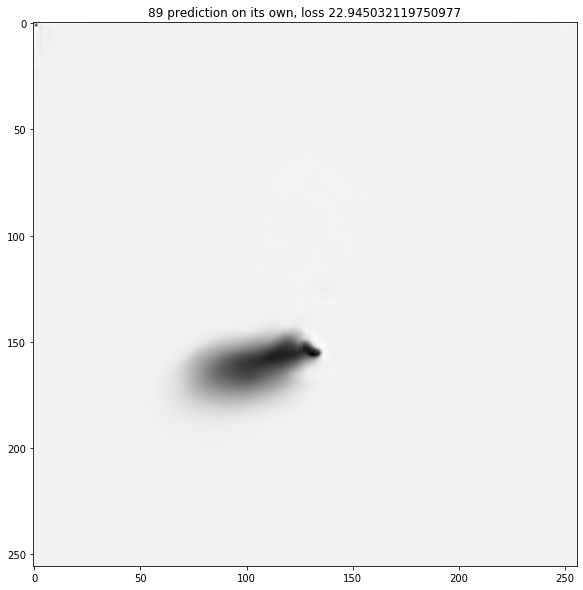

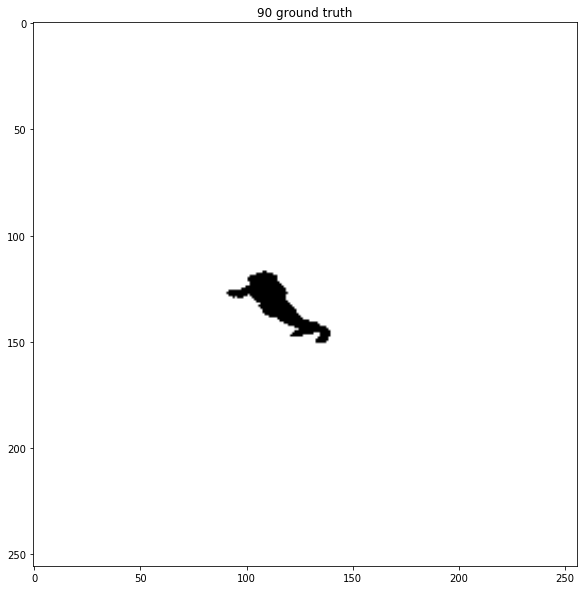

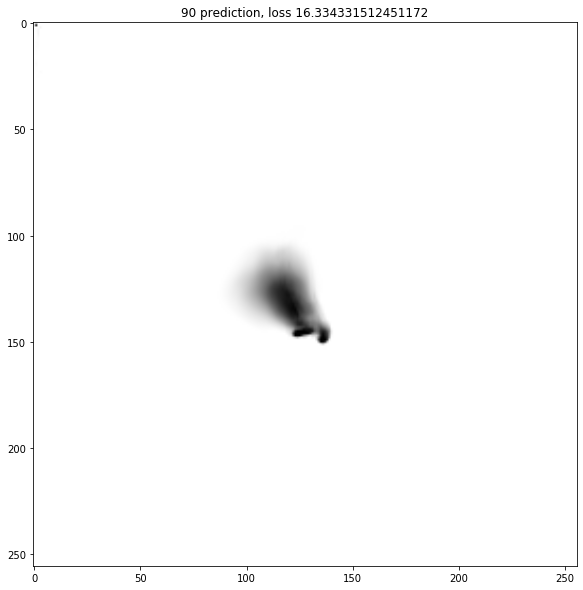

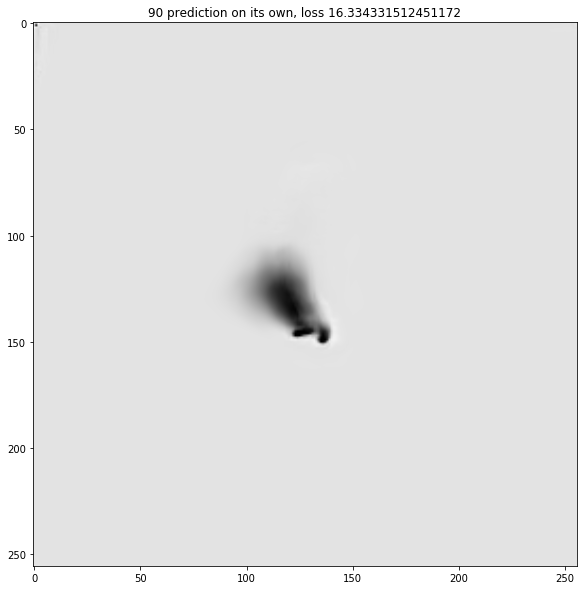

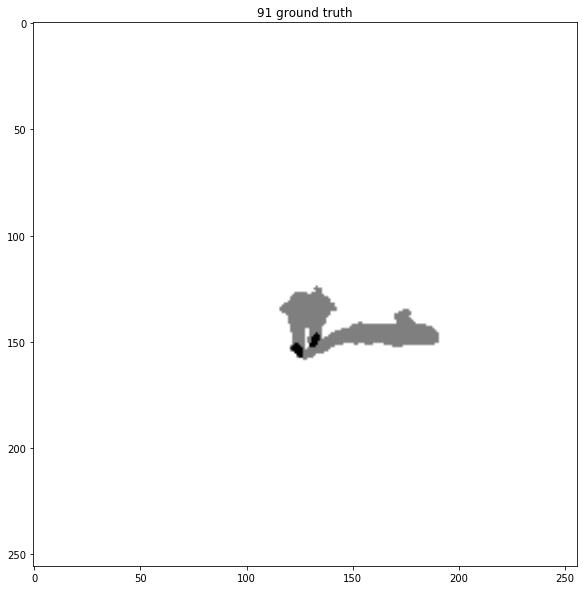

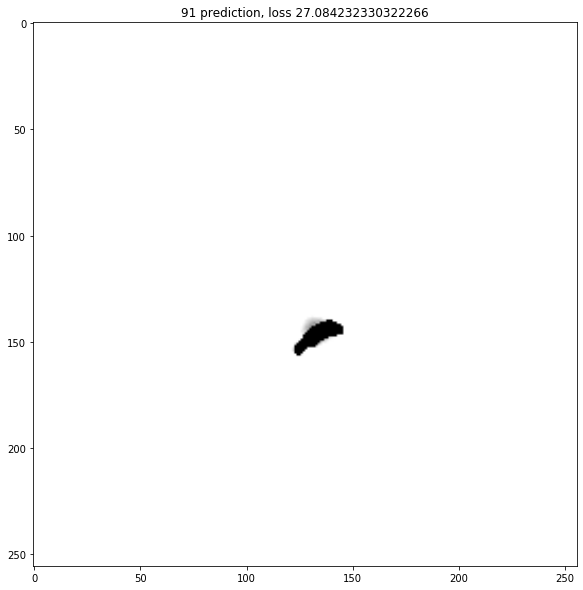

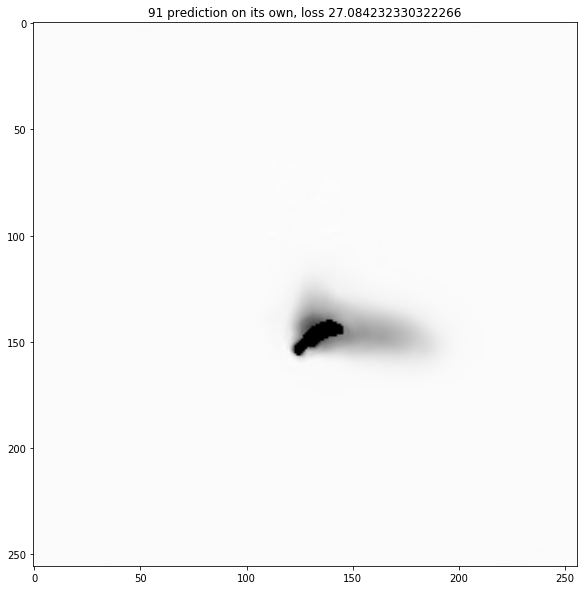

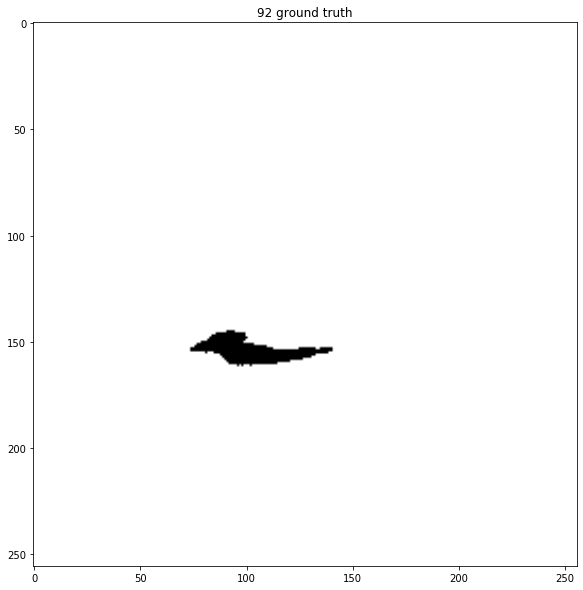

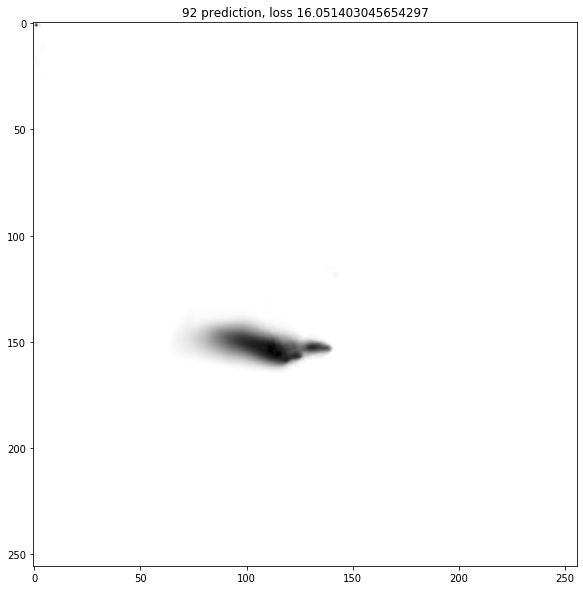

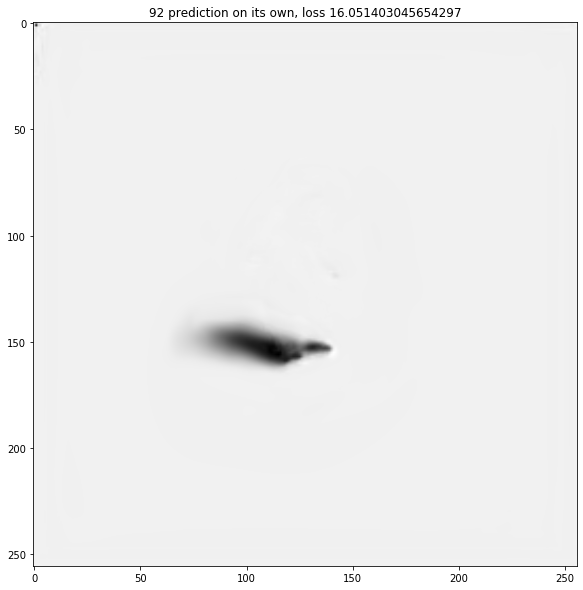

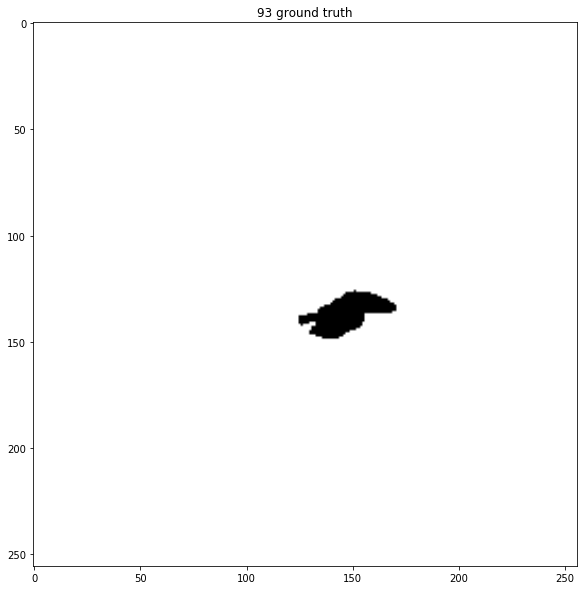

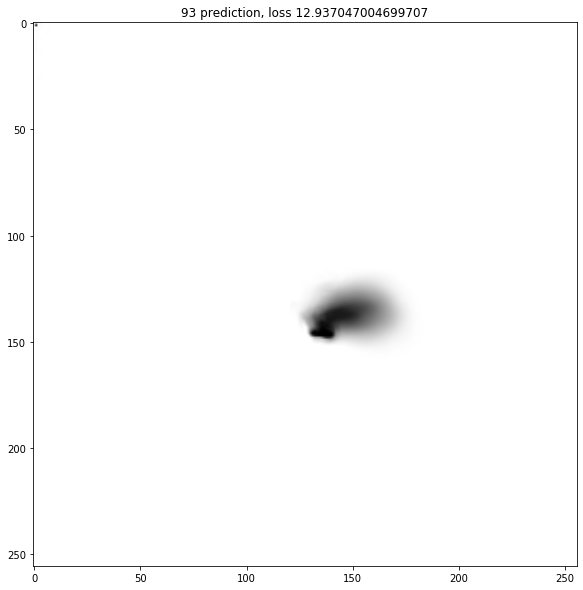

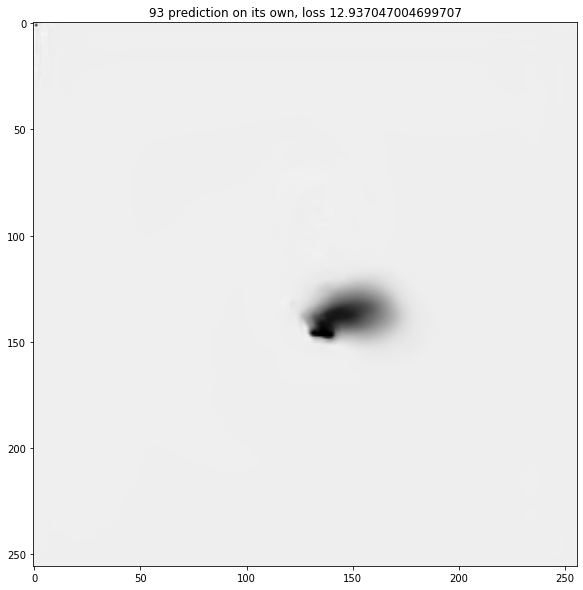

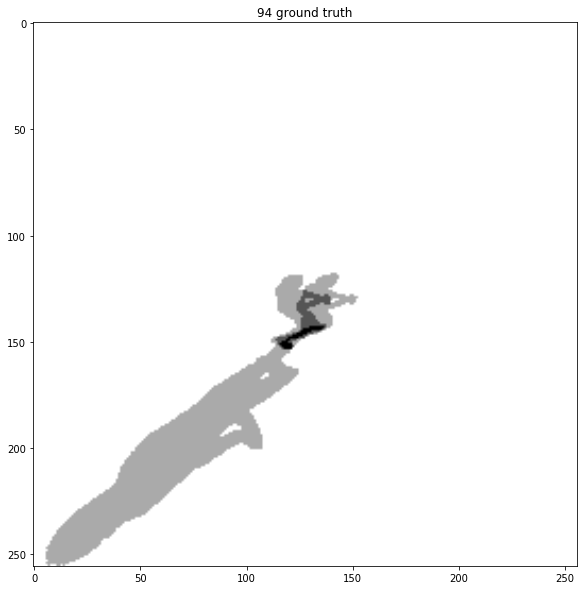

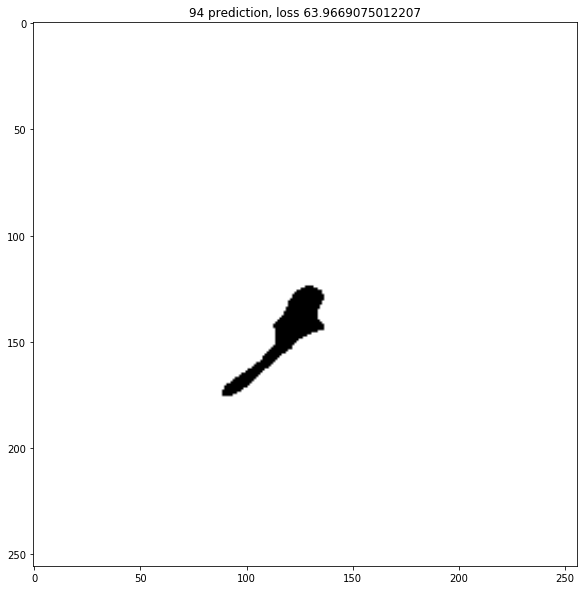

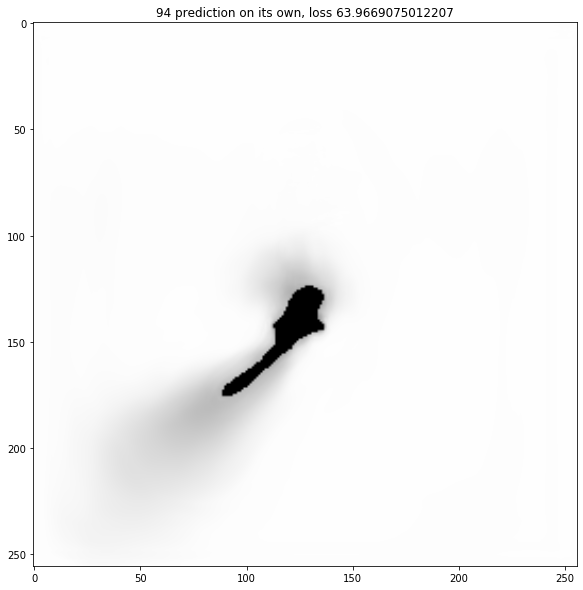

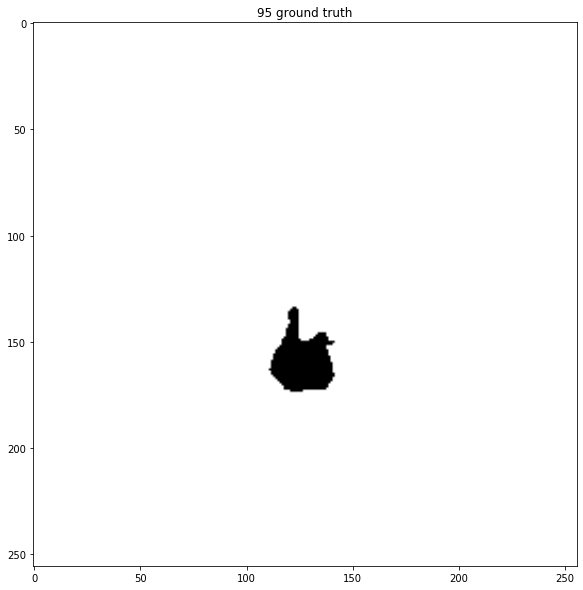

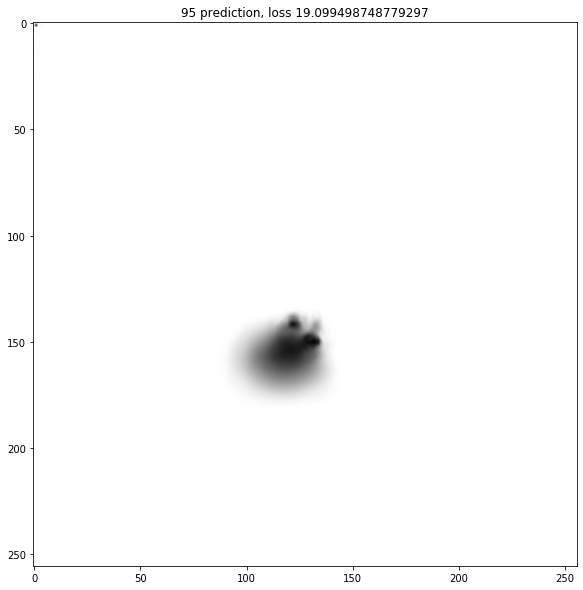

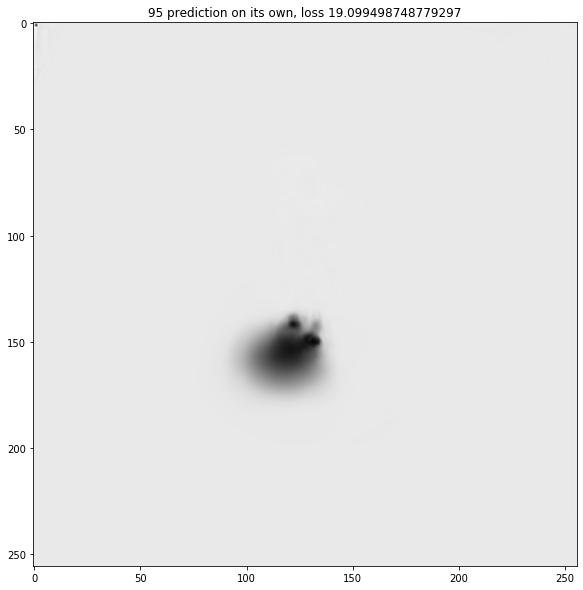

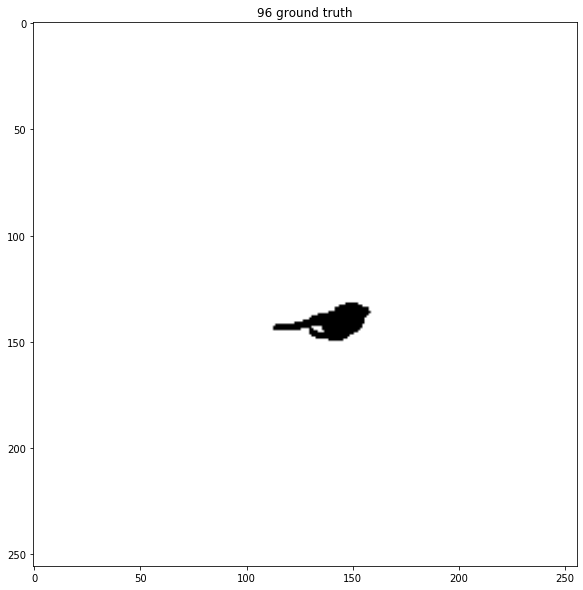

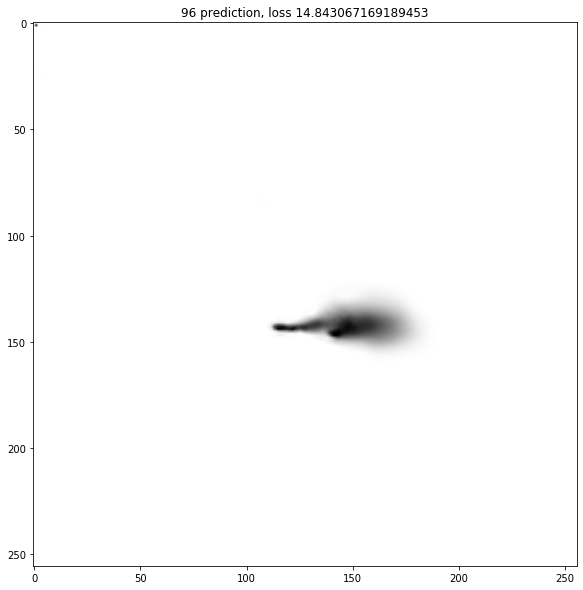

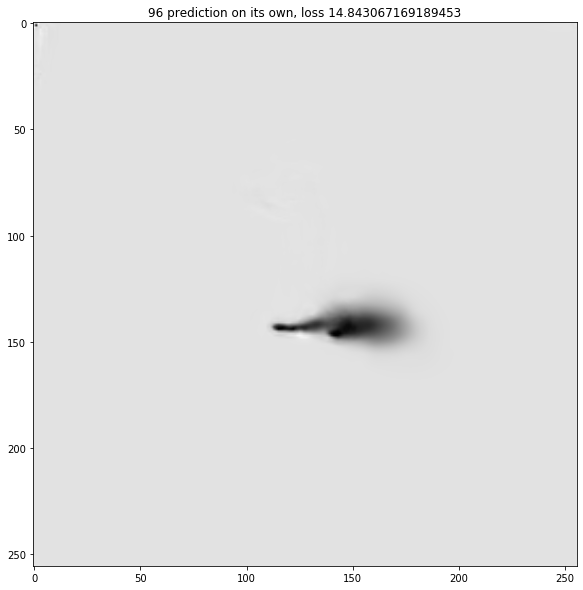

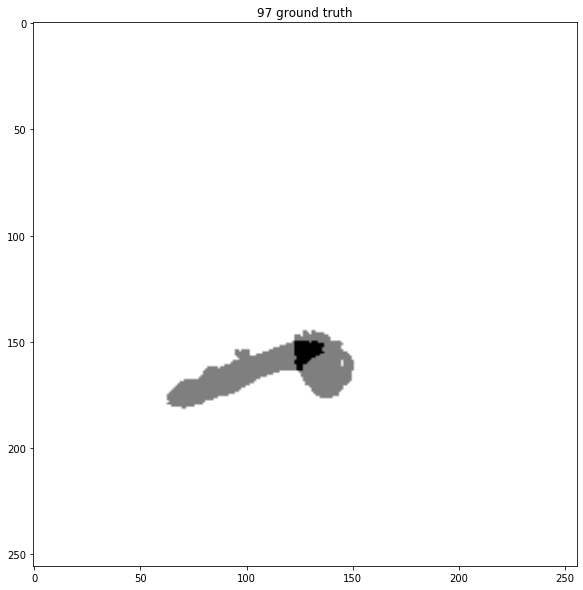

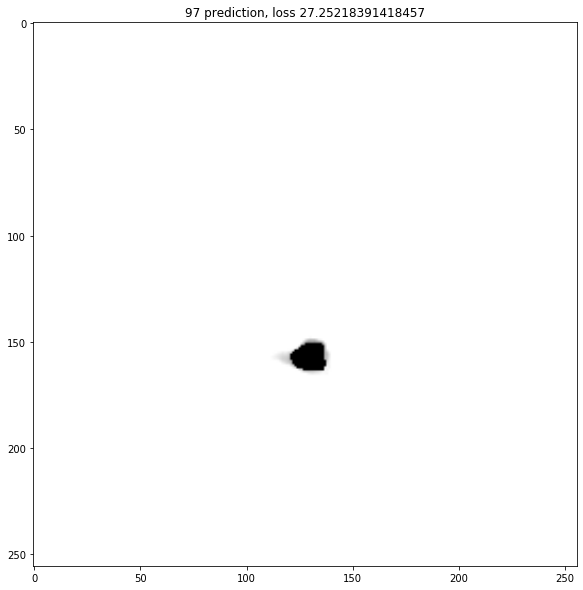

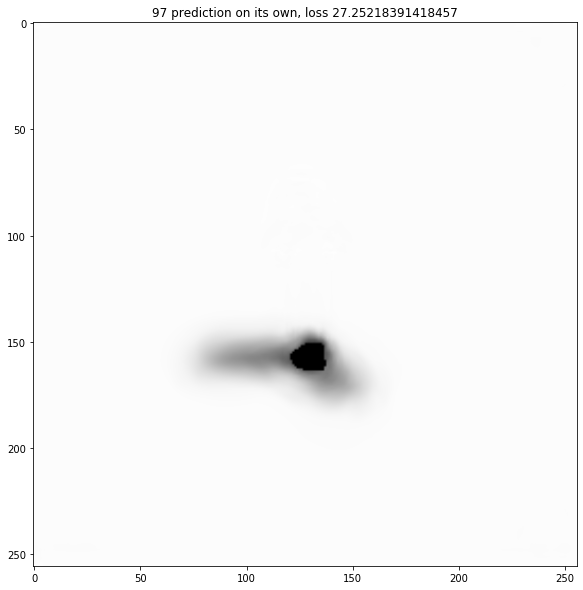

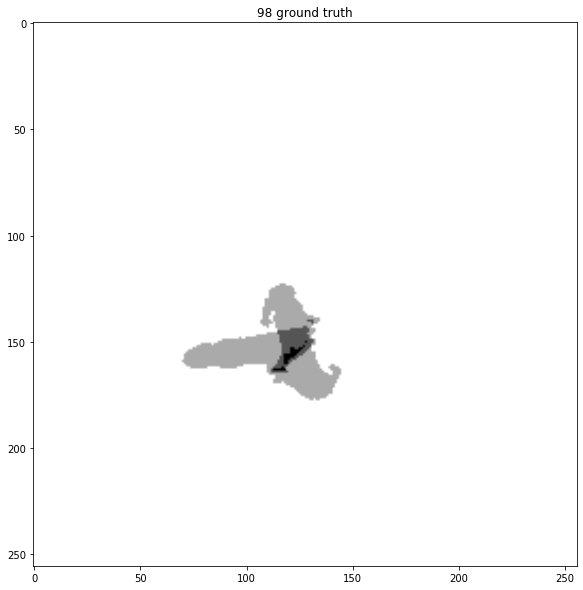

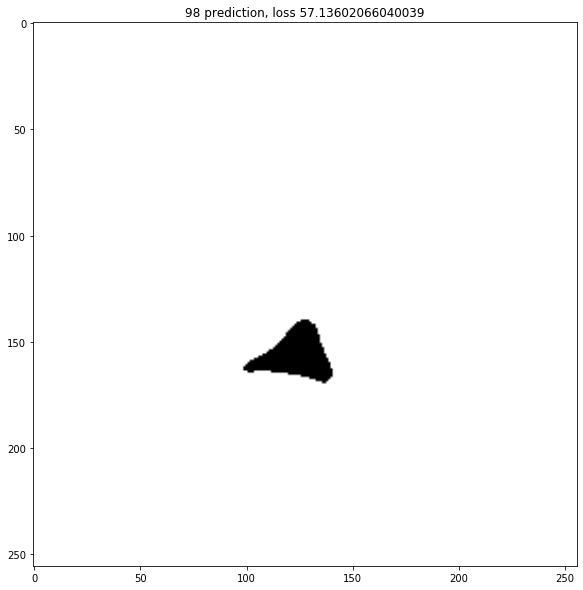

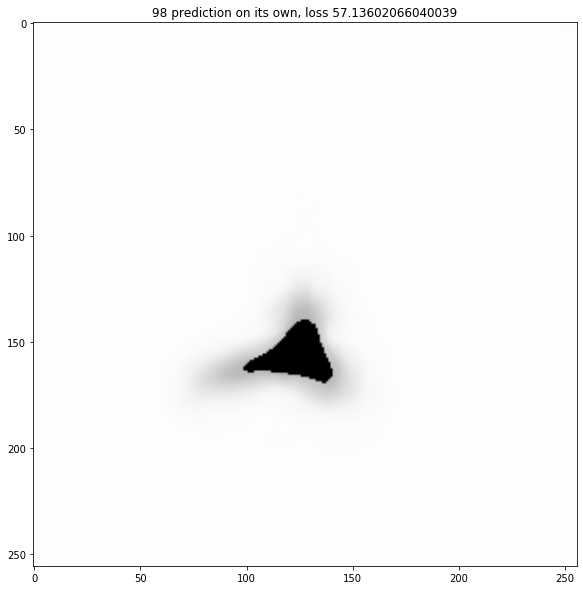

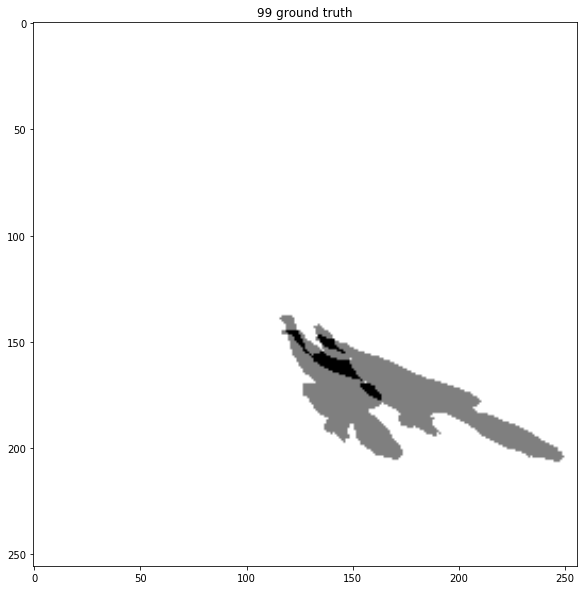

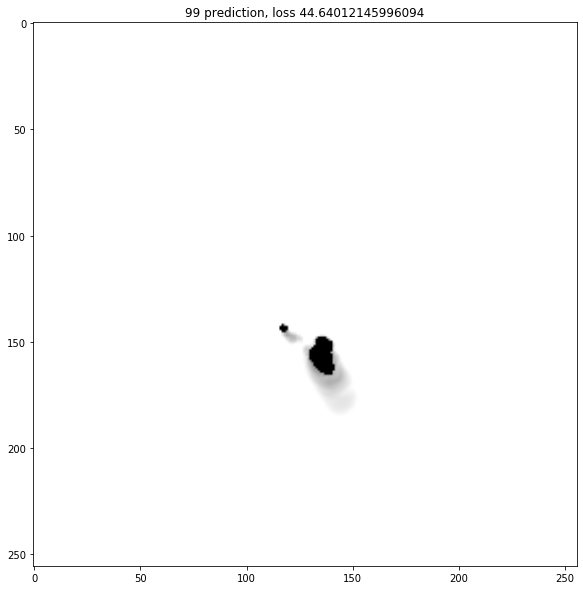

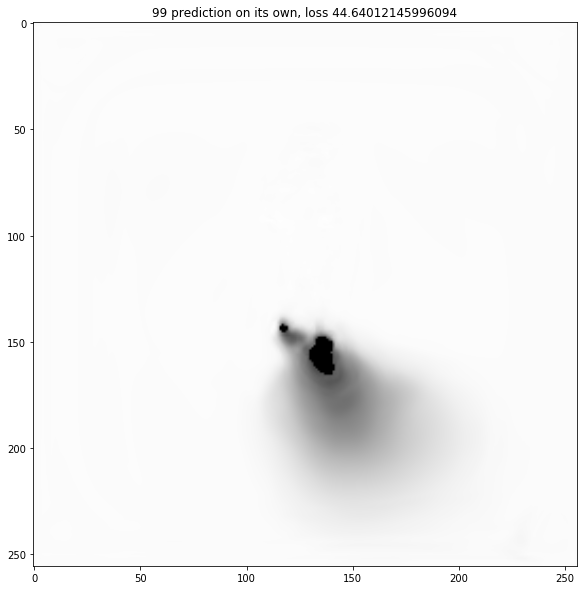

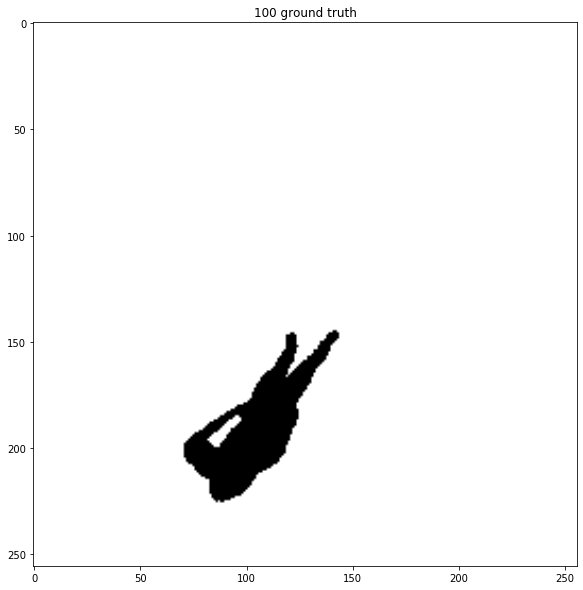

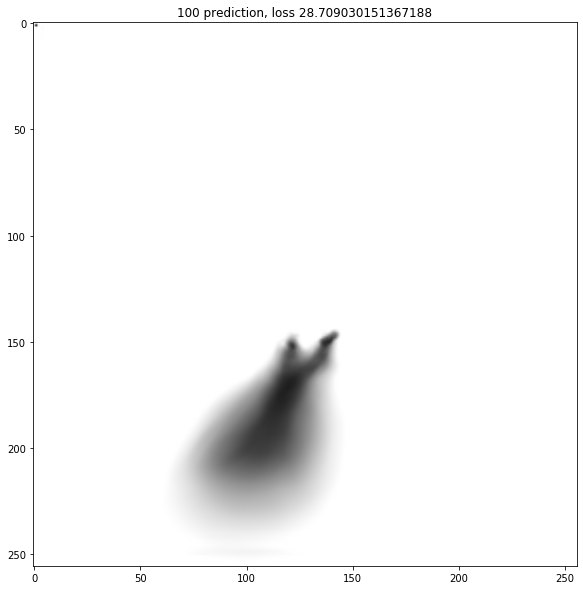

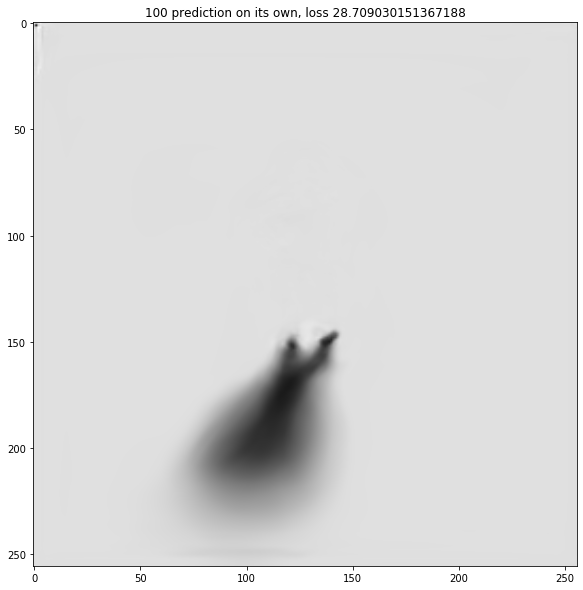

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def show(img, title):
    plt.figure(figsize=(15,10))
    npimg = img.detach().cpu().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='bilinear')
    plt.title(title)
    
def loss_func(gt, pred):
    return torch.norm((gt-predicted_img),2)

def normalize_batch(I_t, batch):
    b,h,w,c = batch.shape
    normalized_batch = batch.clone()
    for i in range(b):
        normalized_batch[i,:,:,:] = batch[i,:,:,:]/torch.max(I_t[i,:,:,:])
    
    return normalized_batch

counter = 0
with torch.no_grad():
    model.eval()
    for i, (mask, light, shadow) in enumerate(train_dataloder):            
        I_s, L_t, I_t = mask.to(device), light.to(device), shadow.to(device)
        predicted_img, predicted_src_light = model(I_s, L_t)
        
        # show(make_grid(predicted_src_light))
        
        b,h,w,c = I_s.shape
        total_loss = loss_func(I_t, predicted_img)
        avg_loss = total_loss / b
        print('range of prediction, min: {}, max {}'.format(torch.min(predicted_img), torch.max(predicted_img)))
        print('batch size: {}, total loss: {}, batch loss: {}'.format(b, total_loss, avg_loss))
        
        print('Image target: range: {}, {}'.format(torch.min(I_t), torch.max(I_t)))        
        I_t = normalize_batch(I_t, I_t)
        predict_img_It = normalize_batch(I_t, predicted_img)
        pred_img_ori = normalize_batch(predicted_img,predicted_img)
        
        show(make_grid(I_t),"{} ground truth".format(i))
        show(make_grid(predicted_img),"{} prediction, loss {}".format(i, avg_loss))
        show(make_grid(pred_img_ori),"{} prediction on its own, loss {}".format(i,avg_loss))
        
        counter += 1
        if counter > 100:
            break

In [ ]:
print(torch.min(shadow))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

""" Load Weight """
checkpoint_file = 'weights/l1 loss_10-February-09-43-AM.pt'
checkpoint = torch.load(checkpoint_file)
hist_train_loss = checkpoint['hist_train_loss']

In [ ]:
plt.plot(hist_train_loss)